2025-08-06 20:19:31.391 | INFO     | tf_chpvk_pv.dataset:create_dataset:41 - Processing dataset...
2025-08-06 20:19:32.179 | SUCCESS  | tf_chpvk_pv.dataset:create_dataset:213 - Processing dataset complete.
2025-08-06 20:19:32.182 | INFO     | tf_chpvk_pv.dataset:train_test_split_:227 - Creating train and test dataset...
2025-08-06 20:19:32.234 | SUCCESS  | tf_chpvk_pv.dataset:train_test_split_:261 - Creating train and test dataset complete.


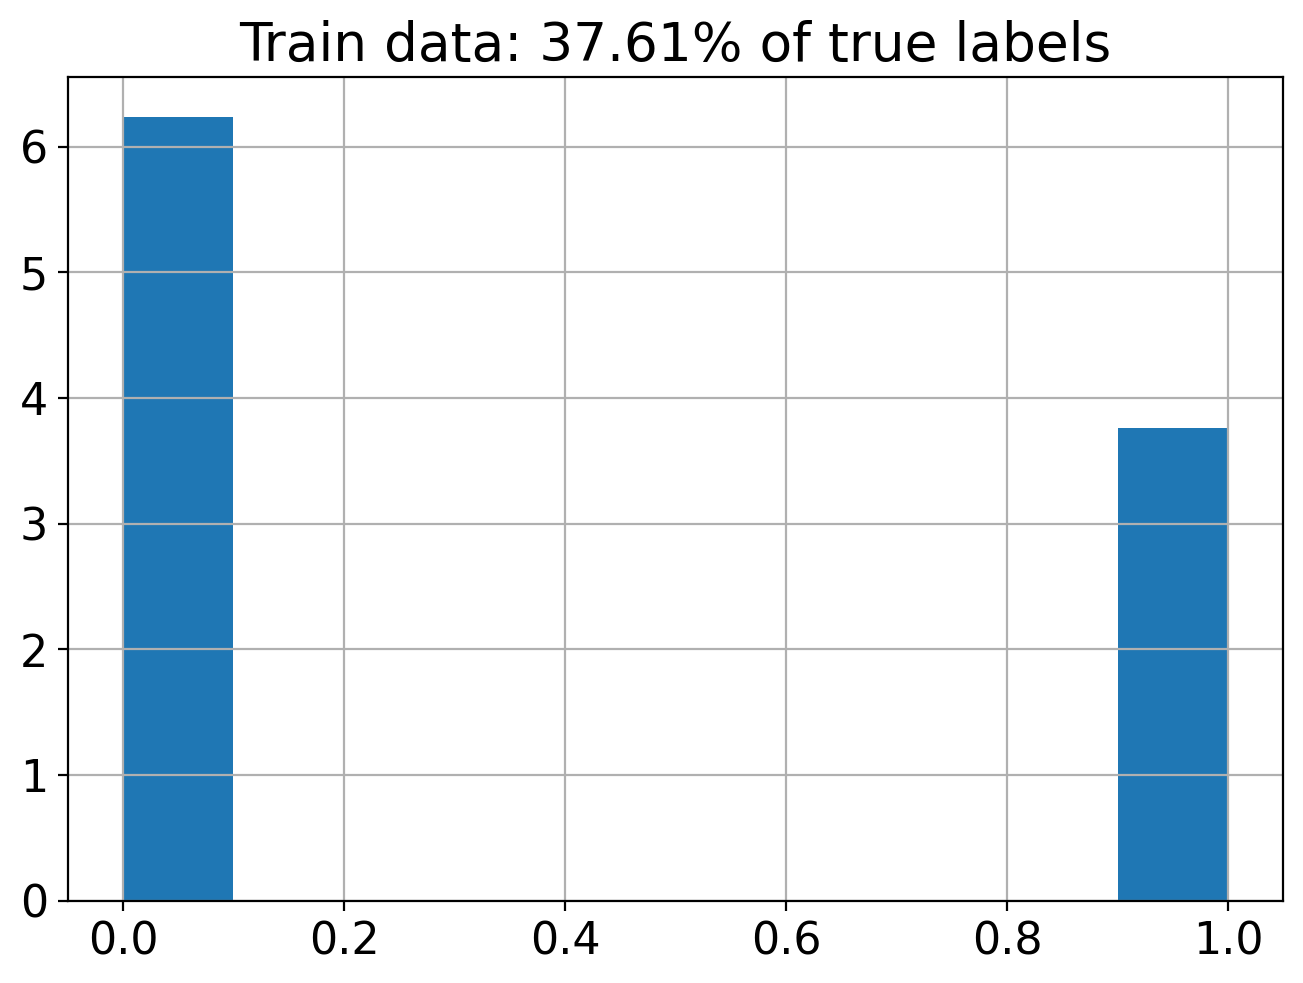

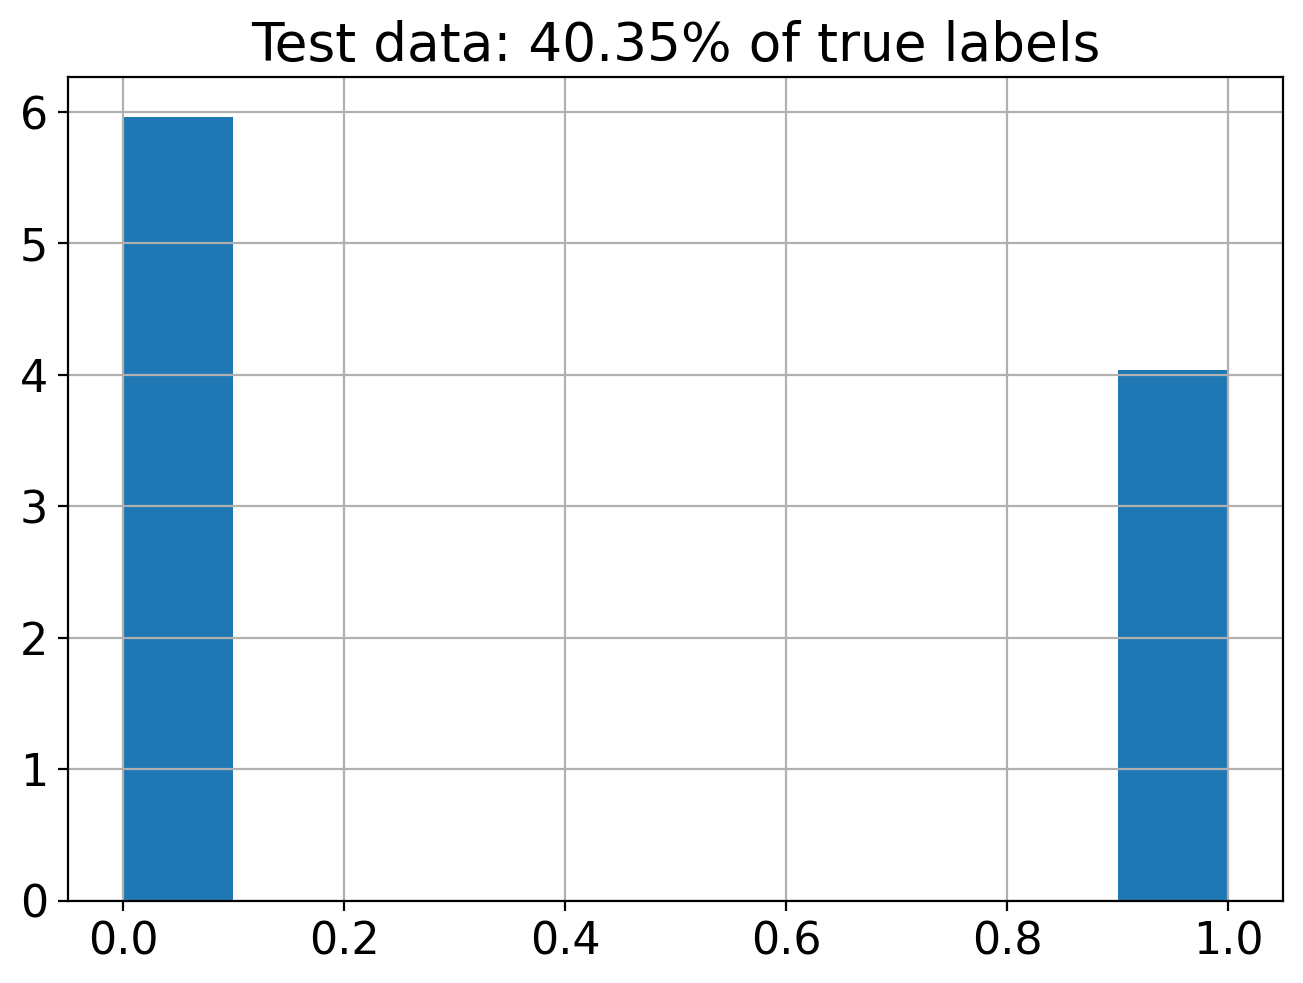

In [19]:
from tf_chpvk_pv.dataset import *
import matplotlib.pyplot as plt
import pandas as pd

df = create_dataset(use_turnley_radii=True)

train_df, test_df = train_test_split_()

train_df.exp_label.hist(density=True)
amount_of_true = train_df[train_df.exp_label == 1].shape[0]/train_df.shape[0]
plt.title('Train data: {:.2f}% of true labels'.format(amount_of_true*100))
plt.show()
test_df.exp_label.hist(density=True)
amount_of_true = test_df[test_df.exp_label == 1].shape[0]/test_df.shape[0]
plt.title('Test data: {:.2f}% of true labels'.format(amount_of_true*100))
plt.show()

In [4]:
#count the number of material in each class in the training/test sets
dict_ch = {133:'F',
           181:'Cl',
           198:'Se',
           196:'Br',
           184.:'S',
           220.00000000000003:'I'
          }

train_df['X'] = train_df.replace({'rX':dict_ch})['rX']
test_df['X'] = test_df.replace({'rX':dict_ch})['rX']

train_vc = pd.DataFrame(train_df[['X', 'exp_label']].groupby('X')['exp_label'].value_counts())
test_vc = pd.DataFrame(test_df[['X', 'exp_label']].groupby('X')['exp_label'].value_counts())

print('In the training set, %s compositions are unstable and %s are stable.' % (train_df['exp_label'].value_counts().values[0], train_df['exp_label'].value_counts().values[1]))
print('The distribution in the training set by anions is the following')
display(train_vc)

print('In the test set, %s compositions are unstable and %s are stable.' % (test_df['exp_label'].value_counts().values[0], test_df['exp_label'].value_counts().values[1]))
print('The distribution in the test set by anions is the following')
display(test_vc)

In the training set, 141 compositions are unstable and 85 are stable.
The distribution in the training set by anions is the following


count
X  exp_label       
Br 0.0           17
   1.0            4
Cl 0.0           43
   1.0           14
F  1.0           40
   0.0           13
I  0.0           29
   1.0            5
S  0.0           26
   1.0           21
Se 0.0           13
   1.0            1

In the test set, 34 compositions are unstable and 23 are stable.
The distribution in the test set by anions is the following


count
X  exp_label       
Br 0.0            5
   1.0            1
Cl 0.0           10
   1.0            4
F  1.0           11
   0.0            2
I  0.0            7
   1.0            2
S  0.0            7
   1.0            5
Se 0.0            3

In [6]:
import glob as gl
from tf_chpvk_pv.config import DATA_DIR

features_path = DATA_DIR / 'features_space/3 ops/features/'

files = gl.glob('*.csv', root_dir=features_path)

Classification tree accuracy (for t) on the train set: 0.747788.
Classification tree accuracy (for t) on the train set (5 fold CV): 0.738647.
Classification tree accuracy (for t) on the test set: 0.596491.
0.851217 < t < 0.953118 indicates stable perovskites.
Classification tree accuracy (for tau) on the train set: 0.805310.
Classification tree accuracy (for tau) on the train set (5 fold CV): 0.783092.
Classification tree accuracy (for tau) on the test set: 0.719298.
tau < 4.180000 indicates stable perovskites.
Classification tree accuracy (for t_jess) on the train set: 0.743363.
Classification tree accuracy (for t_jess) on the train set (5 fold CV): 0.725507.
Classification tree accuracy (for t_jess) on the test set: 0.701754.
0.823404 < t_jess < 1.055433 indicates stable perovskites.
2025-08-04 21:33:30.603 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**3) - rA_rX_ratio

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-08-04 21:58:18.936 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_diff * rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) - ((chi_diff * chi_BX_ratio) * (chi_diff - chi_BX_ratio)))
Classification tree accuracy (for t_sisso_45) on the train set: 0.840708.
Classification tree accuracy (for t_sisso_45) on the train set (5 fold CV): 0.782899.
Classification tree accuracy (for t_sisso_45) on the test set: 0.859649.
t_sisso_45 < 0.460590 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-08-04 21:58:40.654 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**3) - (log_rA_rB_ratio**3)) - (rA_rX_ratio - log_rA_rB_ratio))
Classification tree accuracy (for t_sisso_68) on the train set: 0.796460.
Classification tree accuracy (for t_sisso_68) on the train set (5 fold CV): 0.760966.
Classification tree accuracy (for t_sisso_68) on the test set: 0.824561.
t_sisso_68 < 0.236844 indicates stable perovskites.
2025-08-04 21:59:00.207 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((|rA_rX_ratio - rB_rX_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)) + ((|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_0) on the train set: 0.809735.
Classification tree accuracy (for t_sisso_0) on the train set (5 fold CV): 0.805217.
Classification tree accuracy (for t_sisso_0) on the test set: 0.842105.
t_sisso_0 < -2.000584 indicates stable perovskites.
2025-08-04 21:59:15.406 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (|(|(|rA_rX_ratio - rB_rX_ratio|) - exp(log_rA_rB_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / rB_rX_ratio) - (|chi_BX_ratio - log_rA_rB_ratio|)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature exp((|exp(rA_rX_ratio) - (1.0 / log_rA_rB_ratio)|)) has values greater than 1e6. Skipping.
Feature (|exp((1.0 / log_rA_rB_ratio)) - (|exp(log_rA_rB_ratio) - chi_BX_ratio|)|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / chi_diff) - (|chi_diff - log_rA_rB_ratio|)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature exp((|(|rB_rX_ratio - log_rA_rB_ratio|) - (1.0 / log_rA_rB_ratio)|)) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - chi_BX_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|chi_diff - log_rA_rB_ratio|) - (1.0 / rA_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has va

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio - rB_rX_ratio) - (log_rA_rB_ratio**2)) - ((rB_rX_ratio**2) - rA_rX_ratio))
Classification tree accuracy (for t_sisso_77) on the train set: 0.823009.
Classification tree accuracy (for t_sisso_77) on the train set (5 fold CV): 0.796329.
Classification tree accuracy (for t_sisso_77) on the test set: 0.859649.
t_sisso_77 < 0.676332 indicates stable perovskites.
2025-08-04 21:59:43.325 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (|(|(|chi_diff - rA_rX_ratio|) - (rA_rX_ratio - log_rA_rB_ratio)|) - (exp(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree accuracy (for t_sisso_47) on the train set: 0.814159.
Classification tree accuracy (for t_sisso_47) on the train set (5 fold CV): 0.809469.
Classification tree accuracy (for t_sisso_47) on the test set: 0.824561.
t_sisso_47 < 2.126771 indicates stable perovskites.
2025-08-04 21:59:56.437 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio - rB_rX_ratio) - (log_rA_rB_ratio**2)) - ((log_rA_rB_ratio**2) - exp(log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_67) on the train set: 0.849558.
Classification tree accuracy (for t_sisso_67) on the train set (5 fold CV): 0.840386.
Classification tree accuracy (for t_sisso_67) on the test set: 0.877193.
t_sisso_67 < 1.483274 indicates stable perovskites.
2025-08-04 22:00:11.237 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (|(|(rA_rX_ratio**2) - (rB_rX_ratio**2)|) - exp((|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree accuracy (for t_sisso_95) on the train set: 0.853982.
Classification tree accuracy (for t_sisso_95) on the train set (5 fold CV): 0.791498.
Classification tree accuracy (for t_sisso_95) on the test set: 0.877193.
t_sisso_95 < 0.638931 indicates stable perovskites.
2025-08-04 22:00:24.014 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_diff) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_BX_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / (rB_rX_ratio * log_rA_rB_ratio)) / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio / chi_diff))) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio / chi_diff))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_BX_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / (rA_rX_ratio * log_rA_rB_ratio)) / ((log_rA_rB_ratio / chi_BX_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / l

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature exp(((chi_BX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio + log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio + log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio + log_rA_rB_ratio) + (chi_BX_ratio**3)) + ((chi_BX_ratio**3) + chi_BX_ratio))
Classification tree accuracy (for t_sisso_32) on the train set: 0.787611.
Classification tree accuracy (for t_sisso_32) on the train set (5 fold CV): 0.787729.
Classification tree accuracy (for t_sisso_32) on the test set: 0.754386.
t_sisso_32 < 6.670160 indicates stable perovskites.
2025-08-04 22:00:51.465 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (|(|(|chi_diff - rA_rX_ratio|) - (|rB_rX_ratio - chi_BX_ratio|)|) - (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|)|)
Classification tree accuracy (for t_sisso_103) on the train set: 0.818584.
Classification tree accuracy (for t_sisso_103) on the train set (5 fold CV): 0.796425.
Classification tree accuracy (for t_sisso_103) on the test set: 0.824561.
t_sisso_103 < 0.419281 indicates stable perovskites.
2025-08-04 22:01:06.174 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: ((exp(rA_rX_ratio) - exp(log_rA_rB_ratio)) - (exp(rB_rX_ratio) + rB_rX_ratio))
Classification tree accuracy (for t_sisso_3) on the train set: 0.787611.
Classification tree accuracy (for t_sisso_3) on the train set (5 fold CV): 0.765411.
Classification tree accuracy (for t_sisso_3) on the test set: 0.807018.
t_sisso_3 < -1.418418 indicates stable perovskites.
2025-08-04 22:01:18.964 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rB_rX_ratio * chi_BX_ratio) * chi_BX_ratio) + ((1.0 / chi_BX_ratio) + chi_BX_ratio))
Classification tree accuracy (for t_sisso_19) on the train set: 0.756637.
Classification tree accuracy (for t_sisso_19) on the train set (5 fold CV): 0.756908.
Classification tree accuracy (for t_sisso_19) on the test set: 0.754386.
t_sisso_19 < 2.895629 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-08-04 22:01:33.720 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Feature (((chi_diff / rA_rX_ratio) / exp(rA_rX_ratio)) / exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / exp(rA_rX_ratio)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((chi_BX_ratio / exp(chi_BX_ratio)) / exp((chi_diff / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / rA_rX_ratio) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / rA_rX_ratio) / exp((rB_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rA_rX_ratio) / rA_rX_ratio) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_diff / log_rA_rB_ratio)) / exp((chi_BX_ratio / chi_diff))) has values great

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio**2) * (rB_rX_ratio * log_rA_rB_ratio)) * (log(rB_rX_ratio) * (rB_rX_ratio**2)))
Classification tree accuracy (for t_sisso_126) on the train set: 0.774336.
Classification tree accuracy (for t_sisso_126) on the train set (5 fold CV): 0.756329.
Classification tree accuracy (for t_sisso_126) on the test set: 0.736842.
t_sisso_126 < -0.033206 indicates stable perovskites.
2025-08-04 22:01:58.759 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio / chi_diff)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / (log_rA_rB_ratio^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio^3) / (chi_diff - rA_rX_ratio)) / ((chi_diff - log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio - log_rA_rB_ratio) / rA_rX_ratio) / ((rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio - log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_63) on the train set: 0.796460.
Classification tree accuracy (for t_sisso_63) on the train set (5 fold CV): 0.787536.
Classification tree accuracy (for t_sisso_63) on the test set: 0.807018.
t_sisso_63 < 0.564019 indicates stable perovskites.
2025-08-04 22:02:13.959 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * log(rB_rX_ratio)) * ((rB_rX_ratio * log_rA_rB_ratio) * rB_rX_ratio))
Classification tree accuracy (for t_sisso_119) on the train set: 0.774336.
Classification tree accuracy (for t_sisso_119) on the train set (5 fold CV): 0.747633.
Classification tree accuracy (for t_sisso_119) on the test set: 0.754386.
t_sisso_119 < -0.038808 indicates stable perovskites.
2025-08-04 22:02:26.654 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio + log_rA_rB_ratio) + (chi_BX_ratio**2)) + ((chi_BX_ratio**2)**2))
Classification tree accuracy (for t_sisso_39) on the train set: 0.787611.
Classification tree accuracy (for t_sisso_39) on the train set (5 fold CV): 0.787729.
Classification tree accuracy (for t_sisso_39) on the test set: 0.754386.
t_sisso_39 < 5.522276 indicates stable perovskites.
2025-08-04 22:02:41.379 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((rA_rX_ratio^2)^2) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio)^2)^2) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio)^2) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature ((ln(chi_diff) / log_rA_rB_ratio) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((ln(chi_diff) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio)^2) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio)^2)^2) has values greater than 1e6. Skipping.
Feature (((chi_diff / rB_rX_ratio) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-08-04 22:02:53.862 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Feature exp((exp(chi_diff) * (chi_diff * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((sqrt(rB_rX_ratio) * log_rA_rB_ratio) * rB_rX_ratio)
Classification tree accuracy (for t_sisso_118) on the train set: 0.769912.
Classification tree accuracy (for t_sisso_118) on the train set (5 fold CV): 0.734396.
Classification tree accuracy (for t_sisso_118) on the test set: 0.736842.
t_sisso_118 < 0.195211 indicates stable perovskites.
2025-08-04 22:03:08.747 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((chi_diff * rB_rX_ratio) * (chi_BX_ratio * log_rA_rB_ratio)) * ((chi_BX_ratio**3)**3))
Classification tree accuracy (for t_sisso_124) on the train set: 0.787611.
Classification tree accuracy (for t_sisso_124) on the train set (5 fold CV): 0.787729.
Classification tree accuracy (for t_sisso_124) on the test set: 0.754386.
t_sisso_124 < 5.309427 indicates stable perovskites.
2025-08-04 22:03:21.617 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((chi_diff - rA_rX_ratio) - (chi_diff * log_rA_rB_ratio)) * ((chi_diff - rB_rX_ratio) * (rA_rX_ratio - log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_57) on the train set: 0.823009.
Classification tree accuracy (for t_sisso_57) on the train set (5 fold CV): 0.800966.
Classification tree accuracy (for t_sisso_57) on the test set: 0.807018.
t_sisso_57 < -0.067029 indicates stable perovskites.
2025-08-04 22:03:36.899 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio / chi_diff) - (log_rA_rB_ratio / chi_diff)) / ((rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio - log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_64) on the train set: 0.818584.
Classification tree accuracy (for t_sisso_64) on the train set (5 fold CV): 0.796425.
Classification tree accuracy (for t_sisso_64) on the test set: 0.842105.
t_sisso_64 < 0.377099 indicates stable perovskites.
2025-08-04 22:03:51.500 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature exp((exp(chi_diff) * (chi_BX_ratio^3))) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio^3) * exp(chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature exp(((chi_diff * log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Feature exp((exp(chi_diff) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((chi_diff * rB_rX_ratio) * (chi_BX_ratio * log_rA_rB_ratio)) * ((chi_BX_ratio**3)**3))
Classification tree accuracy (for t_sisso_117) on the train set: 0.787611.
Classification tree accuracy (for t_sisso_117) on the train set (5 fold CV): 0.787729.
Classification tree accuracy (for t_sisso_117) on the test set: 0.754386.
t_sisso_117 < 5.309427 indicates stable perovskites.
2025-08-04 22:04:04.062 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (|(|log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|) - (|(|rA_rX_ratio - log_rA_rB_ratio|) - rB_rX_ratio|)|)
Classification tree accuracy (for t_sisso_108) on the train set: 0.849558.
Classification tree accuracy (for t_sisso_108) on the train set (5 fold CV): 0.835845.
Classification tree accuracy (for t_sisso_108) on the test set: 0.877193.
t_sisso_108 < 0.104760 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-08-04 22:04:19.820 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|chi_diff - rA_rX_ratio|) - (|rB_rX_ratio - chi_BX_ratio|)|) - (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|)|)
Classification tree accuracy (for t_sisso_99) on the train set: 0.818584.
Classification tree accuracy (for t_sisso_99) on the train set (5 fold CV): 0.796425.
Classification tree accuracy (for t_sisso_99) on the test set: 0.824561.
t_sisso_99 < 0.419281 indicates stable perovskites.
2025-08-04 22:04:33.389 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((chi_diff / rB_rX_ratio) / (rA_rX_ratio^3)) / ((log_rA_rB_ratio / chi_diff)^3)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / sqrt(chi_BX_ratio)) / ((log_rA_rB_ratio / chi_diff)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / sqrt(chi_BX_ratio)) / ((log_rA_rB_ratio / chi_diff)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / rB_rX_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / rA_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^3)) / ((rB_rX_ratio / rA_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio / rA_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((chi_diff / rB_rX_ratio) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio / chi_diff)^3)) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / (rB_rX_ratio^3)) 

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * rB_rX_ratio) * (log(rB_rX_ratio) * (rB_rX_ratio * log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_129) on the train set: 0.774336.
Classification tree accuracy (for t_sisso_129) on the train set (5 fold CV): 0.747633.
Classification tree accuracy (for t_sisso_129) on the test set: 0.754386.
t_sisso_129 < -0.038808 indicates stable perovskites.
2025-08-04 22:04:59.476 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((chi_diff / rA_rX_ratio) / (rA_rX_ratio + rB_rX_ratio)) / exp((rB_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff + rB_rX_ratio) / exp(rA_rX_ratio)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) + (rB_rX_ratio / rA_rX_ratio)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / chi_BX_ratio) + chi_BX_ratio) + exp((rB_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((exp(rB_rX_ratio) + chi_BX_ratio) / ((rB_rX_ratio / log_rA_rB_ratio) + (log_rA_rB_ratio / rB_rX_ratio)))
Classification tree accuracy (for t_sisso_24) on the train set: 0.800885.
Classification tree accuracy (for t_sisso_24) on the train set (5 fold CV): 0.800870.
Classification tree accuracy (for t_sisso_24) on the test set: 0.824561.
t_sisso_24 < 1.245151 indicates stable perovskites.
2025-08-04 22:05

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: ((exp(rA_rX_ratio) - exp(log_rA_rB_ratio)) - (exp(rB_rX_ratio) - log_rA_rB_ratio))
Classification tree accuracy (for t_sisso_69) on the train set: 0.765487.
Classification tree accuracy (for t_sisso_69) on the train set (5 fold CV): 0.752077.
Classification tree accuracy (for t_sisso_69) on the test set: 0.754386.
t_sisso_69 < -0.529876 indicates stable perovskites.
2025-08-04 22:05:26.501 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rB_rX_ratio * chi_BX_ratio) / sqrt(rA_rX_ratio)) * ((log_rA_rB_ratio / chi_diff) * rB_rX_ratio))
Classification tree accuracy (for t_sisso_113) on the train set: 0.792035.
Classification tree accuracy (for t_sisso_113) on the train set (5 fold CV): 0.787633.
Classification tree accuracy (for t_sisso_113) on the test set: 0.771930.
t_sisso_113 < 0.108189 indicates stable perovskites.
2025-08-04 22:05:41.231 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rB_rX_ratio + chi_BX_ratio) + sqrt(rB_rX_ratio)) / ((rB_rX_ratio / log_rA_rB_ratio) + (log_rA_rB_ratio / rB_rX_ratio)))
Classification tree accuracy (for t_sisso_28) on the train set: 0.800885.
Classification tree accuracy (for t_sisso_28) on the train set (5 fold CV): 0.800870.
Classification tree accuracy (for t_sisso_28) on the test set: 0.807018.
t_sisso_28 < 1.029775 indicates stable perovskites.
2025-08-04 22:05:54.066 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio + chi_BX_ratio) + log(rA_rX_ratio)) + (log(rA_rX_ratio) + sqrt(rB_rX_ratio)))
Classification tree accuracy (for t_sisso_44) on the train set: 0.778761.
Classification tree accuracy (for t_sisso_44) on the train set (5 fold CV): 0.778841.
Classification tree accuracy (for t_sisso_44) on the test set: 0.771930.
t_sisso_44 < 2.646446 indicates stable perovskites.
2025-08-04 22:06:08.591 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio / chi_diff) - (log_rA_rB_ratio / chi_diff)) / ((rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio - log_rA_rB_ratio)))
Classification tree accuracy (for t_sisso_65) on the train set: 0.818584.
Classification tree accuracy (for t_sisso_65) on the train set (5 fold CV): 0.796425.
Classification tree accuracy (for t_sisso_65) on the test set: 0.842105.
t_sisso_65 < 0.377099 indicates stable perovskites.
2025-08-04 22:06:23.241 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: ((|(|chi_diff - rA_rX_ratio|) - sqrt(chi_diff)|) + (|sqrt(chi_diff) - (|rB_rX_ratio - log_rA_rB_ratio|)|))
Classification tree accuracy (for t_sisso_15) on the train set: 0.849558.
Classification tree accuracy (for t_sisso_15) on the train set (5 fold CV): 0.844928.
Classification tree accuracy (for t_sisso_15) on the test set: 0.859649.
t_sisso_15 < 1.738248 indicates stable perovskites.
2025-08-04 22:06:36.077 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature ((|(rB_rX_ratio / rA_rX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / (|rB_rX_ratio - chi_BX_ratio|)) / (|(|rB_rX_ratio - chi_BX_ratio|) - (log_rA_rB_ratio / rA_rX_ratio)|)) has values greater than 1e6. Skipping.
Feature ((|(|rB_rX_ratio - chi_BX_ratio|) - rB_rX_ratio|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (|rB_rX_ratio - chi_BX_ratio|)) / (|(|rB_rX_ratio - chi_BX_ratio|) - (log_rA_rB_ratio / rA_rX_ratio)|)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((|(rA_rX_ratio**2) - (chi_BX_ratio / chi_diff)|) / (|(rB_rX_ratio / rA_rX_ratio) - log_rA_rB_ratio|))
Classification tree accuracy (for t_sisso_90) on the train set: 0.809735.
Classification tree accuracy (for t_sisso_90) on the train set (5 fold CV): 0.796039.
Classification tree accuracy (for t_sisso_90) on the test set: 0

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((rA_rX_ratio / log_rA_rB_ratio)^2)^2) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio^2)^2) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio)^2) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio / chi_diff)^2)) has values greater than 1e6. Skipping.
Feature ((rA_rX_ratio / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio / chi_diff)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio)^2) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / rB_rX_ratio) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio / chi_diff)^2)) has values greater than 1e6. Skipping.
Feature (((chi_diff / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_diff)^2)) has values greater than 1e6. Skipping.
Feature ((sqrt(chi_diff) / (log_rA_rB_ratio^2)) / ((l

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (|((1.0 / rA_rX_ratio) + (|rB_rX_ratio - log_rA_rB_ratio|)) - (|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|)|)
Classification tree accuracy (for t_sisso_12) on the train set: 0.853982.
Classification tree accuracy (for t_sisso_12) on the train set (5 fold CV): 0.840580.
Classification tree accuracy (for t_sisso_12) on the test set: 0.894737.
t_sisso_12 < 0.409838 indicates stable perovskites.
2025-08-04 22:07:17.979 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio - rB_rX_ratio) - (log_rA_rB_ratio**2)) - ((rB_rX_ratio**2) - rA_rX_ratio))
Classification tree accuracy (for t_sisso_71) on the train set: 0.823009.
Classification tree accuracy (for t_sisso_71) on the train set (5 fold CV): 0.796329.
Classification tree accuracy (for t_sisso_71) on the test set: 0.859649.
t_sisso_71 < 0.676332 indicates stable perovskites.
2025-08-04 22:07:30.660 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rB_rX_ratio * chi_BX_ratio) * (chi_BX_ratio * log_rA_rB_ratio)) + (exp(chi_BX_ratio) + chi_BX_ratio))
Classification tree accuracy (for t_sisso_18) on the train set: 0.787611.
Classification tree accuracy (for t_sisso_18) on the train set (5 fold CV): 0.787729.
Classification tree accuracy (for t_sisso_18) on the test set: 0.754386.
t_sisso_18 < 5.193869 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-08-04 22:07:45.473 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...
Feature (((chi_diff / rA_rX_ratio)^2) / exp((chi_BX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / ((chi_diff / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature ((exp(chi_diff) / (rA_rX_ratio^2)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rA_rX_ratio) / exp(rA_rX_ratio)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_diff / rB_rX_ratio) / (rA_rX_ratio^2)) / exp((rB_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rB_rX_ratio) / (rA_rX_ratio^2)) / exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((chi_BX_ratio / exp(chi_BX_ratio)) / exp((chi_diff / log_rA_rB_ratio))) has values greater th

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: ((exp(rA_rX_ratio) - exp(log_rA_rB_ratio)) - (exp(rB_rX_ratio) - log_rA_rB_ratio))
Classification tree accuracy (for t_sisso_70) on the train set: 0.765487.
Classification tree accuracy (for t_sisso_70) on the train set (5 fold CV): 0.752077.
Classification tree accuracy (for t_sisso_70) on the test set: 0.754386.
t_sisso_70 < -0.529876 indicates stable perovskites.
2025-08-04 22:08:10.168 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:76 - Training tree model with SISSO features...


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: ((1.0 / (chi_diff + rA_rX_ratio)) - ((1.0 / chi_diff) + chi_BX_ratio))
Classification tree accuracy (for t_sisso_4) on the train set: 0.774336.
Classification tree accuracy (for t_sisso_4) on the train set (5 fold CV): 0.770048.
Classification tree accuracy (for t_sisso_4) on the test set: 0.736842.
t_sisso_4 < -1.448889 indicates stable perovskites.


/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:301: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


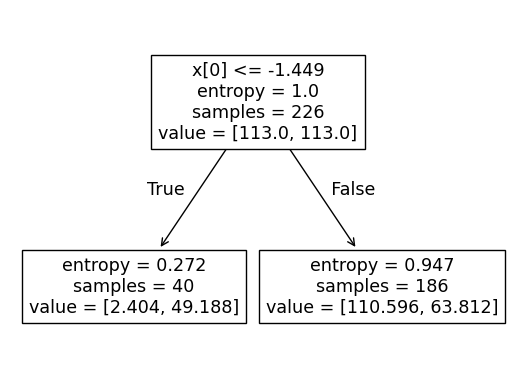

In [7]:
from tf_chpvk_pv.modeling.train import *
from pathlib import Path
from tf_chpvk_pv.config import DATA_DIR, RESULTS_DIR

#df_acc_old_path = RESULTS_DIR / 'tolerance factors accuracy for several operations.csv'

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

features_path = DATA_DIR / 'features_space/3 ops/features/'

#df_acc_old = pd.read_csv(df_acc_old_path)
df_acc_old = pd.DataFrame()

tfs = ['t', 'tau', 't_jess']
tf_tresh = [2, 1, 2]
df_acc =pd.DataFrame()
clfs = {}
t_sisso_expressions = {}

for tf, tresh in zip(tfs, tf_tresh):
    df_acc, clf_t = test_tolerance_factor(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
    clfs[tf] = clf_t

for feat in files:
    #check that the tree file doesn't exist
    idx = int(feat.split('/')[-1].split('.csv')[0].split('_')[-1])

    col = 't_sisso_' + str(idx)
    
    re_do = False

    if col in df_acc_old.columns:
        no_nan_values = df_acc_old[col].isna().sum()
        if no_nan_values == 0:
            print('Tree with operations idx = %s already exists' % str(idx))
            continue
        else:
            print('Tree with operations idx = %s has %s missing values' % (str(idx), no_nan_values))
            re_do = True
    else:
        re_do = True

    if re_do:
        try:
            tf = 't_sisso_' + str(idx)
            df = pd.read_csv(features_path / feat)
            t_sisso_expression = train_tree_sis_features(features_path / feat)
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
            df_acc, clf_t = test_tolerance_factor(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=1)
            clfs[tf] = clf_t
        except:
            print('Error in %s' % feat)
            continue

Classification tree f1 (for t) on the train set: 0.637168.
Classification tree f1 (for t) on the train set (5 fold CV): 0.595418.
Classification tree f1 (for t) on the test set: 0.596491.
0.830243 < t < 0.868341 indicates stable perovskites.
Classification tree f1 (for tau) on the train set: 0.884956.
Classification tree f1 (for tau) on the train set (5 fold CV): 0.851560.
Classification tree f1 (for tau) on the test set: 0.824561.
tau < 4.180000 indicates stable perovskites.
Classification tree f1 (for t_jess) on the train set: 0.725664.
Classification tree f1 (for t_jess) on the train set (5 fold CV): 0.650340.
Classification tree f1 (for t_jess) on the test set: 0.631579.
0.835219 < t_jess < 1.022730 indicates stable perovskites.
2025-03-27 08:45:11.876 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rB_rX_ratio) / (rA_rX_ratio + chi_BX_ratio)) + ((rB_rX_ratio * log_rA_rB_ra

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:41:10.138 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (1.0 / log_rA_rB_ratio)) - ((chi_BX_ratio - log_rA_rB_ratio) - rA_rX_ratio))
Classification tree f1 (for t_sisso_26) on the train set: 0.827434.
Classification tree f1 (for t_sisso_26) on the train set (5 fold CV): 0.721356.
Classification tree f1 (for t_sisso_26) on the test set: 0.859649.
t_sisso_26 < 4.464338 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:41:44.887 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * chi_BX_ratio) - (chi_BX_ratio + log_rA_rB_ratio)) + ((rA_rX_ratio - log_rA_rB_ratio) * log(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_14) on the train set: 0.831858.
Classification tree f1 (for t_sisso_14) on the train set (5 fold CV): 0.761099.
Classification tree f1 (for t_sisso_14) on the test set: 0.929825.
t_sisso_14 < -0.850609 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:42:19.533 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) - (rA_rX_ratio - log_rA_rB_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) / sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_176) on the train set: 0.858407.
Classification tree f1 (for t_sisso_176) on the train set (5 fold CV): 0.771260.
Classification tree f1 (for t_sisso_176) on the test set: 0.859649.
t_sisso_176 < 0.871024 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:42:54.282 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((ln(rB_rX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^3)^2)) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / rB_rX_ratio) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A^2) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / ln(rA_rX_ratio)) / ((rB_rX_ratio^3)^3)) ha

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:43:23.037 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((ln(rB_rX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((chi_BX_ratio / log_rA_rB_ratio) + log(log_rA_rB_ratio)) / ((chi_BX_ratio**3) + rB_rX_ratio))
Classification tree f1 (for t_sisso_98) on the train set: 0.840708.
Classification tree f1 (for t_sisso_98) on the train set (5 fold CV): 0.791827.
Classification tree f1 (for t_sisso_98) on the test set: 0.842105.
t_sisso_98 < 0.814918 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:43:57.114 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((|(rA_rX_ratio^3) - (rB_rX_ratio / log_rA_rB_ratio)|) * ((rB_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature ((|(rA_rX_ratio^3) - (rB_rX_ratio / log_rA_rB_ratio)|) / ((log_rA_rB_ratio / rB_rX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature ((|(rA_rX_ratio^3) - (rB_rX_ratio / log_rA_rB_ratio)|) * ((rA_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature ((|(rA_rX_ratio^3) - (rB_rX_ratio / log_rA_rB_ratio)|) / ((log_rA_rB_ratio / rA_rX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature ((|(rA_rX_ratio^3) - (rB_rX_ratio / log_rA_rB_ratio)|) * ((chi_BX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((|rB_rX_ratio - log_rA_rB_ratio|) / (rB_rX_r

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:44:30.894 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (1.0 / ((rA_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (1.0 / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((EA_A * rA_rX_ratio) * (log_rA_rB_ratio**3)) * (log(chi_BX_ratio)**3))
Classification tree f1 (for t_sisso_289) on the train set: 0.792035.
Classification tree f1 (for t_sisso_289) on the train set (5 fold CV): 0.710726.
Classification tree f1 (for t_sisso_289) on the test set: 0.719298.
t_sisso_289 < -0.000559 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:45:04.968 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((|(rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio - chi_BX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) / (|(rA_rX_ratio - log_rA_rB_ratio) - (chi_BX_ratio**2)|))
Classification tree f1 (for t_sisso_129) on the train set: 0.796460.
Classification tree f1 (for t_sisso_129) on the train set (5 fold CV): 0.773853.
Classification tree f1 (for t_sisso_129) on the test set: 0.719298.
t_sisso_129 < -0.517538 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:45:38.904 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (rB_rX_ratio / log_rA_rB_ratio)) / ((rA_rX_ratio + rB_rX_ratio) + (1.0 / rA_rX_ratio)))
Classification tree f1 (for t_sisso_92) on the train set: 0.853982.
Classification tree f1 (for t_sisso_92) on the train set (5 fold CV): 0.747482.
Classification tree f1 (for t_sisso_92) on the test set: 0.859649.
t_sisso_92 < 1.174482 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:46:12.911 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * rB_rX_ratio) * (rB_rX_ratio * log_rA_rB_ratio)) + ((EA_A * log_rA_rB_ratio) * log(rA_rX_ratio)))
Classification tree f1 (for t_sisso_84) on the train set: 0.774336.
Classification tree f1 (for t_sisso_84) on the train set (5 fold CV): 0.711438.
Classification tree f1 (for t_sisso_84) on the test set: 0.754386.
t_sisso_84 < -0.020287 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:46:46.814 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - log(chi_BX_ratio)|) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_53) on the train set: 0.858407.
Classification tree f1 (for t_sisso_53) on the train set (5 fold CV): 0.777643.
Classification tree f1 (for t_sisso_53) on the test set: 0.842105.
t_sisso_53 < 1.803467 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:47:20.747 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|) - (|sqrt(rA_rX_ratio) - sqrt(chi_BX_ratio)|)|)
Classification tree f1 (for t_sisso_259) on the train set: 0.849558.
Classification tree f1 (for t_sisso_259) on the train set (5 fold CV): 0.770938.
Classification tree f1 (for t_sisso_259) on the test set: 0.842105.
t_sisso_259 < 0.210603 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:47:54.572 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rA_rX_ratio * log_rA_rB_ratio) - (log_rA_rB_ratio**3)|) - (|(1.0 / rB_rX_ratio) - (1.0 / log_rA_rB_ratio)|)|)
Classification tree f1 (for t_sisso_216) on the train set: 0.814159.
Classification tree f1 (for t_sisso_216) on the train set (5 fold CV): 0.779205.
Classification tree f1 (for t_sisso_216) on the test set: 0.789474.
t_sisso_216 < 0.595547 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:48:28.569 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * sqrt(log_rA_rB_ratio)) * (rB_rX_ratio * log_rA_rB_ratio))
Classification tree f1 (for t_sisso_286) on the train set: 0.769912.
Classification tree f1 (for t_sisso_286) on the train set (5 fold CV): 0.680761.
Classification tree f1 (for t_sisso_286) on the test set: 0.719298.
t_sisso_286 < 0.095928 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:49:02.383 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - rB_rX_ratio) - ((|rB_rX_ratio - log_rA_rB_ratio|) - rA_rX_ratio))
Classification tree f1 (for t_sisso_140) on the train set: 0.858407.
Classification tree f1 (for t_sisso_140) on the train set (5 fold CV): 0.762358.
Classification tree f1 (for t_sisso_140) on the test set: 0.859649.
t_sisso_140 < 1.164745 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:49:38.101 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rB_rX_ratio) + (rB_rX_ratio**3)) + (log(log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_119) on the train set: 0.845133.
Classification tree f1 (for t_sisso_119) on the train set (5 fold CV): 0.755896.
Classification tree f1 (for t_sisso_119) on the test set: 0.824561.
t_sisso_119 < -0.815641 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:50:12.642 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|) + (|sqrt(chi_BX_ratio) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_52) on the train set: 0.827434.
Classification tree f1 (for t_sisso_52) on the train set (5 fold CV): 0.802904.
Classification tree f1 (for t_sisso_52) on the test set: 0.754386.
t_sisso_52 < 0.940933 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:50:47.414 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - sqrt(rB_rX_ratio)) + (sqrt(log_rA_rB_ratio) - log_rA_rB_ratio))
Classification tree f1 (for t_sisso_35) on the train set: 0.840708.
Classification tree f1 (for t_sisso_35) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_35) on the test set: 0.842105.
t_sisso_35 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:51:22.108 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|(log(log_rA_rB_ratio)**3) - (1.0 / rB_rX_ratio)|)
Classification tree f1 (for t_sisso_254) on the train set: 0.858407.
Classification tree f1 (for t_sisso_254) on the train set (5 fold CV): 0.788575.
Classification tree f1 (for t_sisso_254) on the test set: 0.877193.
t_sisso_254 < 2.287754 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:51:57.066 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio + rB_rX_ratio) + rA_rX_ratio) * ((rB_rX_ratio**2)**2))
Classification tree f1 (for t_sisso_71) on the train set: 0.606195.
Classification tree f1 (for t_sisso_71) on the train set (5 fold CV): 0.609958.
Classification tree f1 (for t_sisso_71) on the test set: 0.561404.
t_sisso_71 < 0.040808 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:52:31.977 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio - log_rA_rB_ratio) * (log_rA_rB_ratio**3)) * ((log_rA_rB_ratio**3) - log_rA_rB_ratio))
Classification tree f1 (for t_sisso_160) on the train set: 0.831858.
Classification tree f1 (for t_sisso_160) on the train set (5 fold CV): 0.751019.
Classification tree f1 (for t_sisso_160) on the test set: 0.824561.
t_sisso_160 < -0.017103 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:53:06.940 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|rB_rX_ratio - log_rA_rB_ratio|) - rA_rX_ratio|) - ((|chi_BX_ratio - log_rA_rB_ratio|) / exp(chi_BX_ratio))|)
Classification tree f1 (for t_sisso_229) on the train set: 0.853982.
Classification tree f1 (for t_sisso_229) on the train set (5 fold CV): 0.755434.
Classification tree f1 (for t_sisso_229) on the test set: 0.842105.
t_sisso_229 < 0.676665 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:53:41.717 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio + rB_rX_ratio) + rA_rX_ratio) * ((rB_rX_ratio**2)**2))
Classification tree f1 (for t_sisso_80) on the train set: 0.606195.
Classification tree f1 (for t_sisso_80) on the train set (5 fold CV): 0.609958.
Classification tree f1 (for t_sisso_80) on the test set: 0.561404.
t_sisso_80 < 0.040808 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:54:16.534 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((|rB_rX_ratio - log_rA_rB_ratio|) - log_rA_rB_ratio) - (|(chi_BX_ratio**3) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_135) on the train set: 0.823009.
Classification tree f1 (for t_sisso_135) on the train set (5 fold CV): 0.700021.
Classification tree f1 (for t_sisso_135) on the test set: 0.807018.
t_sisso_135 < -0.769353 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:54:51.242 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rB_rX_ratio) * exp(log_rA_rB_ratio)) * log((rB_rX_ratio * log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_284) on the train set: 0.823009.
Classification tree f1 (for t_sisso_284) on the train set (5 fold CV): 0.723746.
Classification tree f1 (for t_sisso_284) on the test set: 0.824561.
t_sisso_284 < -1.582279 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:55:26.075 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio**2) - rB_rX_ratio) - ((rB_rX_ratio - log_rA_rB_ratio)**2))
Classification tree f1 (for t_sisso_188) on the train set: 0.805310.
Classification tree f1 (for t_sisso_188) on the train set (5 fold CV): 0.747512.
Classification tree f1 (for t_sisso_188) on the test set: 0.771930.
t_sisso_188 < 0.190030 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:56:00.806 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|exp((1.0 / log_rA_rB_ratio)) - (1.0 / rB_rX_ratio)|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - chi_BX_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rB_rX_ratio - chi_BX_ratio|) - (1.0 / chi_BX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / rB_rX_ratio) - (|chi_BX_ratio - log_rA_rB_ratio|)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rB_rX_ratio - chi_BX_ratio|) - exp(log_rA_rB_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - exp(lo

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:56:33.473 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)) - ((|rB_rX_ratio - log_rA_rB_ratio|) - (log_rA_rB_ratio**2)))
Classification tree f1 (for t_sisso_144) on the train set: 0.809735.
Classification tree f1 (for t_sisso_144) on the train set (5 fold CV): 0.774438.
Classification tree f1 (for t_sisso_144) on the test set: 0.807018.
t_sisso_144 < 0.113303 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:57:08.260 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((ln(log_rA_rB_ratio) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / EA_A) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((ln(log_rA_rB_ratio) / (log_rA_rB_ratio^2))^2) has values greater than 1e6. Skipping.
Feature ((ln(log_rA_rB_ratio)^2) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / rB_rX_ratio)^2) / (ln(log_rA_rB_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / rB_rX_ratio) / ln(log_rA_rB_ratio))^2) has values greater than 1e6. Skip

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:57:41.198 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio - log_rA_rB_ratio) - log_rA_rB_ratio) - ((1.0 / log_rA_rB_ratio) - rB_rX_ratio))
Classification tree f1 (for t_sisso_196) on the train set: 0.862832.
Classification tree f1 (for t_sisso_196) on the train set (5 fold CV): 0.781232.
Classification tree f1 (for t_sisso_196) on the test set: 0.877193.
t_sisso_196 < -1.975124 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:58:15.871 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) + sqrt(rB_rX_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) + sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_33) on the train set: 0.787611.
Classification tree f1 (for t_sisso_33) on the train set (5 fold CV): 0.730452.
Classification tree f1 (for t_sisso_33) on the test set: 0.807018.
t_sisso_33 < 0.585090 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:58:50.749 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A / rA_rX_ratio) / rA_rX_ratio) + ((EA_A * rA_rX_ratio) / log(rB_rX_ratio)))
Classification tree f1 (for t_sisso_69) on the train set: 0.805310.
Classification tree f1 (for t_sisso_69) on the train set (5 fold CV): 0.716799.
Classification tree f1 (for t_sisso_69) on the test set: 0.789474.
t_sisso_69 < 0.194469 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 09:59:25.325 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio + chi_BX_ratio) + (rB_rX_ratio / log_rA_rB_ratio)) / ((rA_rX_ratio + rB_rX_ratio) - (log_rA_rB_ratio**2)))
Classification tree f1 (for t_sisso_17) on the train set: 0.694690.
Classification tree f1 (for t_sisso_17) on the train set (5 fold CV): 0.710226.
Classification tree f1 (for t_sisso_17) on the test set: 0.701754.
t_sisso_17 < 2.466908 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:00:00.180 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) / log_rA_rB_ratio) * (exp(chi_BX_ratio) - (chi_BX_ratio / log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_148) on the train set: 0.853982.
Classification tree f1 (for t_sisso_148) on the train set (5 fold CV): 0.761833.
Classification tree f1 (for t_sisso_148) on the test set: 0.842105.
t_sisso_148 < 2.043626 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:00:34.824 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * log_rA_rB_ratio) * rA_rX_ratio) * (|sqrt(rB_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|))
Classification tree f1 (for t_sisso_213) on the train set: 0.853982.
Classification tree f1 (for t_sisso_213) on the train set (5 fold CV): 0.785075.
Classification tree f1 (for t_sisso_213) on the test set: 0.877193.
t_sisso_213 < 0.234302 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:01:09.659 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * (|rA_rX_ratio - chi_BX_ratio|)) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_37) on the train set: 0.862832.
Classification tree f1 (for t_sisso_37) on the train set (5 fold CV): 0.782914.
Classification tree f1 (for t_sisso_37) on the test set: 0.894737.
t_sisso_37 < 0.981273 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:01:44.270 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - chi_BX_ratio|) - (chi_BX_ratio / rA_rX_ratio)|) + ((|rB_rX_ratio - log_rA_rB_ratio|) / (rA_rX_ratio + chi_BX_ratio)))
Classification tree f1 (for t_sisso_44) on the train set: 0.792035.
Classification tree f1 (for t_sisso_44) on the train set (5 fold CV): 0.772581.
Classification tree f1 (for t_sisso_44) on the test set: 0.666667.
t_sisso_44 < 0.785580 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:02:18.110 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rA_rX_ratio * chi_BX_ratio) - (1.0 / log_rA_rB_ratio)|) - (|(1.0 / rB_rX_ratio) - (chi_BX_ratio / rA_rX_ratio)|)|)
Classification tree f1 (for t_sisso_205) on the train set: 0.805310.
Classification tree f1 (for t_sisso_205) on the train set (5 fold CV): 0.790611.
Classification tree f1 (for t_sisso_205) on the test set: 0.754386.
t_sisso_205 < 0.924806 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:02:51.833 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((|rB_rX_ratio - log_rA_rB_ratio|) - sqrt(log_rA_rB_ratio)) - (|(chi_BX_ratio**2) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_143) on the train set: 0.827434.
Classification tree f1 (for t_sisso_143) on the train set (5 fold CV): 0.764679.
Classification tree f1 (for t_sisso_143) on the test set: 0.807018.
t_sisso_143 < -0.771812 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:03:25.793 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio - chi_BX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) * ((1.0 / rA_rX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)))
Classification tree f1 (for t_sisso_122) on the train set: 0.805310.
Classification tree f1 (for t_sisso_122) on the train set (5 fold CV): 0.789270.
Classification tree f1 (for t_sisso_122) on the test set: 0.754386.
t_sisso_122 < -0.146331 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:03:59.586 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * chi_BX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) * (|(log_rA_rB_ratio / chi_BX_ratio) - log_rA_rB_ratio|))
Classification tree f1 (for t_sisso_120) on the train set: 0.818584.
Classification tree f1 (for t_sisso_120) on the train set (5 fold CV): 0.793282.
Classification tree f1 (for t_sisso_120) on the test set: 0.754386.
t_sisso_120 < 0.064987 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:04:33.510 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|) / (|sqrt(chi_BX_ratio) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_239) on the train set: 0.800885.
Classification tree f1 (for t_sisso_239) on the train set (5 fold CV): 0.742037.
Classification tree f1 (for t_sisso_239) on the test set: 0.754386.
t_sisso_239 < 3.256490 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:05:07.231 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rB_rX_ratio) - log_rA_rB_ratio) - (log(log_rA_rB_ratio)**2))
Classification tree f1 (for t_sisso_202) on the train set: 0.858407.
Classification tree f1 (for t_sisso_202) on the train set (5 fold CV): 0.766137.
Classification tree f1 (for t_sisso_202) on the test set: 0.877193.
t_sisso_202 < -1.644901 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:05:41.089 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|) + (|(chi_BX_ratio**2) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_50) on the train set: 0.809735.
Classification tree f1 (for t_sisso_50) on the train set (5 fold CV): 0.776298.
Classification tree f1 (for t_sisso_50) on the test set: 0.701754.
t_sisso_50 < 0.994877 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:06:14.850 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio * chi_BX_ratio)) - ((rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio**2)))
Classification tree f1 (for t_sisso_150) on the train set: 0.716814.
Classification tree f1 (for t_sisso_150) on the train set (5 fold CV): 0.722348.
Classification tree f1 (for t_sisso_150) on the test set: 0.684211.
t_sisso_150 < 0.110413 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:06:48.686 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|rA_rX_ratio - chi_BX_ratio|) - (|rA_rX_ratio - log_rA_rB_ratio|)|) - (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|)|)
Classification tree f1 (for t_sisso_246) on the train set: 0.849558.
Classification tree f1 (for t_sisso_246) on the train set (5 fold CV): 0.765819.
Classification tree f1 (for t_sisso_246) on the test set: 0.877193.
t_sisso_246 < 0.469588 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:07:22.468 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) - (rA_rX_ratio - log_rA_rB_ratio)) * (sqrt(rA_rX_ratio) - sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_161) on the train set: 0.840708.
Classification tree f1 (for t_sisso_161) on the train set (5 fold CV): 0.766238.
Classification tree f1 (for t_sisso_161) on the test set: 0.789474.
t_sisso_161 < 0.018465 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:07:56.409 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - log(log_rA_rB_ratio)|) * (log_rA_rB_ratio**2))
Classification tree f1 (for t_sisso_221) on the train set: 0.871681.
Classification tree f1 (for t_sisso_221) on the train set (5 fold CV): 0.797575.
Classification tree f1 (for t_sisso_221) on the test set: 0.859649.
t_sisso_221 < 0.253770 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:08:30.230 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - log_rA_rB_ratio) - (sqrt(rB_rX_ratio) - sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_200) on the train set: 0.840708.
Classification tree f1 (for t_sisso_200) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_200) on the test set: 0.842105.
t_sisso_200 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:09:05.082 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * chi_BX_ratio) - (chi_BX_ratio + log_rA_rB_ratio)) - (sqrt(rB_rX_ratio) * (rB_rX_ratio - log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_13) on the train set: 0.756637.
Classification tree f1 (for t_sisso_13) on the train set (5 fold CV): 0.739368.
Classification tree f1 (for t_sisso_13) on the test set: 0.684211.
t_sisso_13 < -0.638026 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:09:39.857 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - log_rA_rB_ratio) - (sqrt(rB_rX_ratio) - sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_193) on the train set: 0.840708.
Classification tree f1 (for t_sisso_193) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_193) on the test set: 0.842105.
t_sisso_193 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:10:14.731 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rA_rX_ratio * log_rA_rB_ratio) - (log_rA_rB_ratio**3)|) - ((rB_rX_ratio**3) * (rB_rX_ratio * log_rA_rB_ratio))|)
Classification tree f1 (for t_sisso_124) on the train set: 0.849558.
Classification tree f1 (for t_sisso_124) on the train set (5 fold CV): 0.777988.
Classification tree f1 (for t_sisso_124) on the test set: 0.894737.
t_sisso_124 < 0.247938 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:10:49.401 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio * log_rA_rB_ratio)|) / (|(rA_rX_ratio * chi_BX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|))
Classification tree f1 (for t_sisso_208) on the train set: 0.818584.
Classification tree f1 (for t_sisso_208) on the train set (5 fold CV): 0.787994.
Classification tree f1 (for t_sisso_208) on the test set: 0.771930.
t_sisso_208 < 0.455295 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:11:24.344 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio - log_rA_rB_ratio) + log(log_rA_rB_ratio)) - log((rB_rX_ratio + log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_25) on the train set: 0.800885.
Classification tree f1 (for t_sisso_25) on the train set (5 fold CV): 0.721435.
Classification tree f1 (for t_sisso_25) on the test set: 0.736842.
t_sisso_25 < -0.343349 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:11:58.970 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((exp(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) - (|sqrt(rB_rX_ratio) - log_rA_rB_ratio|))
Classification tree f1 (for t_sisso_136) on the train set: 0.853982.
Classification tree f1 (for t_sisso_136) on the train set (5 fold CV): 0.783785.
Classification tree f1 (for t_sisso_136) on the test set: 0.859649.
t_sisso_136 < 2.057903 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:12:33.854 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((EA_A / chi_BX_ratio) / (chi_BX_ratio^3)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rB_rX_ratio)^3) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rA_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / EA_A) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / rB_rX_ratio) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio / chi_BX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) / exp(rB_rX_ratio)) + (log_rA_rB_ratio / rA_rX_ratio))
Classification tree f1 (for t_sisso_87) on the train set: 0.858407.
Classification tree f1 (for t_sisso_87) on the train set (5 fold CV): 0.754524.
Classification tree f1 (for t_sisso_87) on the test set: 0.877193.
t_sisso_87 < 1.606103 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:13:37.161 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|((rA_rX_ratio + rB_rX_ratio) + (|rB_rX_ratio - log_rA_rB_ratio|)) - (rA_rX_ratio**3)|)
Classification tree f1 (for t_sisso_58) on the train set: 0.845133.
Classification tree f1 (for t_sisso_58) on the train set (5 fold CV): 0.765626.
Classification tree f1 (for t_sisso_58) on the test set: 0.894737.
t_sisso_58 < 0.845501 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:14:11.502 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * (|rA_rX_ratio - chi_BX_ratio|)) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_39) on the train set: 0.862832.
Classification tree f1 (for t_sisso_39) on the train set (5 fold CV): 0.782914.
Classification tree f1 (for t_sisso_39) on the test set: 0.894737.
t_sisso_39 < 0.981273 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:14:46.074 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio**2)**2)**2)
Classification tree f1 (for t_sisso_116) on the train set: 0.584071.
Classification tree f1 (for t_sisso_116) on the train set (5 fold CV): 0.596823.
Classification tree f1 (for t_sisso_116) on the test set: 0.596491.
t_sisso_116 < 0.000469 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:15:20.277 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|(|(rA_rX_ratio * log_rA_rB_ratio) - (log_rA_rB_ratio**3)|) - ((rB_rX_ratio**3) * (rB_rX_ratio * log_rA_rB_ratio))|)
Classification tree f1 (for t_sisso_212) on the train set: 0.849558.
Classification tree f1 (for t_sisso_212) on the train set (5 fold CV): 0.777988.
Classification tree f1 (for t_sisso_212) on the test set: 0.894737.
t_sisso_212 < 0.247938 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:15:54.767 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (1.0 / log_rA_rB_ratio)) + (rA_rX_ratio + log_rA_rB_ratio))
Classification tree f1 (for t_sisso_115) on the train set: 0.871681.
Classification tree f1 (for t_sisso_115) on the train set (5 fold CV): 0.789040.
Classification tree f1 (for t_sisso_115) on the test set: 0.877193.
t_sisso_115 < 5.321800 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:16:29.107 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (1.0 / ((rA_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (1.0 / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((sqrt(log_rA_rB_ratio) * rB_rX_ratio) * sqrt(sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_288) on the train set: 0.778761.
Classification tree f1 (for t_sisso_288) on the train set (5 fold CV): 0.688862.
Classification tree f1 (for t_sisso_288) on the test set: 0.719298.
t_sisso_288 < 0.325749 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:17:03.697 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((|rA_rX_ratio - chi_BX_ratio|) + exp(rA_rX_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) + (|chi_BX_ratio - log_rA_rB_ratio|)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((|(1.0 / rA_rX_ratio) - (rA_rX_ratio + log_rA_rB_ratio)|) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + rA_rX_ratio) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + log_rA_rB_ratio) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + (|rB_rX_ratio - log_rA_rB_ratio|)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) + exp(log_rA_rB_r

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: (((rA_rX_ratio - rB_rX_ratio) - (log_rA_rB_ratio**2)) - (sqrt(rA_rX_ratio) - (rA_rX_ratio * log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_164) on the train set: 0.818584.
Classification tree f1 (for t_sisso_164) on the train set (5 fold CV): 0.756613.
Classification tree f1 (for t_sisso_164) on the test set: 0.754386.
t_sisso_164 < -0.414826 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:18:10.723 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((log_rA_rB_ratio / rB_rX_ratio) * log(log_rA_rB_ratio)) / (log(rA_rX_ratio) - (rB_rX_ratio / rA_rX_ratio)))
Classification tree f1 (for t_sisso_153) on the train set: 0.867257.
Classification tree f1 (for t_sisso_153) on the train set (5 fold CV): 0.770586.
Classification tree f1 (for t_sisso_153) on the test set: 0.877193.
t_sisso_153 < 0.884001 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:18:44.967 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) + sqrt(log_rA_rB_ratio)) - (sqrt(rB_rX_ratio) + log_rA_rB_ratio))
Classification tree f1 (for t_sisso_31) on the train set: 0.840708.
Classification tree f1 (for t_sisso_31) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_31) on the test set: 0.842105.
t_sisso_31 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:19:19.532 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((chi_BX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((chi_BX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((chi_BX_ratio * log_rA_rB_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / chi_BX_ratio) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / sqrt(log_rA_rB_ratio)) / ((chi_BX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / sqrt(log_rA_rB_ratio)) / ((chi_BX_rati

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:19:53.531 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((|rB_rX_ratio - log_rA_rB_ratio|) / log(chi_BX_ratio)) / ((rA_rX_ratio * chi_BX_ratio) * (chi_BX_ratio * log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_209) on the train set: 0.783186.
Classification tree f1 (for t_sisso_209) on the train set (5 fold CV): 0.770283.
Classification tree f1 (for t_sisso_209) on the test set: 0.684211.
t_sisso_209 < -3.315442 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:20:28.107 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (|((1.0 / rB_rX_ratio) - exp(log_rA_rB_ratio)) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|((1.0 / rA_rX_ratio) - exp(log_rA_rB_ratio)) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|((1.0 / rA_rX_ratio) - exp(rA_rX_ratio)) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|((1.0 / chi_BX_ratio) - rA_rX_ratio) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|((1.0 / chi_BX_ratio) - log_rA_rB_ratio) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|exp((1.0 / log_rA_rB_ratio)) - (1.0 / rB_rX_ratio)|) has values greater than 1e6. Skippin

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:21:01.884 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((chi_BX_ratio / rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((exp(chi_BX_ratio) / rB_rX_ratio) / (ln(log_rA_rB_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((ln(log_rA_rB_ratio) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / EA_A) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) / rB_rX_ratio) / (ln(log_rA_rB_ratio)^2)) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio / log_rA_rB_ratio) / rB_rX_ratio)) has values 

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:21:34.807 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((exp(rB_rX_ratio) + rB_rX_ratio) + sqrt(sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_105) on the train set: 0.730088.
Classification tree f1 (for t_sisso_105) on the train set (5 fold CV): 0.656099.
Classification tree f1 (for t_sisso_105) on the test set: 0.789474.
t_sisso_105 < 2.931571 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:22:08.651 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((|rB_rX_ratio - log_rA_rB_ratio|) - log_rA_rB_ratio) - (|(chi_BX_ratio**3) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_145) on the train set: 0.823009.
Classification tree f1 (for t_sisso_145) on the train set (5 fold CV): 0.700021.
Classification tree f1 (for t_sisso_145) on the test set: 0.807018.
t_sisso_145 < -0.769353 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:22:42.501 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - log_rA_rB_ratio) - (sqrt(rB_rX_ratio) - sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_189) on the train set: 0.840708.
Classification tree f1 (for t_sisso_189) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_189) on the test set: 0.842105.
t_sisso_189 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:23:16.293 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - chi_BX_ratio|) - (chi_BX_ratio / rA_rX_ratio)|) + ((|rB_rX_ratio - log_rA_rB_ratio|) / (rA_rX_ratio + chi_BX_ratio)))
Classification tree f1 (for t_sisso_48) on the train set: 0.792035.
Classification tree f1 (for t_sisso_48) on the train set (5 fold CV): 0.772581.
Classification tree f1 (for t_sisso_48) on the test set: 0.666667.
t_sisso_48 < 0.785580 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:23:50.246 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((chi_BX_ratio / rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / exp((log_rA_rB_ratio / chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / ((rA_rX_ratio / chi_BX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / exp((rA_rX_ratio / chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / exp((1.0 / rA_rX_ratio))) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio / log_rA_rB_ratio) / rB_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / exp(chi_BX_ratio)) / ((log_rA_rB

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:24:23.054 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio / rB_rX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) * ((rA_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio / chi_BX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio * rB_rX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:24:57.564 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((1.0 / log_rA_rB_ratio)) - ((1.0 / log_rA_rB_ratio) - log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / chi_BX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (rB_rX_ratio - chi_BX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / rA_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / rB_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - sqrt(chi_BX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (chi_BX_ratio - log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (e

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:25:31.819 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|rA_rX_ratio - chi_BX_ratio|) - (|rA_rX_ratio - log_rA_rB_ratio|)|) - (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|)|)
Classification tree f1 (for t_sisso_257) on the train set: 0.849558.
Classification tree f1 (for t_sisso_257) on the train set (5 fold CV): 0.765819.
Classification tree f1 (for t_sisso_257) on the test set: 0.877193.
t_sisso_257 < 0.469588 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:26:06.422 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - log(chi_BX_ratio)|) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_62) on the train set: 0.858407.
Classification tree f1 (for t_sisso_62) on the train set (5 fold CV): 0.777643.
Classification tree f1 (for t_sisso_62) on the test set: 0.842105.
t_sisso_62 < 1.803467 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:26:40.292 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) / exp(rB_rX_ratio)) + (log_rA_rB_ratio / rA_rX_ratio))
Classification tree f1 (for t_sisso_89) on the train set: 0.858407.
Classification tree f1 (for t_sisso_89) on the train set (5 fold CV): 0.754524.
Classification tree f1 (for t_sisso_89) on the test set: 0.877193.
t_sisso_89 < 1.606103 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:27:14.487 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((1.0 / log_rA_rB_ratio)) / exp((log_rA_rB_ratio / chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / (chi_BX_ratio^3)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / exp((rA_rX_ratio / chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / exp((1.0 / rA_rX_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / exp((chi_BX_ratio^3))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rA_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio / log_rA_rB_ratio) / rB_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio / rA_rX_ratio)

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:27:45.483 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * (rB_rX_ratio**3)) * (sqrt(rB_rX_ratio) * exp(rB_rX_ratio)))
Classification tree f1 (for t_sisso_282) on the train set: 0.606195.
Classification tree f1 (for t_sisso_282) on the train set (5 fold CV): 0.607721.
Classification tree f1 (for t_sisso_282) on the test set: 0.543860.
t_sisso_282 < 0.014762 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:28:19.408 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) - (rA_rX_ratio**2)) + ((rB_rX_ratio - log_rA_rB_ratio)**2))
Classification tree f1 (for t_sisso_11) on the train set: 0.827434.
Classification tree f1 (for t_sisso_11) on the train set (5 fold CV): 0.732128.
Classification tree f1 (for t_sisso_11) on the test set: 0.824561.
t_sisso_11 < -0.308483 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:28:53.256 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) / exp(rB_rX_ratio)) + ((rA_rX_ratio + log_rA_rB_ratio) / rA_rX_ratio))
Classification tree f1 (for t_sisso_86) on the train set: 0.858407.
Classification tree f1 (for t_sisso_86) on the train set (5 fold CV): 0.754524.
Classification tree f1 (for t_sisso_86) on the test set: 0.877193.
t_sisso_86 < 2.606103 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:29:27.215 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((rA_rX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * rA_rX_ratio) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio * rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) * exp(rA_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) 

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:30:00.107 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**2) * log_rA_rB_ratio) * (|sqrt(rB_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|))
Classification tree f1 (for t_sisso_220) on the train set: 0.853982.
Classification tree f1 (for t_sisso_220) on the train set (5 fold CV): 0.785075.
Classification tree f1 (for t_sisso_220) on the test set: 0.877193.
t_sisso_220 < 0.234302 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:30:34.195 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio * chi_BX_ratio) * (rA_rX_ratio / log_rA_rB_ratio)) / ((rB_rX_ratio * log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / (chi_BX_ratio^3)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio * chi_BX_ratio) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio / chi_BX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA_rB_ratio)^3) / ((rB_rX_ratio^3) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rA_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rB_rX_ratio)^3) / ((rA_rX_ratio * log_rA_rB_ratio) * 

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Identified expression for t_sisso: ((log(rB_rX_ratio)**2) + (log(log_rA_rB_ratio)**2))
Classification tree f1 (for t_sisso_106) on the train set: 0.827434.
Classification tree f1 (for t_sisso_106) on the train set (5 fold CV): 0.735200.
Classification tree f1 (for t_sisso_106) on the test set: 0.771930.
t_sisso_106 < 0.928798 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:31:40.245 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((log(rA_rX_ratio) + log_rA_rB_ratio) + ((1.0 / rB_rX_ratio) + (1.0 / log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_114) on the train set: 0.871681.
Classification tree f1 (for t_sisso_114) on the train set (5 fold CV): 0.796170.
Classification tree f1 (for t_sisso_114) on the test set: 0.877193.
t_sisso_114 < 4.297867 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:32:14.190 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((1.0 / log_rA_rB_ratio)) - ((1.0 / log_rA_rB_ratio) - log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / chi_BX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (rB_rX_ratio - chi_BX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / rA_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / rB_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (1.0 / log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) - (chi_BX_ratio - log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature exp((1.0 / log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_rat

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:32:47.927 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) - (rA_rX_ratio - log_rA_rB_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) / sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_183) on the train set: 0.858407.
Classification tree f1 (for t_sisso_183) on the train set (5 fold CV): 0.771260.
Classification tree f1 (for t_sisso_183) on the test set: 0.859649.
t_sisso_183 < 0.871024 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:33:21.957 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((1.0 / log_rA_rB_ratio)) / ((1.0 / log_rA_rB_ratio) - rB_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / ((rA_rX_ratio / log_rA_rB_ratio) - log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) - exp(rB_rX_ratio)) - (exp(rB_rX_ratio) - (log_rA_rB_ratio / rA_rX_ratio)))
Classification tree f1 (for t_sisso_169) on the train set: 0.858407.
Classification tree f1 (for t_sisso_169) on the train set (5 fold CV): 0.759431.
Classification tree f1 (for t_sisso_169) on the test set: 0.877193.
t_sisso_169 < -1.063184 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:33:55.858 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((ln(rB_rX_ratio) + exp(log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((ln(rA_rX_ratio) + (rA_rX_ratio + log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + rA_rX_ratio) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) + ln(rB_rX_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + ln(log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + log_rA_rB_ratio) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) + exp(log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values 

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:34:27.322 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rB_rX_ratio**2) - rA_rX_ratio|) - ((|rB_rX_ratio - log_rA_rB_ratio|) * (log_rA_rB_ratio**2))|)
Classification tree f1 (for t_sisso_211) on the train set: 0.853982.
Classification tree f1 (for t_sisso_211) on the train set (5 fold CV): 0.773128.
Classification tree f1 (for t_sisso_211) on the test set: 0.877193.
t_sisso_211 < 0.558454 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:35:01.200 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rA_rX_ratio) * (|rB_rX_ratio - log_rA_rB_ratio|)) * (|(chi_BX_ratio * log_rA_rB_ratio) - rB_rX_ratio|))
Classification tree f1 (for t_sisso_224) on the train set: 0.805310.
Classification tree f1 (for t_sisso_224) on the train set (5 fold CV): 0.772558.
Classification tree f1 (for t_sisso_224) on the test set: 0.736842.
t_sisso_224 < -0.003897 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:35:35.020 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * log_rA_rB_ratio) * (log_rA_rB_ratio**3)) * (log(rB_rX_ratio) + chi_BX_ratio))
Classification tree f1 (for t_sisso_83) on the train set: 0.792035.
Classification tree f1 (for t_sisso_83) on the train set (5 fold CV): 0.739180.
Classification tree f1 (for t_sisso_83) on the test set: 0.807018.
t_sisso_83 < -0.002631 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:36:08.929 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / chi_BX_ratio) + (rA_rX_ratio / log_rA_rB_ratio)) / ((rB_rX_ratio / chi_BX_ratio) + (rB_rX_ratio * chi_BX_ratio)))
Classification tree f1 (for t_sisso_65) on the train set: 0.774336.
Classification tree f1 (for t_sisso_65) on the train set (5 fold CV): 0.723361.
Classification tree f1 (for t_sisso_65) on the test set: 0.789474.
t_sisso_65 < 2.704025 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:36:42.818 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((chi_BX_ratio / rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio / log_rA_rB_ratio) / sqrt(rB_rX_ratio))) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio / log_rA_rB_ratio) / rB_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio / rA_rX_ratio)^2)) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio / log_rA_rB_ratio) / sqrt(rA_rX_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / sqrt((chi_BX_ratio / rA_rX_ratio))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / exp(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / exp(chi_BX_ratio

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:37:16.085 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|(|(rA_rX_ratio**3) - (1.0 / log_rA_rB_ratio)|) - (|(1.0 / rB_rX_ratio) - rA_rX_ratio|)|)
Classification tree f1 (for t_sisso_253) on the train set: 0.787611.
Classification tree f1 (for t_sisso_253) on the train set (5 fold CV): 0.753646.
Classification tree f1 (for t_sisso_253) on the test set: 0.754386.
t_sisso_253 < 0.877213 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:37:49.832 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rA_rX_ratio * log_rA_rB_ratio) - (log_rA_rB_ratio**3)|) - ((rB_rX_ratio**3) * (rB_rX_ratio * log_rA_rB_ratio))|)
Classification tree f1 (for t_sisso_223) on the train set: 0.849558.
Classification tree f1 (for t_sisso_223) on the train set (5 fold CV): 0.777988.
Classification tree f1 (for t_sisso_223) on the test set: 0.894737.
t_sisso_223 < 0.247938 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:38:23.729 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_BX_ratio / log_rA_rB_ratio) / (chi_BX_ratio + log_rA_rB_ratio)) - ((chi_BX_ratio - log_rA_rB_ratio) - log_rA_rB_ratio))
Classification tree f1 (for t_sisso_20) on the train set: 0.809735.
Classification tree f1 (for t_sisso_20) on the train set (5 fold CV): 0.712368.
Classification tree f1 (for t_sisso_20) on the test set: 0.736842.
t_sisso_20 < 1.440180 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:38:57.507 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - log(chi_BX_ratio)|) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_60) on the train set: 0.858407.
Classification tree f1 (for t_sisso_60) on the train set (5 fold CV): 0.777643.
Classification tree f1 (for t_sisso_60) on the test set: 0.842105.
t_sisso_60 < 1.803467 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:39:31.542 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - log(chi_BX_ratio)|) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_57) on the train set: 0.858407.
Classification tree f1 (for t_sisso_57) on the train set (5 fold CV): 0.777643.
Classification tree f1 (for t_sisso_57) on the test set: 0.842105.
t_sisso_57 < 1.803467 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:40:05.314 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(rA_rX_ratio - rB_rX_ratio) - rB_rX_ratio|) - (|(|rB_rX_ratio - log_rA_rB_ratio|) - rA_rX_ratio|)|)
Classification tree f1 (for t_sisso_128) on the train set: 0.867257.
Classification tree f1 (for t_sisso_128) on the train set (5 fold CV): 0.755592.
Classification tree f1 (for t_sisso_128) on the test set: 0.877193.
t_sisso_128 < 0.578345 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:40:39.372 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * log_rA_rB_ratio) - rA_rX_ratio) * ((rA_rX_ratio - log_rA_rB_ratio) * (log_rA_rB_ratio**3)))
Classification tree f1 (for t_sisso_156) on the train set: 0.831858.
Classification tree f1 (for t_sisso_156) on the train set (5 fold CV): 0.761426.
Classification tree f1 (for t_sisso_156) on the test set: 0.877193.
t_sisso_156 < -0.018310 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:41:13.253 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA_rB_ratio) / ln(chi_BX_ratio)) / ((EA_A * log_rA_rB_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((EA_A * log_rA_rB_ratio) * ln(chi_BX_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / ln(chi_BX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (log_rA_rB_ratio^2)) / (ln(chi_BX_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature ((ln(log_rA_rB_ratio) / (rA_rX_ratio * log_rA_rB_ratio)) / (ln(chi_BX_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature ((ln(log_rA_rB_ratio) / (rB_r

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:41:47.289 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((|(rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / (|(log_rA_rB_ratio / chi_BX_ratio) - log_rA_rB_ratio|)) has values greater than 1e6. Skipping.
Feature (((log_rA_rB_ratio^2) / (|chi_BX_ratio - log_rA_rB_ratio|)) / (|(rB_rX_ratio / rA_rX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((|(rB_rX_ratio / log_rA_rB_ratio) - rA_rX_ratio|) / (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|))
Classification tree f1 (for t_sisso_230) on the train set: 0.814159.
Classification tree f1 (for t_sisso_230) on the train set (5 fold CV): 0.762814.
Classification tree f1 (for t_sisso_230) on the test set: 0.859649.
t_sisso_230 < 0.703533 indic

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:42:21.117 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - sqrt(rB_rX_ratio)) + (sqrt(log_rA_rB_ratio) - log_rA_rB_ratio))
Classification tree f1 (for t_sisso_24) on the train set: 0.840708.
Classification tree f1 (for t_sisso_24) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_24) on the test set: 0.842105.
t_sisso_24 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:42:55.009 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((|rB_rX_ratio - log_rA_rB_ratio|) + (chi_BX_ratio / rA_rX_ratio)) / (exp(chi_BX_ratio) + (log_rA_rB_ratio / rA_rX_ratio)))
Classification tree f1 (for t_sisso_43) on the train set: 0.814159.
Classification tree f1 (for t_sisso_43) on the train set (5 fold CV): 0.778327.
Classification tree f1 (for t_sisso_43) on the test set: 0.736842.
t_sisso_43 < 0.399935 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:43:28.931 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((|(rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / (|(log_rA_rB_ratio / chi_BX_ratio) - log_rA_rB_ratio|)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio^2) / (|rA_rX_ratio - log_rA_rB_ratio|)) / (ln(log_rA_rB_ratio)^2)) has values greater than 1e6. Skipping.
Feature (((log_rA_rB_ratio^2) / (|chi_BX_ratio - log_rA_rB_ratio|)) / (|(rB_rX_ratio / rA_rX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((|(rB_rX_ratio / log_rA_rB_ratio) - rA_rX_ratio|) / (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|))
Classi

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:44:03.146 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio**3) - (rB_rX_ratio**2)) - ((rA_rX_ratio - log_rA_rB_ratio) + (log_rA_rB_ratio**2)))
Classification tree f1 (for t_sisso_30) on the train set: 0.796460.
Classification tree f1 (for t_sisso_30) on the train set (5 fold CV): 0.722386.
Classification tree f1 (for t_sisso_30) on the test set: 0.754386.
t_sisso_30 < -0.221384 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:44:36.978 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * log_rA_rB_ratio) * (rA_rX_ratio - log_rA_rB_ratio)) * ((log_rA_rB_ratio**3) - (log_rA_rB_ratio**2)))
Classification tree f1 (for t_sisso_163) on the train set: 0.831858.
Classification tree f1 (for t_sisso_163) on the train set (5 fold CV): 0.761426.
Classification tree f1 (for t_sisso_163) on the test set: 0.877193.
t_sisso_163 < -0.018310 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:45:10.978 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_BX_ratio / log_rA_rB_ratio) + (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio**2) + (rB_rX_ratio / rA_rX_ratio)))
Classification tree f1 (for t_sisso_94) on the train set: 0.690265.
Classification tree f1 (for t_sisso_94) on the train set (5 fold CV): 0.709444.
Classification tree f1 (for t_sisso_94) on the test set: 0.701754.
t_sisso_94 < 2.448799 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:45:44.894 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|rA_rX_ratio - chi_BX_ratio|) - (|rA_rX_ratio - log_rA_rB_ratio|)|) - (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|)|)
Classification tree f1 (for t_sisso_256) on the train set: 0.849558.
Classification tree f1 (for t_sisso_256) on the train set (5 fold CV): 0.765819.
Classification tree f1 (for t_sisso_256) on the test set: 0.877193.
t_sisso_256 < 0.469588 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:46:18.905 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((sqrt(log_rA_rB_ratio) + rB_rX_ratio) * (rB_rX_ratio**3))
Classification tree f1 (for t_sisso_82) on the train set: 0.597345.
Classification tree f1 (for t_sisso_82) on the train set (5 fold CV): 0.610280.
Classification tree f1 (for t_sisso_82) on the test set: 0.543860.
t_sisso_82 < 0.066790 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:46:52.769 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|sqrt(rA_rX_ratio) - (1.0 / log_rA_rB_ratio)|) - ((log_rA_rB_ratio / rA_rX_ratio) / sqrt(rB_rX_ratio))|)
Classification tree f1 (for t_sisso_232) on the train set: 0.796460.
Classification tree f1 (for t_sisso_232) on the train set (5 fold CV): 0.769354.
Classification tree f1 (for t_sisso_232) on the test set: 0.754386.
t_sisso_232 < 0.977134 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:47:26.764 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio / chi_BX_ratio) - (log_rA_rB_ratio / rA_rX_ratio)) / ((rB_rX_ratio - log_rA_rB_ratio) - (chi_BX_ratio * log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_149) on the train set: 0.694690.
Classification tree f1 (for t_sisso_149) on the train set (5 fold CV): 0.713517.
Classification tree f1 (for t_sisso_149) on the test set: 0.701754.
t_sisso_149 < 0.360465 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:48:00.605 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * rB_rX_ratio) * log(rB_rX_ratio)) * (log(rA_rX_ratio) + (rB_rX_ratio**2)))
Classification tree f1 (for t_sisso_81) on the train set: 0.787611.
Classification tree f1 (for t_sisso_81) on the train set (5 fold CV): 0.724776.
Classification tree f1 (for t_sisso_81) on the test set: 0.789474.
t_sisso_81 < 0.019729 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:48:34.520 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio / chi_BX_ratio) / sqrt(chi_BX_ratio)) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_47) on the train set: 0.783186.
Classification tree f1 (for t_sisso_47) on the train set (5 fold CV): 0.772665.
Classification tree f1 (for t_sisso_47) on the test set: 0.701754.
t_sisso_47 < 1.816189 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:49:08.338 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|) - (|sqrt(rA_rX_ratio) - sqrt(chi_BX_ratio)|)|)
Classification tree f1 (for t_sisso_258) on the train set: 0.849558.
Classification tree f1 (for t_sisso_258) on the train set (5 fold CV): 0.770938.
Classification tree f1 (for t_sisso_258) on the test set: 0.842105.
t_sisso_258 < 0.210603 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:49:42.435 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (|(|(|chi_BX_ratio - log_rA_rB_ratio|) - (log_rA_rB_ratio / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (log_rA_rB_ratio / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|((log_rA_rB_ratio / rA_rX_ratio) / rB_rX_ratio) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) / (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio / rA_rX_ratio)|)) has values greater than 1e6. Skipping.
Feature (|(|(log_rA_rB_ratio / rB_rX_ratio) - rB_rX_ratio|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:50:15.707 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rB_rX_ratio - log_rA_rB_ratio) - log_rA_rB_ratio) - ((1.0 / log_rA_rB_ratio) - rB_rX_ratio))
Classification tree f1 (for t_sisso_197) on the train set: 0.862832.
Classification tree f1 (for t_sisso_197) on the train set (5 fold CV): 0.781232.
Classification tree f1 (for t_sisso_197) on the test set: 0.877193.
t_sisso_197 < -1.975124 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:50:50.791 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / rB_rX_ratio) / log_rA_rB_ratio) / sqrt(rB_rX_ratio))
Classification tree f1 (for t_sisso_310) on the train set: 0.805310.
Classification tree f1 (for t_sisso_310) on the train set (5 fold CV): 0.727858.
Classification tree f1 (for t_sisso_310) on the test set: 0.771930.
t_sisso_310 < 4.470306 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:51:25.505 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) + (|(|rA_rX_ratio - log_rA_rB_ratio|) - rB_rX_ratio|))
Classification tree f1 (for t_sisso_7) on the train set: 0.867257.
Classification tree f1 (for t_sisso_7) on the train set (5 fold CV): 0.782887.
Classification tree f1 (for t_sisso_7) on the test set: 0.877193.
t_sisso_7 < -0.090657 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:52:00.378 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(log_rA_rB_ratio) - rA_rX_ratio) - (log(log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_201) on the train set: 0.876106.
Classification tree f1 (for t_sisso_201) on the train set (5 fold CV): 0.804220.
Classification tree f1 (for t_sisso_201) on the test set: 0.877193.
t_sisso_201 < -1.192592 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:52:35.116 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio * log_rA_rB_ratio)|) / (|(rA_rX_ratio * chi_BX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|))
Classification tree f1 (for t_sisso_204) on the train set: 0.818584.
Classification tree f1 (for t_sisso_204) on the train set (5 fold CV): 0.787994.
Classification tree f1 (for t_sisso_204) on the test set: 0.771930.
t_sisso_204 < 0.455295 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:53:09.976 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((log(log_rA_rB_ratio) - rA_rX_ratio) - (log(log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_192) on the train set: 0.876106.
Classification tree f1 (for t_sisso_192) on the train set (5 fold CV): 0.804220.
Classification tree f1 (for t_sisso_192) on the test set: 0.877193.
t_sisso_192 < -1.192592 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:53:44.626 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * chi_BX_ratio) - (rB_rX_ratio / log_rA_rB_ratio)) + ((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio * chi_BX_ratio)))
Classification tree f1 (for t_sisso_8) on the train set: 0.725664.
Classification tree f1 (for t_sisso_8) on the train set (5 fold CV): 0.728243.
Classification tree f1 (for t_sisso_8) on the test set: 0.631579.
t_sisso_8 < 0.153653 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:54:19.315 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(log_rA_rB_ratio) - rA_rX_ratio) - (log(log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_203) on the train set: 0.876106.
Classification tree f1 (for t_sisso_203) on the train set (5 fold CV): 0.804220.
Classification tree f1 (for t_sisso_203) on the test set: 0.877193.
t_sisso_203 < -1.192592 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:54:53.612 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio + log_rA_rB_ratio) + (1.0 / rB_rX_ratio)) + (1.0 / log_rA_rB_ratio))
Classification tree f1 (for t_sisso_113) on the train set: 0.871681.
Classification tree f1 (for t_sisso_113) on the train set (5 fold CV): 0.789040.
Classification tree f1 (for t_sisso_113) on the test set: 0.877193.
t_sisso_113 < 5.321800 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:55:28.122 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((chi_BX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^3)) / (|(|rB_rX_ratio - log_rA_rB_ratio|) - (log_rA_rB_ratio / rA_rX_ratio)|)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio^3)^3) / ((|rB_rX_ratio - log_rA_rB_ratio|)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio^3) / (|rB_rX_ratio - log_rA_rB_ratio|))^3) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / (|(chi_BX_ratio^3) - rA_rX_ratio|)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rB_rX_ratio) / (log_rA_rB_ratio^3)) / (|(log_rA_rB_ratio / chi_BX_ratio) - log_rA_rB_ratio|)) has values greater than 1e6. Skipping.
Feature (|(exp(chi_BX_ratio) / (log_rA_rB_ratio^3)) - exp((chi_BX_ratio / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature ((chi_BX_ratio / (log_rA_rB_ratio^3)) / (|

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:56:02.502 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature ((ln(rB_rX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - log_rA_rB_ratio) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / (rB_rX_ratio^3)) / ((rA_rX_ratio - rB_rX_ratio) - (chi_BX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (ch

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - log_rA_rB_ratio) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / (rB_rX_ratio^3)) / ((rA_rX_ratio - rB_rX_ratio) - (chi_BX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / chi_BX_ratio) - (log_rA_rB_ratio / chi_BX_ratio)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - l

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:57:11.412 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|((rA_rX_ratio * rB_rX_ratio) * log(rA_rX_ratio)) - (|(rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio * log_rA_rB_ratio)|)|)
Classification tree f1 (for t_sisso_126) on the train set: 0.849558.
Classification tree f1 (for t_sisso_126) on the train set (5 fold CV): 0.799697.
Classification tree f1 (for t_sisso_126) on the test set: 0.824561.
t_sisso_126 < 0.199474 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:57:45.982 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|) + (|sqrt(chi_BX_ratio) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_61) on the train set: 0.827434.
Classification tree f1 (for t_sisso_61) on the train set (5 fold CV): 0.802904.
Classification tree f1 (for t_sisso_61) on the test set: 0.754386.
t_sisso_61 < 0.940933 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:58:20.318 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|((rA_rX_ratio + rB_rX_ratio) + (|rB_rX_ratio - log_rA_rB_ratio|)) - (rA_rX_ratio**3)|)
Classification tree f1 (for t_sisso_51) on the train set: 0.845133.
Classification tree f1 (for t_sisso_51) on the train set (5 fold CV): 0.765626.
Classification tree f1 (for t_sisso_51) on the test set: 0.894737.
t_sisso_51 < 0.845501 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:58:55.082 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_BX_ratio / log_rA_rB_ratio) + exp(log_rA_rB_ratio)) / ((rB_rX_ratio - chi_BX_ratio) + exp(chi_BX_ratio)))
Classification tree f1 (for t_sisso_15) on the train set: 0.840708.
Classification tree f1 (for t_sisso_15) on the train set (5 fold CV): 0.753960.
Classification tree f1 (for t_sisso_15) on the test set: 0.842105.
t_sisso_15 < 1.668423 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:59:30.003 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((ln(rB_rX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (ln((rA_rX_ratio / log_rA_rB_ratio)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / rB_rX_ratio) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / ln(rA_rX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / ln(chi_BX_ratio)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / rA_rX_ratio) / ln(chi_BX_ratio)) / ((rB_rX_

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 10:59:59.646 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|exp((1.0 / log_rA_rB_ratio)) - (1.0 / rB_rX_ratio)|) has values greater than 1e6. Skipping.
Feature (|(|(rB_rX_ratio^2) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - chi_BX_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rB_rX_ratio - chi_BX_ratio|) - (1.0 / chi_BX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / rB_rX_ratio) - (|chi_BX_ratio - log_rA_rB_ratio|)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(rA_rX_ratio^2) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_r

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:00:31.526 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio / rB_rX_ratio) / ln(log_rA_rB_ratio)) / ((rB_rX_ratio / rA_rX_ratio) * ln(log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((EA_A * chi_BX_ratio) / log(rB_rX_ratio)) * log((rA_rX_ratio * chi_BX_ratio)))
Classification tree f1 (for t_sisso_268) on the train set: 0.814159.
Classification tree f1 (for t_sisso_268) on the train set (5 fold CV): 0.703033.
Classification tree f1 (for t_sisso_268) on the test set: 0.736842.
t_sisso_268 < 0.097597 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:01:05.445 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (1.0 / ((log_rA_rB_ratio^3)^2)) has values greater than 1e6. Skipping.
Feature (1.0 / ((rA_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (1.0 / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * rA_rX_ratio) * ((rB_rX_ratio * log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_285) on the train set: 0.769912.
Classification tree f1 (for t_sisso_285) on the train set (5 fold CV): 0.680761.
Classification tree f1 (for t_sisso_285) on the test set: 0.719298.
t_sisso_285 < 0.009202 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:01:39.316 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|) - (|sqrt(rA_rX_ratio) - sqrt(chi_BX_ratio)|)|)
Classification tree f1 (for t_sisso_255) on the train set: 0.849558.
Classification tree f1 (for t_sisso_255) on the train set (5 fold CV): 0.770938.
Classification tree f1 (for t_sisso_255) on the test set: 0.842105.
t_sisso_255 < 0.210603 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:02:13.202 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * chi_BX_ratio) - log(chi_BX_ratio)) - ((rB_rX_ratio - log_rA_rB_ratio) * (chi_BX_ratio - log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_168) on the train set: 0.792035.
Classification tree f1 (for t_sisso_168) on the train set (5 fold CV): 0.766034.
Classification tree f1 (for t_sisso_168) on the test set: 0.736842.
t_sisso_168 < 0.936261 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:02:47.076 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / chi_BX_ratio) - (rB_rX_ratio - chi_BX_ratio)) - ((|rB_rX_ratio - log_rA_rB_ratio|) / sqrt(chi_BX_ratio)))
Classification tree f1 (for t_sisso_131) on the train set: 0.792035.
Classification tree f1 (for t_sisso_131) on the train set (5 fold CV): 0.773839.
Classification tree f1 (for t_sisso_131) on the test set: 0.701754.
t_sisso_131 < 1.104571 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:03:20.957 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((sqrt(rA_rX_ratio) - log_rA_rB_ratio) - (sqrt(rB_rX_ratio) - sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_191) on the train set: 0.840708.
Classification tree f1 (for t_sisso_191) on the train set (5 fold CV): 0.760887.
Classification tree f1 (for t_sisso_191) on the test set: 0.842105.
t_sisso_191 < 0.414099 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:03:55.128 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((1.0 / log_rA_rB_ratio)) * (rA_rX_ratio / exp(rB_rX_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) / exp(rB_rX_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((rA_rX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio * log_rA_rB_ratio) / exp(chi_BX_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) / rB_rX_ratio) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * (log_rA_rB_ratio / rA_rX_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:04:27.247 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((chi_BX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio + log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: exp(((rB_rX_ratio**3)**2))
Classification tree f1 (for t_sisso_104) on the train set: 0.584071.
Classification tree f1 (for t_sisso_104) on the train set (5 fold CV): 0.596823.
Classification tree f1 (for t_sisso_104) on the test set: 0.596491.
t_sisso_104 < 1.003190 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:05:01.093 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_BX_ratio / log_rA_rB_ratio) / (chi_BX_ratio + log_rA_rB_ratio)) - ((chi_BX_ratio - log_rA_rB_ratio) - log_rA_rB_ratio))
Classification tree f1 (for t_sisso_19) on the train set: 0.809735.
Classification tree f1 (for t_sisso_19) on the train set (5 fold CV): 0.712368.
Classification tree f1 (for t_sisso_19) on the test set: 0.736842.
t_sisso_19 < 1.440180 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:05:35.005 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(exp(rA_rX_ratio) - (|rA_rX_ratio - log_rA_rB_ratio|)) - exp((|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree f1 (for t_sisso_137) on the train set: 0.840708.
Classification tree f1 (for t_sisso_137) on the train set (5 fold CV): 0.766473.
Classification tree f1 (for t_sisso_137) on the test set: 0.824561.
t_sisso_137 < 0.944167 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:06:09.007 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * rB_rX_ratio) * sqrt(chi_BX_ratio)) * log((rA_rX_ratio * chi_BX_ratio)))
Classification tree f1 (for t_sisso_294) on the train set: 0.805310.
Classification tree f1 (for t_sisso_294) on the train set (5 fold CV): 0.707360.
Classification tree f1 (for t_sisso_294) on the test set: 0.719298.
t_sisso_294 < -0.042964 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:06:42.801 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|(|(|rB_rX_ratio - log_rA_rB_ratio|) - sqrt(log_rA_rB_ratio)|) - (|(chi_BX_ratio**3) - exp(chi_BX_ratio)|)|)
Classification tree f1 (for t_sisso_247) on the train set: 0.814159.
Classification tree f1 (for t_sisso_247) on the train set (5 fold CV): 0.767312.
Classification tree f1 (for t_sisso_247) on the test set: 0.754386.
t_sisso_247 < 1.072685 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:07:16.662 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp((exp(rA_rX_ratio) / (rB_rX_ratio * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio * chi_BX_ratio) * (rA_rX_ratio / log_rA_rB_ratio)) / ((rB_rX_ratio * log_rA_rB_ratio)^3)) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * (rA_rX_ratio / log_rA_rB_ratio)) * exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((EA_A / chi_BX_ratio) / (chi_BX_ratio^3)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio * chi_BX_ratio) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio / chi_BX_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (exp((rA_rX_ratio^3)) / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^3))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio^3) / (chi_BX_ratio * log_rA_rB_ratio)) *

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:07:50.509 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio^3)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - log_rA_rB_ratio) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / (rB_rX_ratio^3)) / ((rA_rX_

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:08:24.160 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + log_rA_rB_ratio) + ((1.0 / log_rA_rB_ratio) + rA_rX_ratio))
Classification tree f1 (for t_sisso_112) on the train set: 0.871681.
Classification tree f1 (for t_sisso_112) on the train set (5 fold CV): 0.789040.
Classification tree f1 (for t_sisso_112) on the test set: 0.877193.
t_sisso_112 < 5.321800 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:08:58.136 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(exp(rA_rX_ratio) - (|rA_rX_ratio - log_rA_rB_ratio|)) - exp((|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree f1 (for t_sisso_2) on the train set: 0.840708.
Classification tree f1 (for t_sisso_2) on the train set (5 fold CV): 0.766473.
Classification tree f1 (for t_sisso_2) on the test set: 0.824561.
t_sisso_2 < 0.944167 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:09:32.231 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|) + (|sqrt(chi_BX_ratio) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_41) on the train set: 0.827434.
Classification tree f1 (for t_sisso_41) on the train set (5 fold CV): 0.802904.
Classification tree f1 (for t_sisso_41) on the test set: 0.754386.
t_sisso_41 < 0.940933 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:10:06.475 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|(log(log_rA_rB_ratio)**3) - (|exp(log_rA_rB_ratio) - chi_BX_ratio|)|)
Classification tree f1 (for t_sisso_248) on the train set: 0.814159.
Classification tree f1 (for t_sisso_248) on the train set (5 fold CV): 0.756331.
Classification tree f1 (for t_sisso_248) on the test set: 0.807018.
t_sisso_248 < 1.390872 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:10:40.342 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)|) - (|sqrt(rA_rX_ratio) - sqrt(chi_BX_ratio)|)|)
Classification tree f1 (for t_sisso_249) on the train set: 0.849558.
Classification tree f1 (for t_sisso_249) on the train set (5 fold CV): 0.770938.
Classification tree f1 (for t_sisso_249) on the test set: 0.842105.
t_sisso_249 < 0.210603 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:11:14.369 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (rB_rX_ratio * log_rA_rB_ratio)) + ((1.0 / log_rA_rB_ratio) + rA_rX_ratio))
Classification tree f1 (for t_sisso_75) on the train set: 0.800885.
Classification tree f1 (for t_sisso_75) on the train set (5 fold CV): 0.678775.
Classification tree f1 (for t_sisso_75) on the test set: 0.771930.
t_sisso_75 < 5.023425 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:11:48.171 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((chi_BX_ratio / log_rA_rB_ratio) / (chi_BX_ratio + log_rA_rB_ratio)) - ((chi_BX_ratio - log_rA_rB_ratio) - log_rA_rB_ratio))
Classification tree f1 (for t_sisso_16) on the train set: 0.809735.
Classification tree f1 (for t_sisso_16) on the train set (5 fold CV): 0.712368.
Classification tree f1 (for t_sisso_16) on the test set: 0.736842.
t_sisso_16 < 1.440180 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:12:21.902 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (rB_rX_ratio / log_rA_rB_ratio)) / ((rA_rX_ratio + rB_rX_ratio) + (1.0 / rA_rX_ratio)))
Classification tree f1 (for t_sisso_91) on the train set: 0.853982.
Classification tree f1 (for t_sisso_91) on the train set (5 fold CV): 0.747482.
Classification tree f1 (for t_sisso_91) on the test set: 0.859649.
t_sisso_91 < 1.174482 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:12:55.688 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|((chi_BX_ratio**3) - (log_rA_rB_ratio / rB_rX_ratio)) - ((|chi_BX_ratio - log_rA_rB_ratio|) / (rA_rX_ratio - rB_rX_ratio))|)
Classification tree f1 (for t_sisso_130) on the train set: 0.849558.
Classification tree f1 (for t_sisso_130) on the train set (5 fold CV): 0.790385.
Classification tree f1 (for t_sisso_130) on the test set: 0.877193.
t_sisso_130 < 1.344237 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:13:29.441 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * rB_rX_ratio) * (rB_rX_ratio * log_rA_rB_ratio)) + ((EA_A * log_rA_rB_ratio) * log(rA_rX_ratio)))
Classification tree f1 (for t_sisso_78) on the train set: 0.774336.
Classification tree f1 (for t_sisso_78) on the train set (5 fold CV): 0.711438.
Classification tree f1 (for t_sisso_78) on the test set: 0.754386.
t_sisso_78 < -0.020287 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:14:03.396 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((|(rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio * log_rA_rB_ratio)|) / (|(rA_rX_ratio * chi_BX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|))
Classification tree f1 (for t_sisso_206) on the train set: 0.818584.
Classification tree f1 (for t_sisso_206) on the train set (5 fold CV): 0.787994.
Classification tree f1 (for t_sisso_206) on the test set: 0.771930.
t_sisso_206 < 0.455295 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:14:37.391 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (|(|(rA_rX_ratio^3) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(1.0 / rB_rX_ratio) - (chi_BX_ratio^3)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|exp((1.0 / log_rA_rB_ratio)) - (1.0 / rB_rX_ratio)|) has values greater than 1e6. Skipping.
Feature (|(1.0 / (rA_rX_ratio^3)) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(rB_rX_ratio^3) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping.
Feature (|(|(|rA_rX_ratio - chi_BX_ratio|) - (1.0 / rB_rX_ratio)|) - exp((1.0 / log_rA_rB_ratio))|) has values greater than 1e6. Skipping

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:15:09.134 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((rA_rX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * rA_rX_ratio) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) * (rA_rX_ratio^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio * rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) *

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:15:42.843 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|((rA_rX_ratio - rB_rX_ratio) * (rA_rX_ratio * chi_BX_ratio)) - exp((|rB_rX_ratio - log_rA_rB_ratio|))|)
Classification tree f1 (for t_sisso_121) on the train set: 0.831858.
Classification tree f1 (for t_sisso_121) on the train set (5 fold CV): 0.769519.
Classification tree f1 (for t_sisso_121) on the test set: 0.789474.
t_sisso_121 < 0.990560 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:16:17.597 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (1.0 / log_rA_rB_ratio)) + ((rB_rX_ratio * log_rA_rB_ratio) + rA_rX_ratio))
Classification tree f1 (for t_sisso_76) on the train set: 0.800885.
Classification tree f1 (for t_sisso_76) on the train set (5 fold CV): 0.678775.
Classification tree f1 (for t_sisso_76) on the test set: 0.771930.
t_sisso_76 < 5.023425 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:16:52.600 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((EA_A / chi_BX_ratio) / (chi_BX_ratio^3)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rA_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio^3) / (log_rA_rB_ratio^3)) / ((log_rA_rB_ratio / chi_BX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rB_rX_ratio) / (log_rA_rB_ratio^3)) / ((log_rA_rB_ratio / chi_BX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / log_rA_rB_ratio) / ((log_rA_rB_ratio / chi_BX_ratio)^3)) has values greater than 1e

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:17:23.591 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rA_rX_ratio) * (|rB_rX_ratio - log_rA_rB_ratio|)) * (|(chi_BX_ratio * log_rA_rB_ratio) - rB_rX_ratio|))
Classification tree f1 (for t_sisso_218) on the train set: 0.805310.
Classification tree f1 (for t_sisso_218) on the train set (5 fold CV): 0.772558.
Classification tree f1 (for t_sisso_218) on the test set: 0.736842.
t_sisso_218 < -0.003897 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:17:57.446 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * chi_BX_ratio) * sqrt(chi_BX_ratio)) * (log(chi_BX_ratio) * chi_BX_ratio))
Classification tree f1 (for t_sisso_274) on the train set: 0.792035.
Classification tree f1 (for t_sisso_274) on the train set (5 fold CV): 0.698556.
Classification tree f1 (for t_sisso_274) on the test set: 0.736842.
t_sisso_274 < -0.024778 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:18:31.206 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) + (log_rA_rB_ratio / rB_rX_ratio)) / (exp(rA_rX_ratio) + sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_88) on the train set: 0.858407.
Classification tree f1 (for t_sisso_88) on the train set (5 fold CV): 0.775957.
Classification tree f1 (for t_sisso_88) on the test set: 0.842105.
t_sisso_88 < 0.890013 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:19:05.130 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rB_rX_ratio - log_rA_rB_ratio|) - (rB_rX_ratio + log_rA_rB_ratio)|) + (|(chi_BX_ratio**2) - chi_BX_ratio|))
Classification tree f1 (for t_sisso_54) on the train set: 0.809735.
Classification tree f1 (for t_sisso_54) on the train set (5 fold CV): 0.776298.
Classification tree f1 (for t_sisso_54) on the test set: 0.701754.
t_sisso_54 < 0.994877 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:19:38.960 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * log_rA_rB_ratio) * log(log_rA_rB_ratio)) * log_rA_rB_ratio)
Classification tree f1 (for t_sisso_287) on the train set: 0.858407.
Classification tree f1 (for t_sisso_287) on the train set (5 fold CV): 0.773712.
Classification tree f1 (for t_sisso_287) on the test set: 0.842105.
t_sisso_287 < -0.146395 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:20:13.015 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio + log_rA_rB_ratio) + sqrt(log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + rA_rX_ratio) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((sqrt(rA_rX_ratio) + exp(log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio + log_rA_rB_ratio) + log_rA_rB_ratio) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) + exp(log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((sqrt(rA_rX_ratio) + (rA_rX_ratio + log_rA_rB_ratio)) + exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) + exp(rA_rX_ratio)) has values greater than 1

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:20:44.341 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio - rB_rX_ratio) - log(rB_rX_ratio)) - (log(log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_34) on the train set: 0.831858.
Classification tree f1 (for t_sisso_34) on the train set (5 fold CV): 0.744063.
Classification tree f1 (for t_sisso_34) on the test set: 0.842105.
t_sisso_34 < 1.395827 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:21:18.128 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rA_rX_ratio - rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) / exp(rB_rX_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) / rA_rX_ratio))
Classification tree f1 (for t_sisso_170) on the train set: 0.858407.
Classification tree f1 (for t_sisso_170) on the train set (5 fold CV): 0.754524.
Classification tree f1 (for t_sisso_170) on the test set: 0.877193.
t_sisso_170 < 0.606103 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:21:51.885 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (1.0 / ((log_rA_rB_ratio^3)^2)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio - log_rA_rB_ratio) - (log_rA_rB_ratio**2)) - ((1.0 / log_rA_rB_ratio) - rB_rX_ratio))
Classification tree f1 (for t_sisso_194) on the train set: 0.845133.
Classification tree f1 (for t_sisso_194) on the train set (5 fold CV): 0.747876.
Classification tree f1 (for t_sisso_194) on the test set: 0.824561.
t_sisso_194 < -1.368633 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:22:25.629 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rA_rX_ratio - rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio**2) - (rA_rX_ratio / log_rA_rB_ratio)) - (sqrt(log_rA_rB_ratio) / rB_rX_ratio))
Classification tree f1 (for t_sisso_179) on the train set: 0.858407.
Classification tree f1 (for t_sisso_179) on the train set (5 fold CV): 0.771273.
Classification tree f1 (for t_sisso_179) on the test se

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:23:00.505 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((sqrt(rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((sqrt(rA_rX_ratio) * sqrt(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((sqrt(log_rA_rB_ratio) * rA_rX_ratio) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((sqrt(rA_rX_ratio) * log_rA_rB_ratio) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((rA_rX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((sqrt(rA_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(r

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:23:33.777 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * rA_rX_ratio) + (EA_A * rB_rX_ratio)) - ((EA_A * rA_rX_ratio) * exp(rB_rX_ratio)))
Classification tree f1 (for t_sisso_9) on the train set: 0.769912.
Classification tree f1 (for t_sisso_9) on the train set (5 fold CV): 0.733761.
Classification tree f1 (for t_sisso_9) on the test set: 0.736842.
t_sisso_9 < 0.014996 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:24:07.887 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((EA_A / log(rB_rX_ratio)) + (EA_A / rA_rX_ratio))
Classification tree f1 (for t_sisso_99) on the train set: 0.783186.
Classification tree f1 (for t_sisso_99) on the train set (5 fold CV): 0.707664.
Classification tree f1 (for t_sisso_99) on the test set: 0.789474.
t_sisso_99 < 0.094086 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:24:41.762 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rA_rX_ratio) - (rA_rX_ratio - log_rA_rB_ratio)) * ((rB_rX_ratio - log_rA_rB_ratio) * (chi_BX_ratio - log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_159) on the train set: 0.716814.
Classification tree f1 (for t_sisso_159) on the train set (5 fold CV): 0.707684.
Classification tree f1 (for t_sisso_159) on the test set: 0.649123.
t_sisso_159 < 0.042472 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:25:15.819 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio - log_rA_rB_ratio) - ln(log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rA_rX_ratio - rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio - chi_BX_ratio) - ln(log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio - log_rA_rB_ratio) - ln(log_rA_rB_ratio)) / ((log_rA

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:25:49.703 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * chi_BX_ratio) - log(chi_BX_ratio)) - ((rB_rX_ratio - log_rA_rB_ratio) * (chi_BX_ratio - log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_162) on the train set: 0.792035.
Classification tree f1 (for t_sisso_162) on the train set (5 fold CV): 0.766034.
Classification tree f1 (for t_sisso_162) on the test set: 0.736842.
t_sisso_162 < 0.936261 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:26:23.646 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|((rA_rX_ratio + rB_rX_ratio) + (|rB_rX_ratio - log_rA_rB_ratio|)) - (rA_rX_ratio**3)|)
Classification tree f1 (for t_sisso_46) on the train set: 0.845133.
Classification tree f1 (for t_sisso_46) on the train set (5 fold CV): 0.765626.
Classification tree f1 (for t_sisso_46) on the test set: 0.894737.
t_sisso_46 < 0.845501 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:26:57.434 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (|(|(|rA_rX_ratio - log_rA_rB_ratio|) - (log_rA_rB_ratio**2)|) - sqrt(rA_rX_ratio)|)
Classification tree f1 (for t_sisso_251) on the train set: 0.809735.
Classification tree f1 (for t_sisso_251) on the train set (5 fold CV): 0.764547.
Classification tree f1 (for t_sisso_251) on the test set: 0.771930.
t_sisso_251 < 0.624082 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:27:31.353 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rB_rX_ratio)**2) + (log(log_rA_rB_ratio)**2))
Classification tree f1 (for t_sisso_118) on the train set: 0.827434.
Classification tree f1 (for t_sisso_118) on the train set (5 fold CV): 0.735200.
Classification tree f1 (for t_sisso_118) on the test set: 0.771930.
t_sisso_118 < 0.928798 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:28:05.158 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio / rA_rX_ratio) - sqrt(log_rA_rB_ratio)) * ((chi_BX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / chi_BX_ratio)))
Classification tree f1 (for t_sisso_152) on the train set: 0.716814.
Classification tree f1 (for t_sisso_152) on the train set (5 fold CV): 0.720781.
Classification tree f1 (for t_sisso_152) on the test set: 0.666667.
t_sisso_152 < 0.118205 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:28:39.003 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * log_rA_rB_ratio) * (log_rA_rB_ratio**3)) * (log(chi_BX_ratio)**3))
Classification tree f1 (for t_sisso_292) on the train set: 0.787611.
Classification tree f1 (for t_sisso_292) on the train set (5 fold CV): 0.703240.
Classification tree f1 (for t_sisso_292) on the test set: 0.701754.
t_sisso_292 < -0.000310 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:29:12.849 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rB_rX_ratio**2) * exp(log_rA_rB_ratio)) * ((rB_rX_ratio**2)**2))
Classification tree f1 (for t_sisso_279) on the train set: 0.606195.
Classification tree f1 (for t_sisso_279) on the train set (5 fold CV): 0.607721.
Classification tree f1 (for t_sisso_279) on the test set: 0.561404.
t_sisso_279 < 0.006225 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:29:47.435 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / chi_BX_ratio) + (rA_rX_ratio / log_rA_rB_ratio)) / ((rB_rX_ratio / chi_BX_ratio) + (rB_rX_ratio * chi_BX_ratio)))
Classification tree f1 (for t_sisso_66) on the train set: 0.774336.
Classification tree f1 (for t_sisso_66) on the train set (5 fold CV): 0.723361.
Classification tree f1 (for t_sisso_66) on the test set: 0.789474.
t_sisso_66 < 2.704025 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:30:21.730 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp((exp(rA_rX_ratio) / (rB_rX_ratio * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * (rA_rX_ratio / log_rA_rB_ratio)) * exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (exp((rB_rX_ratio / log_rA_rB_ratio)) / (exp(rA_rX_ratio) * (rB_rX_ratio / log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_264) on the train set: 0.849558.
Classification tree f1 (for t_sisso_264) on the train set (5 fold CV): 0.751715.
Classification tree f1 (for t_sisso_264) on the test set: 0.877193.
t_sisso_264 < 1.194927 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:30:56.158 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((EA_A / chi_BX_ratio) / (chi_BX_ratio^3)) / ((rB_rX_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / rB_rX_ratio)^3) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rA_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / EA_A) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / rB_rX_ratio) / (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio / chi_BX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / EA_A) / (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:31:24.392 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp((exp(rA_rX_ratio) / (rB_rX_ratio * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * (rA_rX_ratio / log_rA_rB_ratio)) * exp((rA_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature exp(((rA_rX_ratio / log_rA_rB_ratio) / sqrt(rB_rX_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / ((rB_rX_ratio * chi_BX_ratio) * (rB_rX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature exp((rA_rX_ratio / (rB_rX_ratio * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio / log_rA_rB_ratio)) / ((EA_A / rA_rX_ratio) * (EA_A * log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) / (rB_rX_ratio * log_rA_rB_ratio)) * exp((rA_rX_ratio / log_rA_rB_ratio))) has values gr

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:31:58.828 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((1.0 / rB_rX_ratio) + (rB_rX_ratio / log_rA_rB_ratio)) / ((rA_rX_ratio + rB_rX_ratio) + (1.0 / rA_rX_ratio)))
Classification tree f1 (for t_sisso_90) on the train set: 0.853982.
Classification tree f1 (for t_sisso_90) on the train set (5 fold CV): 0.747482.
Classification tree f1 (for t_sisso_90) on the test set: 0.859649.
t_sisso_90 < 1.174482 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:32:33.111 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (1.0 / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((log(log_rA_rB_ratio) - rA_rX_ratio) - (log(log_rA_rB_ratio)**3))
Classification tree f1 (for t_sisso_198) on the train set: 0.876106.
Classification tree f1 (for t_sisso_198) on the train set (5 fold CV): 0.804220.
Classification tree f1 (for t_sisso_198) on the test set: 0.877193.
t_sisso_198 < -1.192592 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:33:07.721 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature exp(((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (|(|(|rA_rX_ratio - chi_BX_ratio|) - (|rA_rX_ratio - log_rA_rB_ratio|)|) - (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|)|)
Classification tree f1 (for t_sisso_244) on the train set: 0.849558.
Classification tree f1 (for t_sisso_244) on the train set (5 fold CV): 0.765819.
Classification tree f1 (for t_sisso_244) on the test set: 0.877193.
t_sisso_244 < 0.469588 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:33:41.996 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rB_rX_ratio - log_rA_rB_ratio) - log_rA_rB_ratio) - ((1.0 / log_rA_rB_ratio) - rB_rX_ratio))
Classification tree f1 (for t_sisso_199) on the train set: 0.862832.
Classification tree f1 (for t_sisso_199) on the train set (5 fold CV): 0.781232.
Classification tree f1 (for t_sisso_199) on the test set: 0.877193.
t_sisso_199 < -1.975124 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:34:16.543 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature ((|(rB_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)|) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((chi_BX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / (|(log_rA_rB_ratio / chi_BX_ratio) - log_rA_rB_ratio|)) has values greater than 1e6. Skipping.
Feature (((log_rA_rB_ratio^2) / (|chi_BX_ratio - log_rA_rB_ratio|)) / (|(rB_rX_ratio / rA_rX_ratio) - (|rB_rX_ratio - chi_BX_ratio|)|)) has values greater than 1e6. Skipping.
Identified expression for t_sisso: ((|(rB_rX_ratio / log_rA_rB_ratio) - rA_rX_ratio|) / (|(rA_rX_ratio**2) - (|rB_rX_ratio - log_rA_rB_ratio|)|))
Classification tree f1 (for t_sisso_235) on the train set: 0.814159.
Classification tree f1 (for t_sisso_235) on the train set (5 fold CV): 0.762814.
Classification tree f1 (for t_sisso_235) on the test set: 0.859649.
t_sisso_235 < 0.703533 indic

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:34:50.866 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (exp((rA_rX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature ((exp(rA_rX_ratio) * rA_rX_ratio) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio * rB_rX_ratio) * exp(log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((chi_BX_ratio * log_rA_rB_ratio)) * exp((1.0 / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) * exp(rA_rX_ratio)) has values greater than 1e6. Skipping.
Feature (exp((1.0 / log_rA_rB_ratio)) 

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:35:24.726 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((chi_BX_ratio / log_rA_rB_ratio) / (rB_rX_ratio * log_rA_rB_ratio)) / ((rB_rX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio / chi_BX_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((EA_A / rB_rX_ratio) / rB_rX_ratio) / (rB_rX_ratio * chi_BX_ratio))
Classification tree f1 (for t_sisso_267) on the train set: 0.668142.
Classification tree f1 (for t_sisso_267) on the train set (5 fold CV): 0.689547.
Classification tree f1 (for t_sisso_267) on the test set: 0.666667.
t_sisso_267 < -8.328644 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:35:59.146 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((EA_A * rB_rX_ratio) - EA_A) * ((rA_rX_ratio**3) - sqrt(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_166) on the train set: 0.823009.
Classification tree f1 (for t_sisso_166) on the train set (5 fold CV): 0.736753.
Classification tree f1 (for t_sisso_166) on the test set: 0.789474.
t_sisso_166 < 0.062917 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:36:33.826 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rB_rX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio - log_rA_rB_ratio) / (rA_rX_ratio - rB_rX_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^2)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((EA_A / rB_rX_ratio) / (rB_rX_ratio^2)) / ((rA_rX_ratio - rB_rX_ratio) - (chi_BX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Identified expression for t_sisso: (((rA_rX_ratio**2) - log_rA_rB_ratio) - ((rB_rX_ratio / log_rA_rB_ratio) - (rB_rX_ratio - log_rA_rB_ratio)))
Classification tree f1 (for t_siss

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:37:08.310 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rA_rX_ratio) - (|rB_rX_ratio - log_rA_rB_ratio|)) - ((|rA_rX_ratio - log_rA_rB_ratio|) - rB_rX_ratio))
Classification tree f1 (for t_sisso_141) on the train set: 0.858407.
Classification tree f1 (for t_sisso_141) on the train set (5 fold CV): 0.765744.
Classification tree f1 (for t_sisso_141) on the test set: 0.877193.
t_sisso_141 < -0.090657 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:37:42.814 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio / rB_rX_ratio)) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - log_rA_rB_ratio) / ((rA_rX_ratio - rB_rX_ratio)^3)) has values greater than 1e6. Skipping.
Feature (((EA_A / log_rA_rB_ratio) / (rB_rX_ratio^3)) / ((rA_rX_ratio - rB_rX_ratio) - (chi_BX_ratio / log_rA_rB_ratio))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) - (log_rA_rB_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) - (chi_BX_ratio^3)) / ((log_rA_rB_ratio^3)^3)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / ch

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:38:17.546 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((|(|rA_rX_ratio - log_rA_rB_ratio|) - log(chi_BX_ratio)|) + (|(|rB_rX_ratio - log_rA_rB_ratio|) - (chi_BX_ratio + log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_42) on the train set: 0.858407.
Classification tree f1 (for t_sisso_42) on the train set (5 fold CV): 0.777643.
Classification tree f1 (for t_sisso_42) on the test set: 0.842105.
t_sisso_42 < 1.803467 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:38:51.957 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio) + (log_rA_rB_ratio / rA_rX_ratio)) / ((rB_rX_ratio / chi_BX_ratio) + (rB_rX_ratio + chi_BX_ratio)))
Classification tree f1 (for t_sisso_97) on the train set: 0.831858.
Classification tree f1 (for t_sisso_97) on the train set (5 fold CV): 0.739648.
Classification tree f1 (for t_sisso_97) on the test set: 0.842105.
t_sisso_97 < 1.157727 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:39:25.841 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (chi_BX_ratio * log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((chi_BX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((chi_BX_ratio * log_rA_rB_ratio) * log_rA_rB_ratio)) has values greater than 1e6. Skipping.
Feature (((rA_rX_ratio / log_rA_rB_ratio) / log_rA_rB_ratio) / ((chi_BX_ratio * log_rA_rB_ratio) * (log_rA_rB_ratio^2))) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (rA_rX_ratio * log_rA_rB_ratio)) / ((log_rA_rB_ratio^2)^2)) has values greater than 1e6. Skipping.
Feature (((rB_rX_ratio / log_rA_rB_ratio) / (log_rA_rB_ratio^2)) / ((rA_rX_ratio * log_rA

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:39:59.272 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: ((log(rB_rX_ratio) + rB_rX_ratio) + log(log_rA_rB_ratio))
Classification tree f1 (for t_sisso_109) on the train set: 0.769912.
Classification tree f1 (for t_sisso_109) on the train set (5 fold CV): 0.699826.
Classification tree f1 (for t_sisso_109) on the test set: 0.736842.
t_sisso_109 < -0.770406 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:40:33.174 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) - sqrt(rB_rX_ratio)) * (|(rA_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio * log_rA_rB_ratio)|))
Classification tree f1 (for t_sisso_125) on the train set: 0.827434.
Classification tree f1 (for t_sisso_125) on the train set (5 fold CV): 0.784443.
Classification tree f1 (for t_sisso_125) on the test set: 0.842105.
t_sisso_125 < -0.036433 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:41:07.265 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) - sqrt(log_rA_rB_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) * exp(log_rA_rB_ratio)))
Classification tree f1 (for t_sisso_157) on the train set: 0.845133.
Classification tree f1 (for t_sisso_157) on the train set (5 fold CV): 0.748531.
Classification tree f1 (for t_sisso_157) on the test set: 0.859649.
t_sisso_157 < -0.844917 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:41:41.183 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio * rB_rX_ratio) * (rB_rX_ratio**2)) * (rB_rX_ratio**2))
Classification tree f1 (for t_sisso_280) on the train set: 0.606195.
Classification tree f1 (for t_sisso_280) on the train set (5 fold CV): 0.607721.
Classification tree f1 (for t_sisso_280) on the test set: 0.561404.
t_sisso_280 < 0.006225 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


2025-03-27 11:42:15.123 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features_Ch:124 - Training tree model with SISSO features...
Identified expression for t_sisso: (sqrt(sqrt(rB_rX_ratio)) * (rB_rX_ratio * log_rA_rB_ratio))
Classification tree f1 (for t_sisso_291) on the train set: 0.761062.
Classification tree f1 (for t_sisso_291) on the train set (5 fold CV): 0.655727.
Classification tree f1 (for t_sisso_291) on the test set: 0.771930.
t_sisso_291 < 0.248673 indicates stable perovskites.


/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/modeling/train.py:395: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_acc.loc['train_data', t] = acc_train


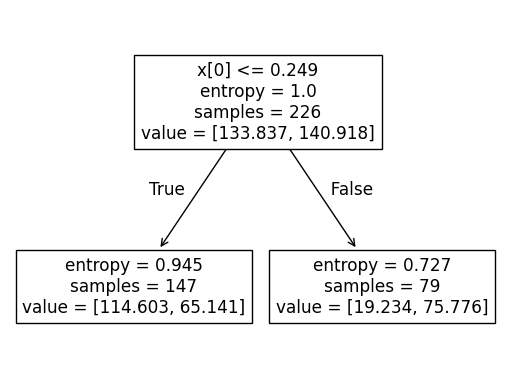

In [4]:
from tf_chpvk_pv.modeling.train import *
from pathlib import Path
from tf_chpvk_pv.config import DATA_DIR, RESULTS_DIR

df_acc_old_path = RESULTS_DIR / 'Ch_weights - tolerance factors accuracy for several operations.csv'

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

features_path = DATA_DIR / 'features_space/features/features/'


#df_acc_old = pd.read_csv(df_acc_old_path)
df_acc_old = pd.DataFrame()
#print(df_acc_old)

tfs = ['t', 'tau', 't_jess']
tf_tresh = [2, 1, 2]
df_acc =pd.DataFrame()
clfs = {}
t_sisso_expressions = {}

for tf, tresh in zip(tfs, tf_tresh):
    df_acc, clf_t = test_tolerance_factor_Ch(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
    clfs[tf] = clf_t

for feat in files:
    #check that the tree file doesn't exist
    idx = int(feat.split('/')[-1].split('.csv')[0].split('_')[-1])

    col = 't_sisso_' + str(idx)
    
    re_do = False

    if col in df_acc_old.columns:
        no_nan_values = df_acc_old[col].isna().sum()
        if no_nan_values == 0:
            print('Tree with operations idx = %s already exists' % str(idx))
            continue
        else:
            print('Tree with operations idx = %s has %s missing values' % (str(idx), no_nan_values))
            re_do = True
    else:
        re_do = True

    if re_do:
        try:
            tf = 't_sisso_' + str(idx)
            df = pd.read_csv(features_path / feat)
            t_sisso_expression = train_tree_sis_features_Ch(features_path / feat)
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
            df_acc, clf_t = test_tolerance_factor_Ch(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=1)
            clfs[tf] = clf_t
        except Exception as e:
            print(e)
            print('Error in %s' % feat)
            break

In [8]:
from tf_chpvk_pv.config import RESULTS_DIR

df_acc_old_path = RESULTS_DIR / 'Ch_weights - tolerance factors accuracy for several operations3-turnley.csv'

if df_acc_old_path.exists():

    df_acc_old = pd.read_csv(df_acc_old_path)
    df_acc_old.set_index('Unnamed: 0', inplace=True)
    df_acc_old.index.name = None

    for col in df_acc.columns:
        if col not in df_acc_old.columns:
            
            df_acc_old[col] = df_acc[col]
        else:
            no_nan_values = df_acc_old[col].isna().sum()
            if no_nan_values > 0:
                df_acc_old[col] = df_acc[col]

    for col in df_acc_old.columns:
        if 'Unnamed' in col:
            df_acc_old.drop(col, axis=1, inplace=True)
    
    df_acc_old.to_csv(df_acc_old_path)

else:
    df_acc.to_csv(df_acc_old_path)

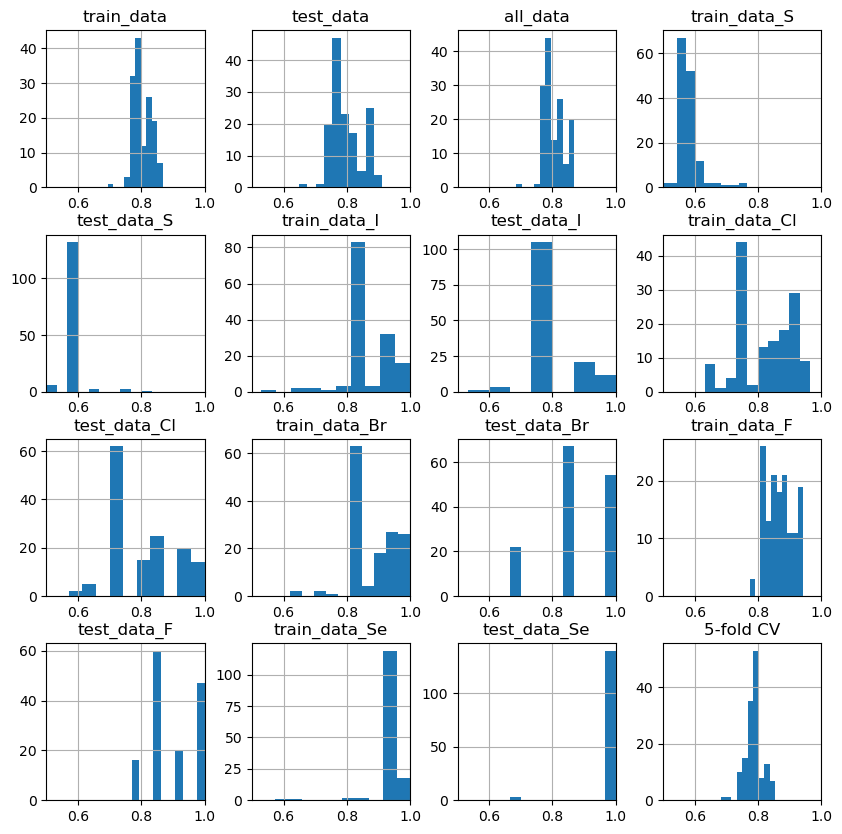

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tf_chpvk_pv.config import RESULTS_DIR

df_acc_old_path = RESULTS_DIR / 'Ch_weights - tolerance factors accuracy for several operations3-turnley.csv'

df = pd.read_csv(df_acc_old_path)
df.set_index('Unnamed: 0', inplace=True)


axs = df[[x for x in df.columns if 't_sisso' in x]].T.hist(figsize=(10, 10))
for ax in axs.flatten():
    ax.set_xlim(0.5, 1)
plt.show()

In [5]:
df[[x for x in df.columns if 't_sisso' in x]].max(axis=1)

Unnamed: 0
train_data       0.867257
test_data        0.912281
all_data         0.869258
train_data_S     0.765957
test_data_S      0.833333
train_data_I     1.000000
test_data_I      1.000000
train_data_Cl    0.964912
test_data_Cl     1.000000
train_data_Br    1.000000
test_data_Br     1.000000
train_data_F     0.943396
test_data_F      1.000000
train_data_Se    1.000000
test_data_Se     1.000000
5-fold CV        0.853623
dtype: float64

In [6]:
df.T.sort_values('test_data', ascending=False).head(20)

Unnamed: 0   train_data  test_data  all_data  train_data_S  test_data_S  \
t_sisso_82     0.853982   0.912281  0.865724      0.574468     0.583333   
t_sisso_14     0.845133   0.894737  0.855124      0.744681     0.750000   
t_sisso_12     0.853982   0.894737  0.862191      0.574468     0.583333   
t_sisso_11     0.845133   0.894737  0.855124      0.595745     0.666667   
t_sisso_67     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_102    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_13     0.827434   0.877193  0.837456      0.574468     0.583333   
t_sisso_16     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_101    0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_93     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_98     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_25     0.840708   0.877193  0.848057      0.595745     0.583333   
t_sisso_97     0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_107    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_52     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_105    0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_87     0.849558   0.877193  0.855124      0.574468     0.583333   
t_sisso_96     0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_106    0.867257   0.877193  0.869258      0.574468     0.583333   
t_sisso_108    0.849558   0.877193  0.855124      0.574468     0.583333   

Unnamed: 0   train_data_I  test_data_I  train_data_Cl  test_data_Cl  \
t_sisso_82       0.970588     1.000000       0.912281      1.000000   
t_sisso_14       0.794118     0.888889       0.912281      0.857143   
t_sisso_12       0.970588     1.000000       0.947368      1.000000   
t_sisso_11       0.823529     0.888889       0.929825      0.928571   
t_sisso_67       0.970588     0.777778       0.947368      1.000000   
t_sisso_102      0.941176     1.000000       0.929825      1.000000   
t_sisso_13       0.882353     0.888889       0.894737      0.928571   
t_sisso_16       0.941176     1.000000       0.929825      1.000000   
t_sisso_101      1.000000     0.888889       0.947368      0.928571   
t_sisso_93       0.941176     1.000000       0.929825      1.000000   
t_sisso_98       0.941176     1.000000       0.929825      1.000000   
t_sisso_25       0.941176     0.777778       0.912281      1.000000   
t_sisso_97       1.000000     0.888889       0.947368      0.928571   
t_sisso_107      0.941176     1.000000       0.929825      1.000000   
t_sisso_52       0.941176     1.000000       0.929825      1.000000   
t_sisso_105      0.941176     1.000000       0.929825      1.000000   
t_sisso_87       0.941176     1.000000       0.929825      1.000000   
t_sisso_96       1.000000     0.888889       0.947368      0.928571   
t_sisso_106      1.000000     0.888889       0.947368      0.928571   
t_sisso_108      0.941176     1.000000       0.929825      1.000000   

Unnamed: 0   train_data_Br  test_data_Br  train_data_F  test_data_F  \
t_sisso_82        1.000000           1.0      0.886792     1.000000   
t_sisso_14        1.000000           1.0      0.849057     1.000000   
t_sisso_12        0.952381           1.0      0.867925     0.923077   
t_sisso_11        0.952381           1.0      0.905660     1.000000   
t_sisso_67        1.000000           1.0      0.830189     1.000000   
t_sisso_102       1.000000           1.0      0.867925     0.846154   
t_sisso_13        1.000000           1.0      0.849057     1.000000   
t_sisso_16        1.000000           1.0      0.867925     0.846154   
t_sisso_101       0.952381           1.0      0.886792     1.000000   
t_sisso_93        1.000000           1.0      0.867925     0.846154   
t_sisso_98        1.000000           1.0      0.867925     0.846154   
t_sisso_25        1.000000           1.0      0.830189     1.000000   
t_sisso_9

In [7]:
df.T.sort_values('test_data_S', ascending=False).head(5)

Unnamed: 0  train_data  test_data  all_data  train_data_S  test_data_S  \
t_sisso_88    0.805310   0.754386  0.795053      0.638298     0.833333   
t_sisso_14    0.845133   0.894737  0.855124      0.744681     0.750000   
t_sisso_17    0.774336   0.789474  0.777385      0.702128     0.750000   
t_sisso_11    0.845133   0.894737  0.855124      0.595745     0.666667   
t_jess        0.743363   0.701754  0.734982      0.829787     0.666667   

Unnamed: 0  train_data_I  test_data_I  train_data_Cl  test_data_Cl  \
t_sisso_88      0.911765     0.666667       0.771930      0.571429   
t_sisso_14      0.794118     0.888889       0.912281      0.857143   
t_sisso_17      0.705882     0.777778       0.824561      0.642857   
t_sisso_11      0.823529     0.888889       0.929825      0.928571   
t_jess          0.676471     0.888889       0.701754      0.571429   

Unnamed: 0  train_data_Br  test_data_Br  train_data_F  test_data_F  \
t_sisso_88       0.857143      0.666667      0.849057     0.923077   
t_sisso_14       1.000000      1.000000      0.849057     1.000000   
t_sisso_17       0.714286      0.833333      0.830189     0.923077   
t_sisso_11       0.952381      1.000000      0.905660     1.000000   
t_jess           0.761905      0.666667      0.792453     0.846154   

Unnamed: 0  train_data_Se  test_data_Se  5-fold CV  
t_sisso_88       1.000000      1.000000   0.783092  
t_sisso_14       0.785714      1.000000   0.827246  
t_sisso_17       0.857143      1.000000   0.751981  
t_sisso_11       1.000000      1.000000   0.818357  
t_jess           0.571429      0.333333   0.725507

In [8]:
top_S_t_sisso = df.T.sort_values('test_data_S', ascending=False).head(5).index

In [9]:
df.T[df.T['test_data'] >= 0.89]

Unnamed: 0  train_data  test_data  all_data  train_data_S  test_data_S  \
t_sisso_14    0.845133   0.894737  0.855124      0.744681     0.750000   
t_sisso_82    0.853982   0.912281  0.865724      0.574468     0.583333   
t_sisso_11    0.845133   0.894737  0.855124      0.595745     0.666667   
t_sisso_12    0.853982   0.894737  0.862191      0.574468     0.583333   

Unnamed: 0  train_data_I  test_data_I  train_data_Cl  test_data_Cl  \
t_sisso_14      0.794118     0.888889       0.912281      0.857143   
t_sisso_82      0.970588     1.000000       0.912281      1.000000   
t_sisso_11      0.823529     0.888889       0.929825      0.928571   
t_sisso_12      0.970588     1.000000       0.947368      1.000000   

Unnamed: 0  train_data_Br  test_data_Br  train_data_F  test_data_F  \
t_sisso_14       1.000000           1.0      0.849057     1.000000   
t_sisso_82       1.000000           1.0      0.886792     1.000000   
t_sisso_11       0.952381           1.0      0.905660     1.000000   
t_sisso_12       0.952381           1.0      0.867925     0.923077   

Unnamed: 0  train_data_Se  test_data_Se  5-fold CV  
t_sisso_14       0.785714           1.0   0.827246  
t_sisso_82       0.928571           1.0   0.831498  
t_sisso_11       1.000000           1.0   0.818357  
t_sisso_12       0.928571           1.0   0.840580

In [10]:
top_t_sisso = df.T[df.T['test_data'] >= 0.89].index.values

In [11]:
top_t_sisso

array(['t_sisso_14', 't_sisso_82', 't_sisso_11', 't_sisso_12'],
      dtype=object)

In [20]:
from tf_chpvk_pv.config import DATA_DIR, INTERIM_DATA_DIR
from tf_chpvk_pv.modeling.train import test_tolerance_factor_Ch, evaluate_t_sisso, train_tree_sis_features_Ch
import pickle

features_path = DATA_DIR / 'features_space/3 ops/features/'

tfs = ['t', 'tau', 't_jess'] + top_t_sisso.tolist() + top_S_t_sisso.tolist()
tf_tresh = [2, 1, 2] + [1]*( top_t_sisso.shape[0] + top_S_t_sisso.shape[0])
df_acc =pd.DataFrame()
clfs = {}

tolerance_factor_path = INTERIM_DATA_DIR / 'ch_tolerance_factors_ops3 - turnley.pkl'

if tolerance_factor_path.exists():
    with open(tolerance_factor_path, 'rb') as file:
        tolerance_factor_dict_global = pickle.load(file)
else:
    tolerance_factor_dict_global = {}

print(tolerance_factor_dict_global)

train_df_global = train_df.copy()
test_df_global = test_df.copy()

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

for tf, tresh in zip(tfs, tf_tresh):

    if tf not in tolerance_factor_dict_global.keys():
        
        if 'sisso' in tf:
            idx = int(tf.split('_')[-1])
            t_sisso_expression = train_tree_sis_features_Ch(features_path / ('features_sisso_' + str(idx) + '.csv'))
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
        df_acc, clf_t = test_tolerance_factor_Ch(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
        for key in tolerance_factor_dict.keys():
            if key not in tolerance_factor_dict_global.keys():
                tolerance_factor_dict_global[key] = tolerance_factor_dict[key]
        for col in train_df.columns:
            if col not in train_df_global.columns:
                train_df_global[col] = train_df[col]
                print('Adding column %s to train_df_global' % col)
            if col not in test_df_global.columns:
                test_df_global[col] = test_df[col]
        clfs[tf] = clf_t
    else:
        
        if 'sisso' in tf:
            idx = int(tf.split('_')[-1])
            t_sisso_expression = tolerance_factor_dict_global[tf][0]
            #print('Using existing tree for %s' % tf)
            print(t_sisso_expression)
            train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression, idx)
            #print(train_df.columns)
            for col in train_df.columns:
                if col not in train_df_global.columns:
                    train_df_global[col] = train_df[col]
                    print('Adding column %s to train_df_global' % col)
                if col not in test_df_global.columns:
                    test_df_global[col] = test_df[col]
            #clfs[tf] = clf_t


with open(tolerance_factor_path, 'wb') as file:
    pickle.dump(tolerance_factor_dict_global, file)

train_df = train_df_global
test_df = test_df_global

{'t': ['(rA+rX)/(1.41421*(rB+rX))', [np.float64(0.8512169420719147), np.float64(0.9531176090240479)]], 'tau': ['rX/rB-nA*(nA-rA_rB_ratio/log(rA_rB_ratio))', 4.18], 't_jess': ['chi_AX_ratio * (rA+rX)/(1.41421*chi_BX_ratio*(rB+rX))'], 't_sisso_14': ['abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3))', np.float64(0.8455010652542114)], 't_sisso_82': ['abs(abs((rA_rX_ratio * rB_rX_ratio) - exp(rB_rX_ratio)) - abs(abs(rB_rX_ratio - log_rA_rB_ratio) - rA_rX_ratio))', np.float64(0.4960701912641525)], 't_sisso_11': ['(abs((rB_rX_ratio + chi_BX_ratio) - exp(rB_rX_ratio)) + abs(abs(rB_rX_ratio - log_rA_rB_ratio) - (chi_BX_ratio + log_rA_rB_ratio)))', np.float64(1.5565980076789856)], 't_sisso_12': ['abs(((1.0 / rA_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - abs(abs(rB_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio + log_rA_rB_ratio)))', np.float64(0.4098380506038666)], 't_sisso_88': ['abs(abs(abs(rB_rX_ratio - log_rA_rB_ratio) - exp(chi_BX_ratio)) - abs((

In [13]:
for t in tolerance_factor_dict_global.keys():
    try:
        th = tolerance_factor_dict_global[t][1]
        exp = tolerance_factor_dict_global[t][0]
        print(t, exp, th)
    except:
        continue

t (rA+rX)/(1.41421*(rB+rX)) [np.float64(0.8512169420719147), np.float64(0.9531176090240479)]
tau rX/rB-nA*(nA-rA_rB_ratio/log(rA_rB_ratio)) 4.18
t_sisso_14 abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3)) 0.8455010652542114
t_sisso_82 abs(abs((rA_rX_ratio * rB_rX_ratio) - exp(rB_rX_ratio)) - abs(abs(rB_rX_ratio - log_rA_rB_ratio) - rA_rX_ratio)) 0.4960701912641525
t_sisso_11 (abs((rB_rX_ratio + chi_BX_ratio) - exp(rB_rX_ratio)) + abs(abs(rB_rX_ratio - log_rA_rB_ratio) - (chi_BX_ratio + log_rA_rB_ratio))) 1.5565980076789856
t_sisso_12 abs(((1.0 / rA_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - abs(abs(rB_rX_ratio - log_rA_rB_ratio) - (rB_rX_ratio + log_rA_rB_ratio))) 0.4098380506038666
t_sisso_88 abs(abs(abs(rB_rX_ratio - log_rA_rB_ratio) - exp(chi_BX_ratio)) - abs((log_rA_rB_ratio / chi_BX_ratio) - chi_diff)) 1.4989474415779114
t_sisso_17 (((rB_rX_ratio / chi_BX_ratio) + (rB_rX_ratio * chi_BX_ratio)) / ((rA_rX_ratio / chi_BX_ratio) + (rA_r

t_sisso_14
2025-08-04 23:58:16.621 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-08-04 23:58:16.687 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.
2025-08-04 23:58:16.729 | INFO     | tf_chpvk_pv.plots:platt_scaling_plot:53 - Generating Platt Scaling plot from data...
2025-08-04 23:58:17.804 | SUCCESS  | tf_chpvk_pv.plots:platt_scaling_plot:70 - Plot generation complete.
t_sisso_82
2025-08-04 23:58:17.805 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-08-04 23:58:17.933 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.
2025-08-04 23:58:17.969 | INFO     | tf_chpvk_pv.plots:platt_scaling_plot:53 - Generating Platt Scaling plot from data...
2025-08-04 23:58:19.045 | SUCCESS  | tf_chpvk_pv.plots:platt_scaling_plot:70 - Plot generation complete.
t_sisso_11
2025-08-04 23:5

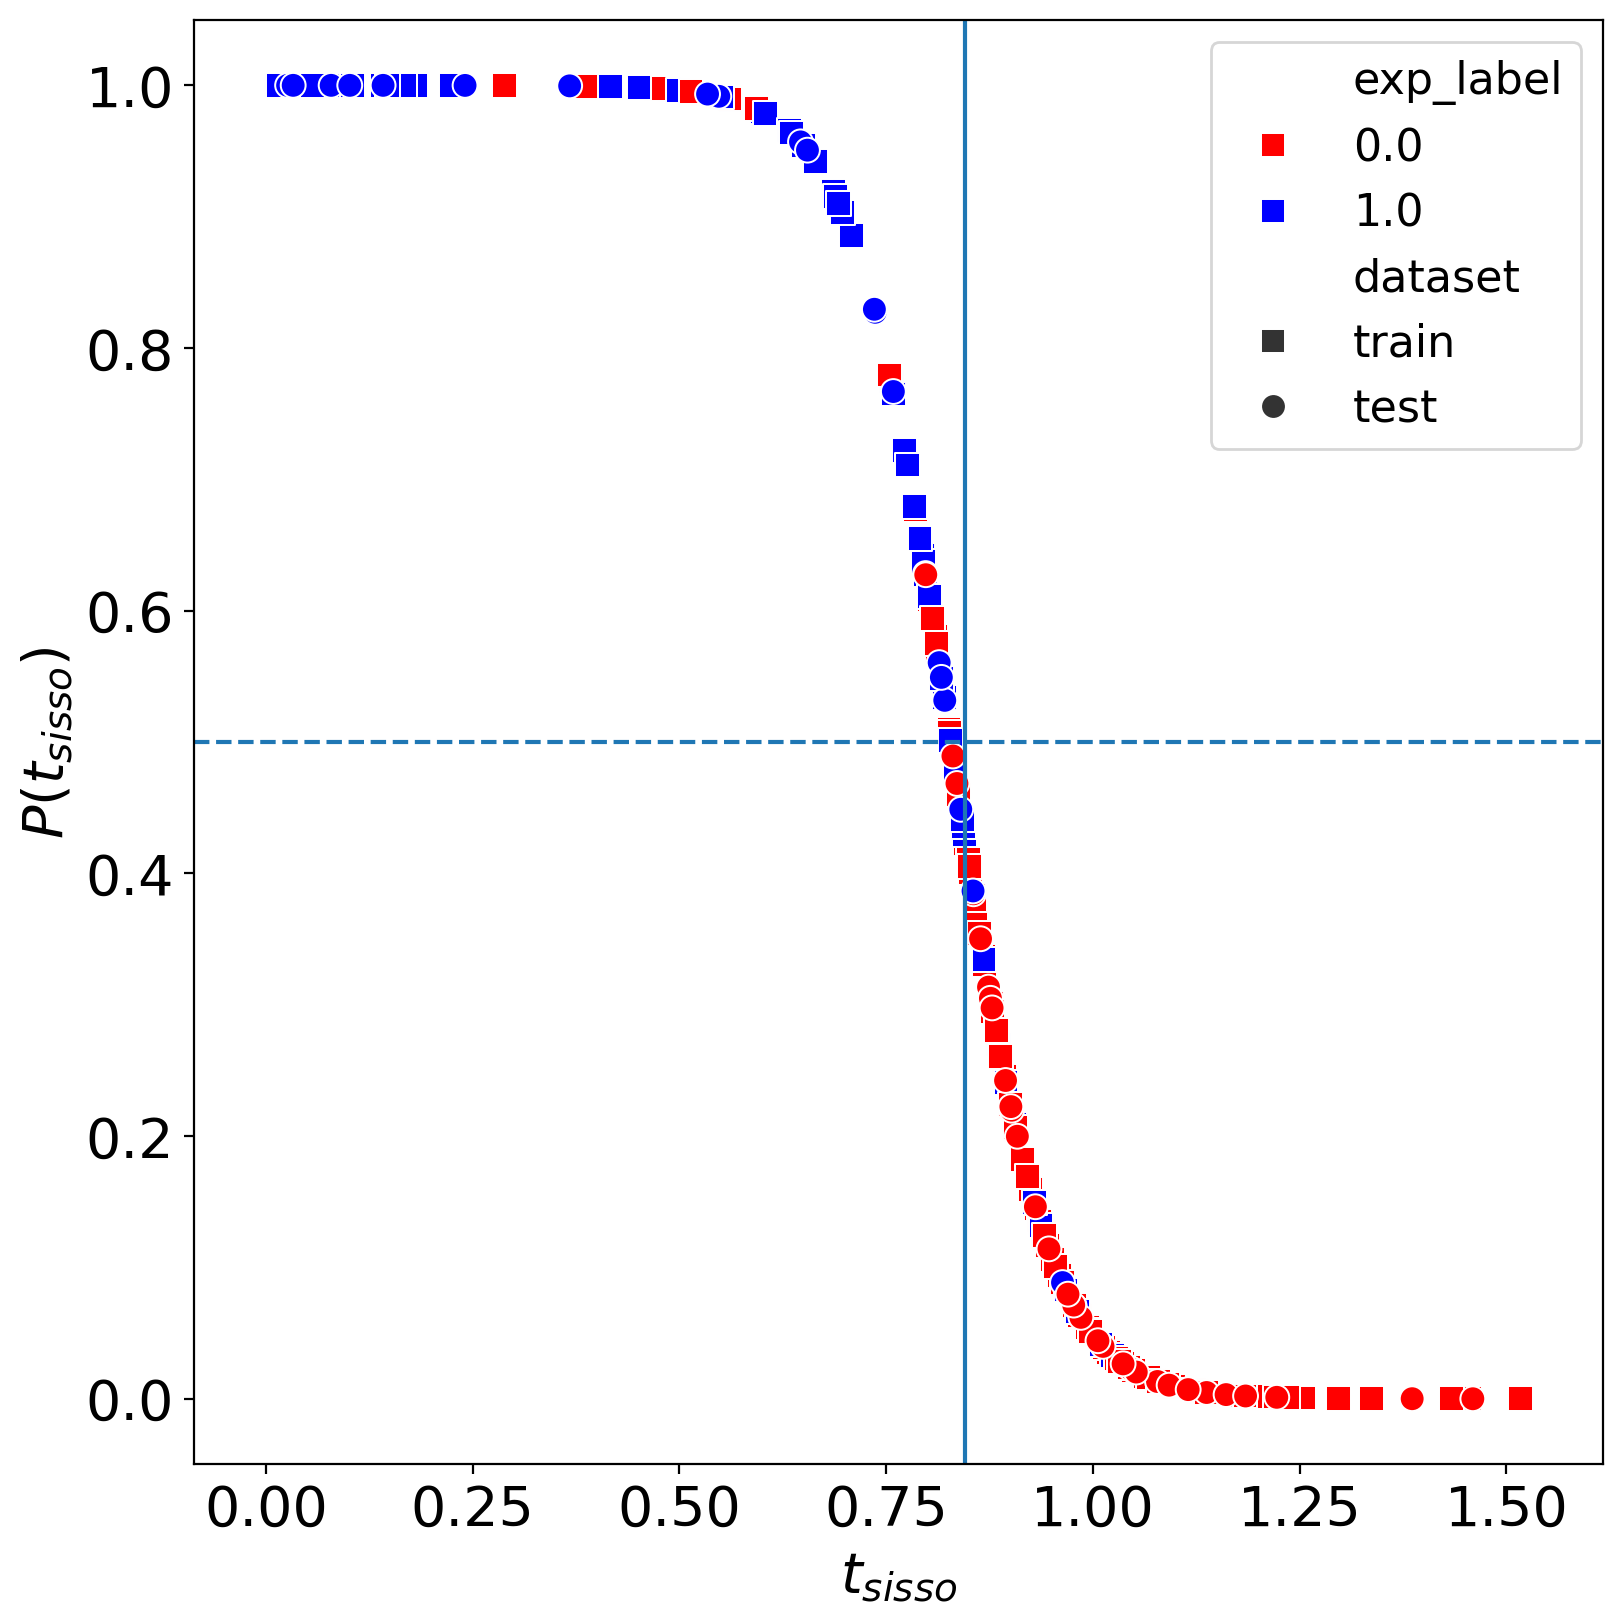

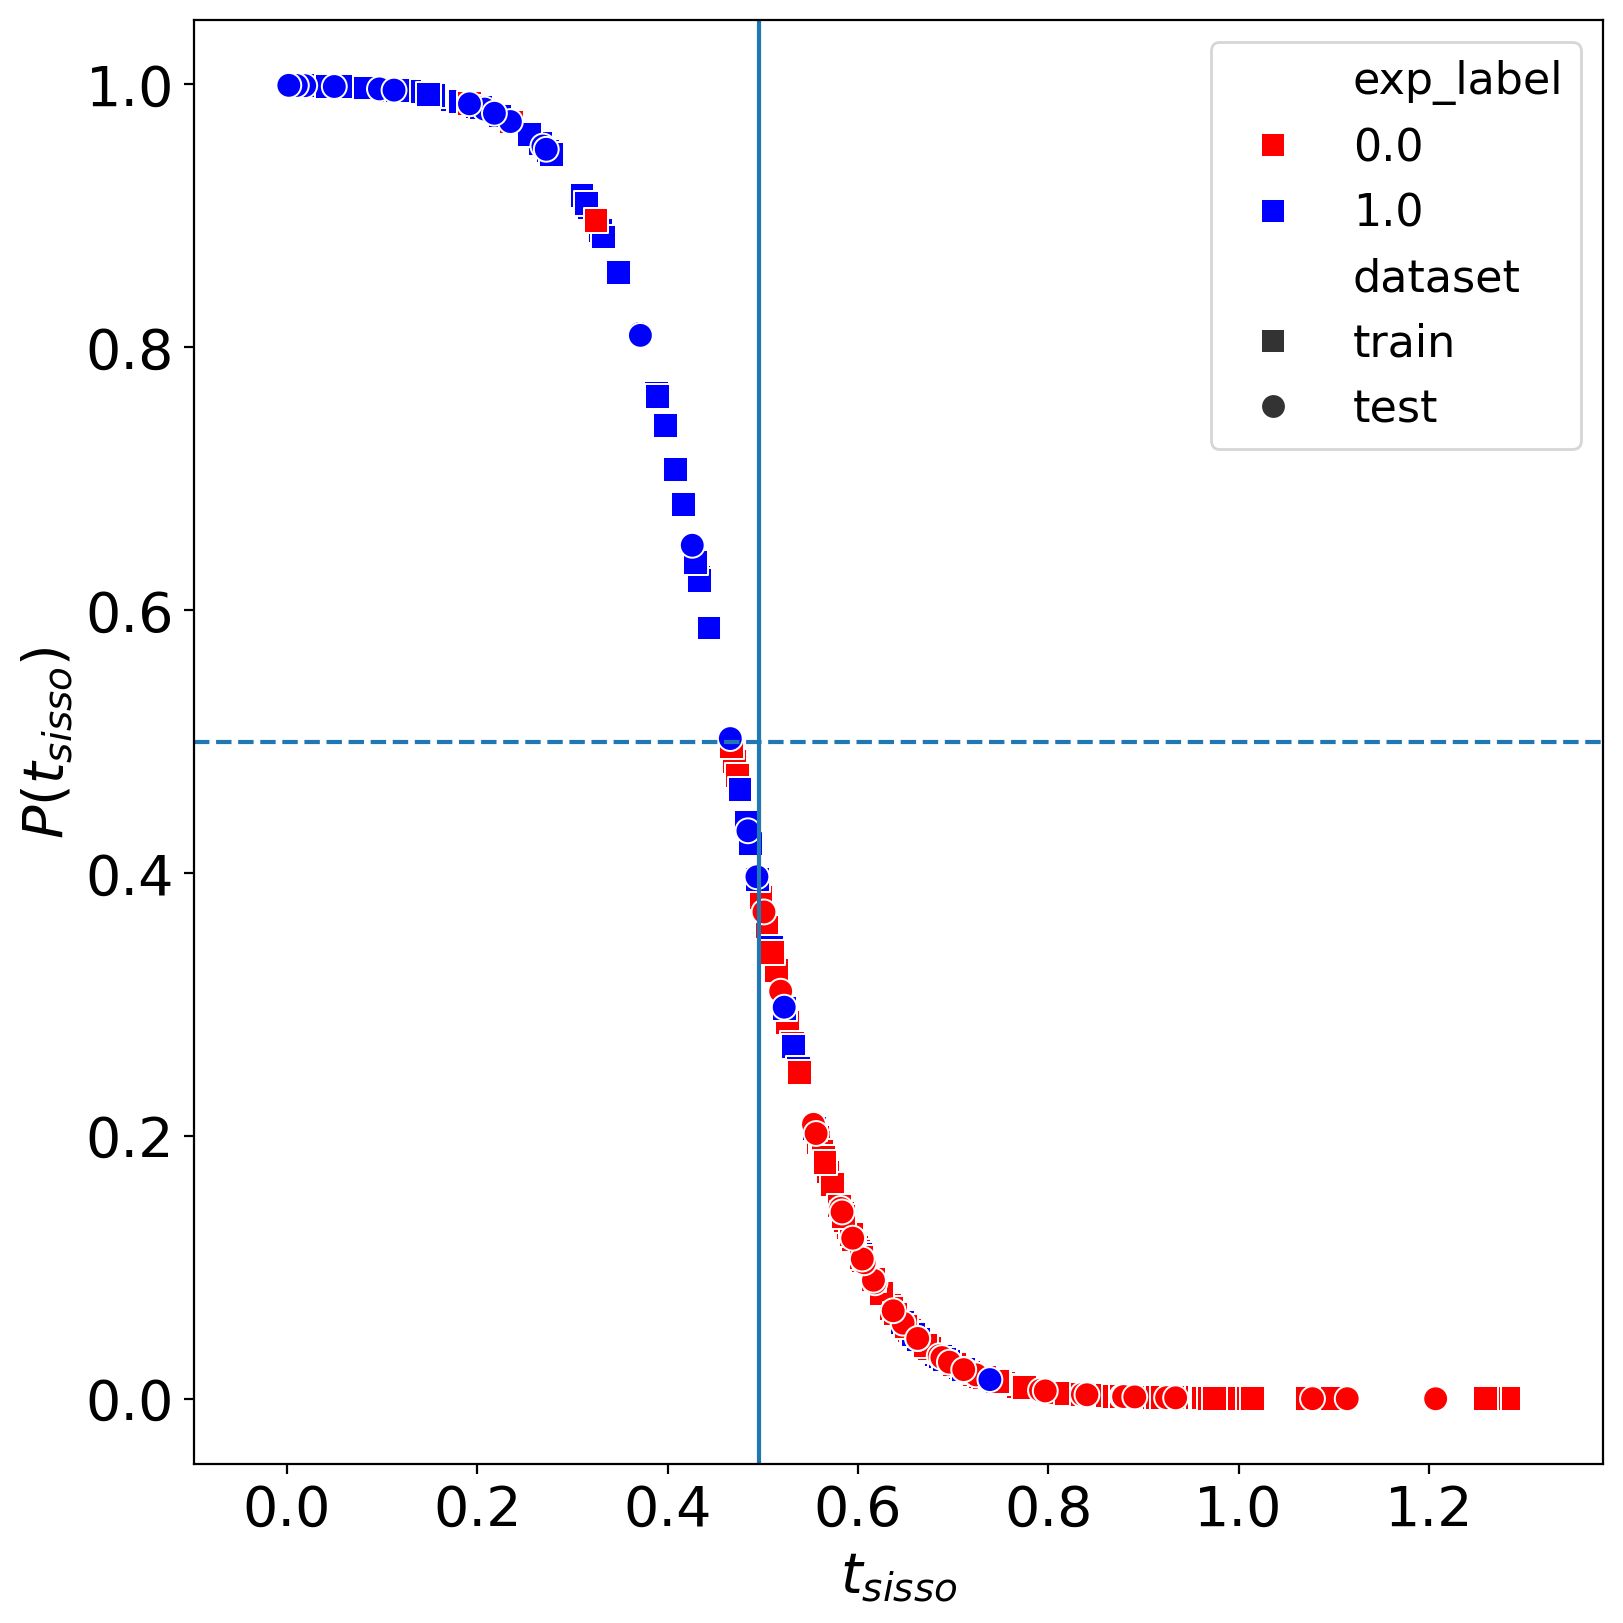

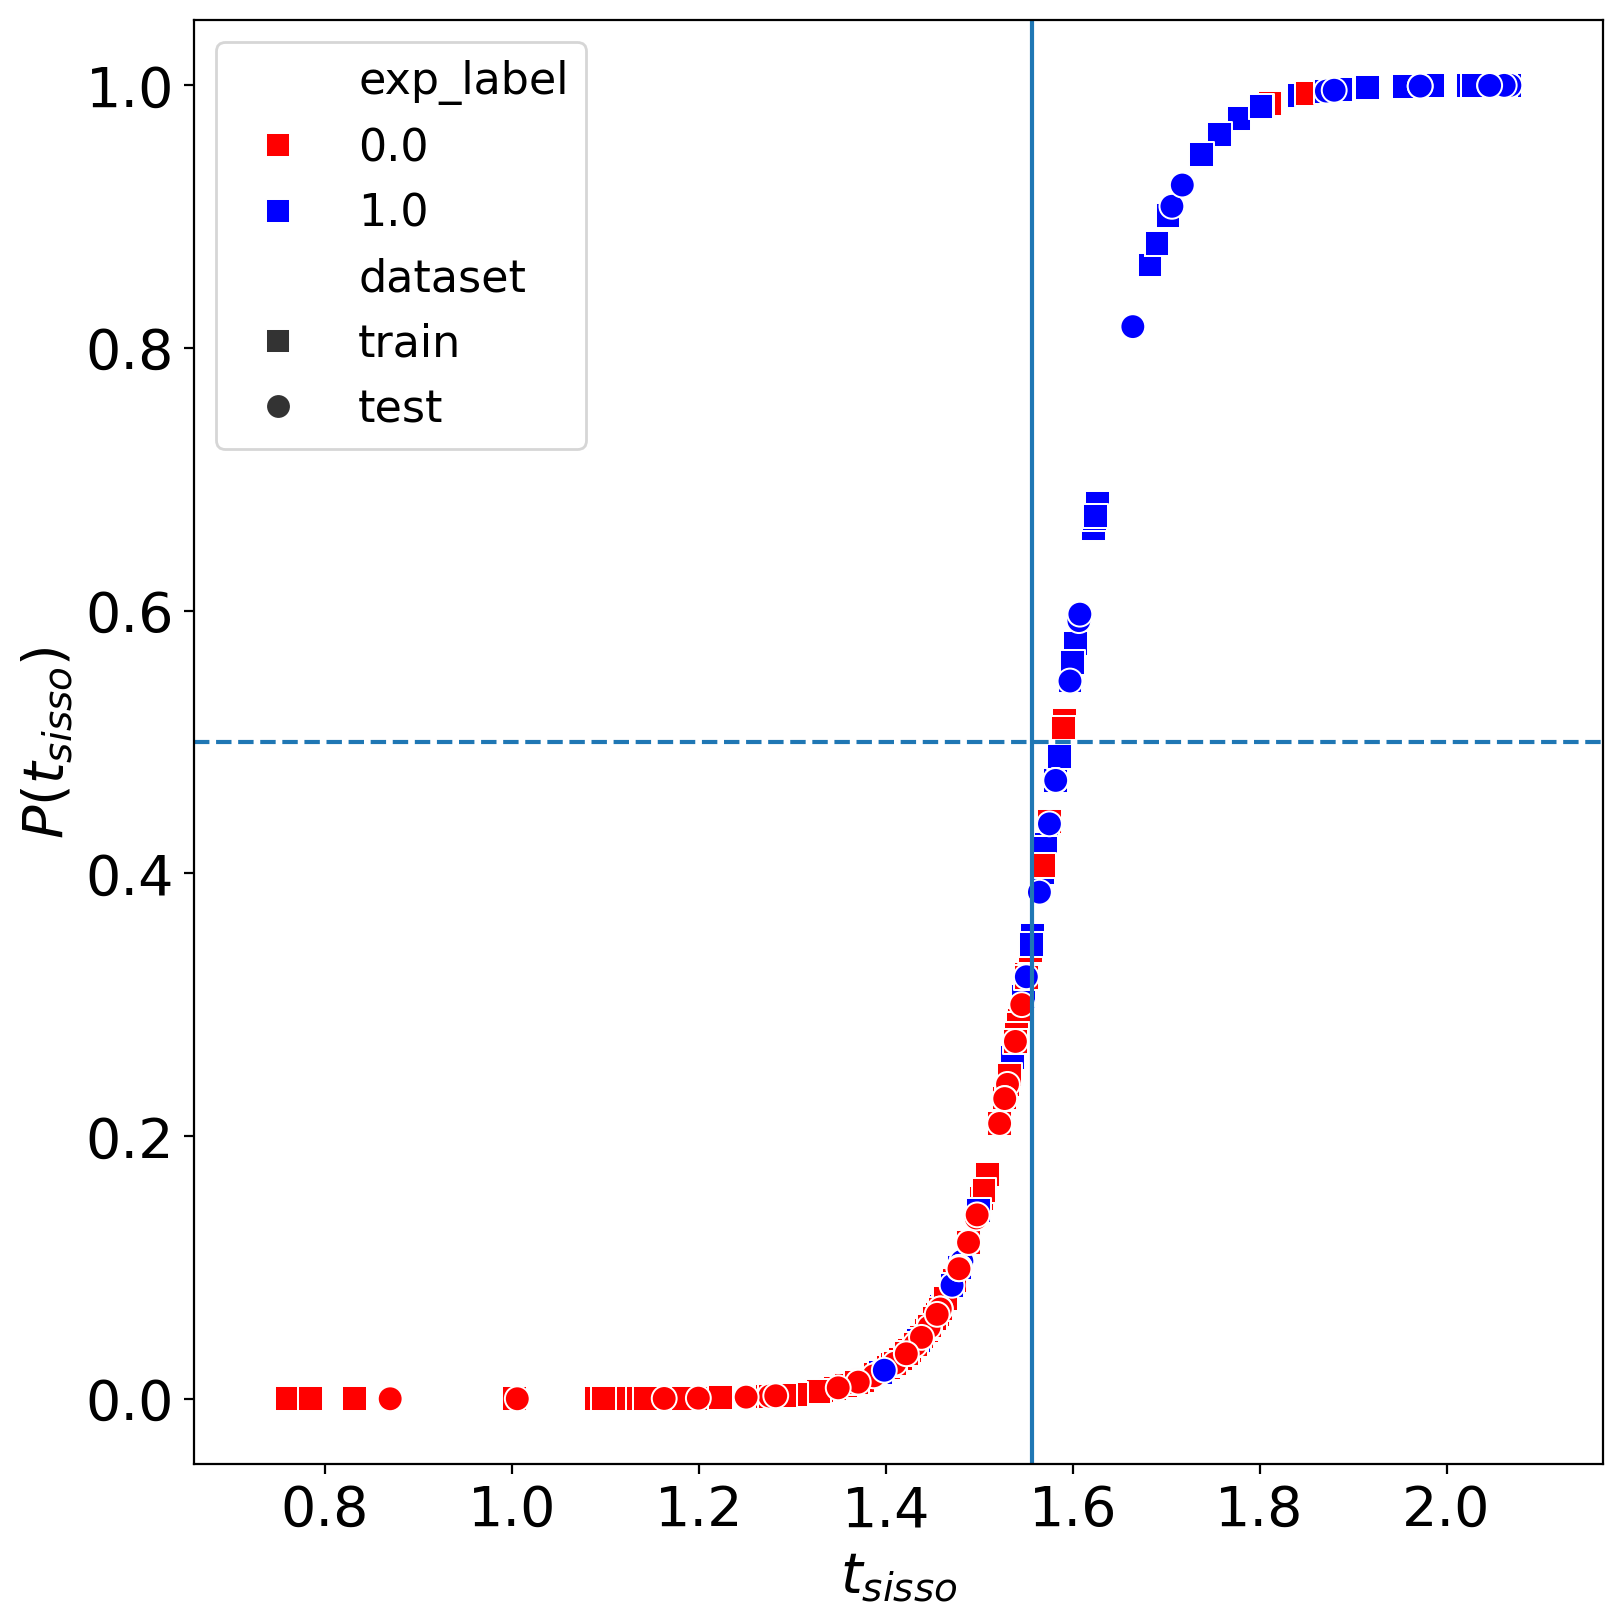

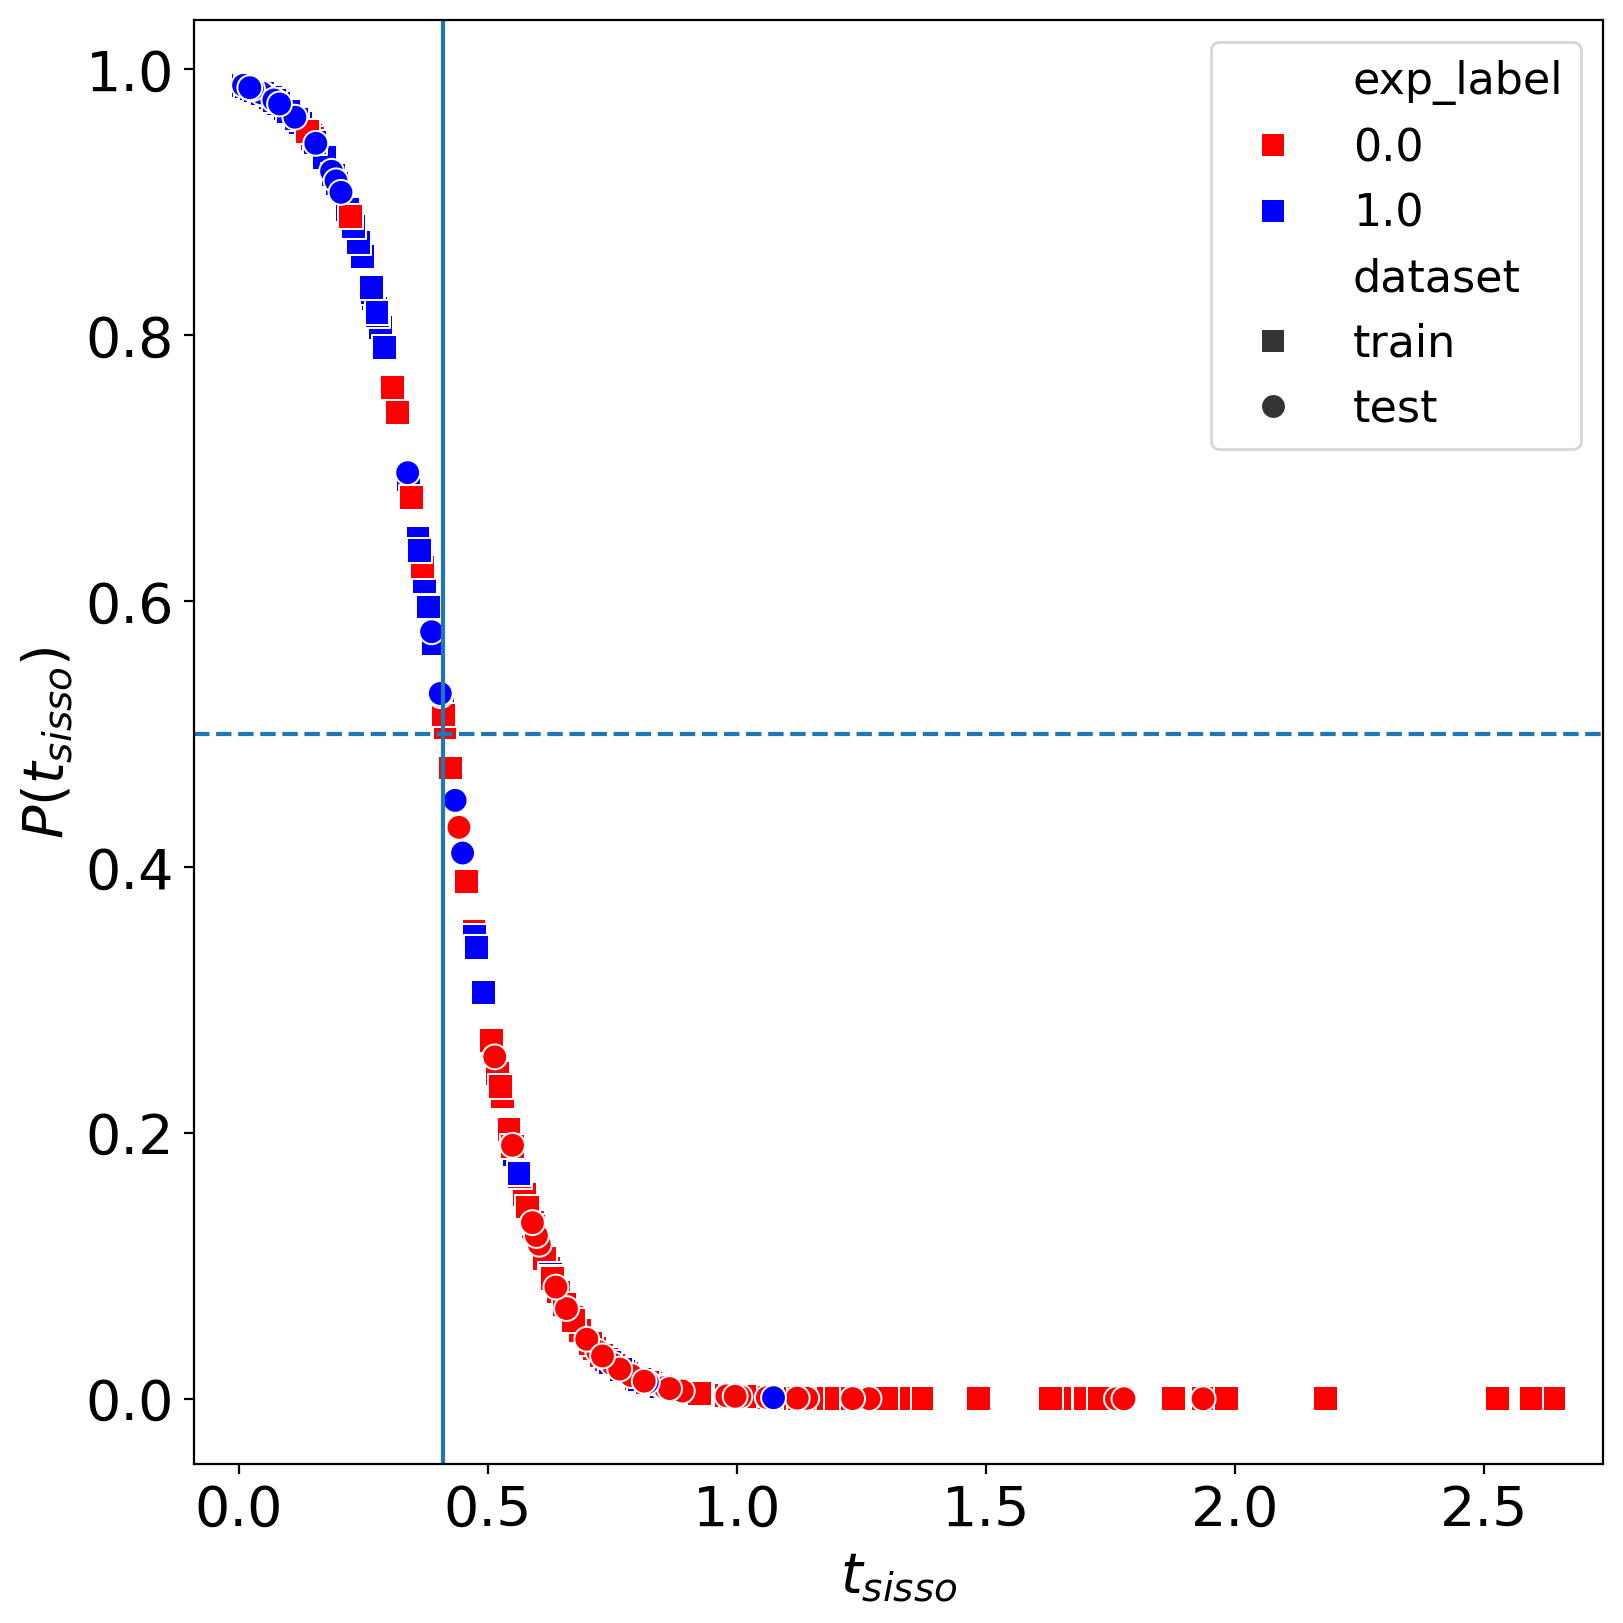

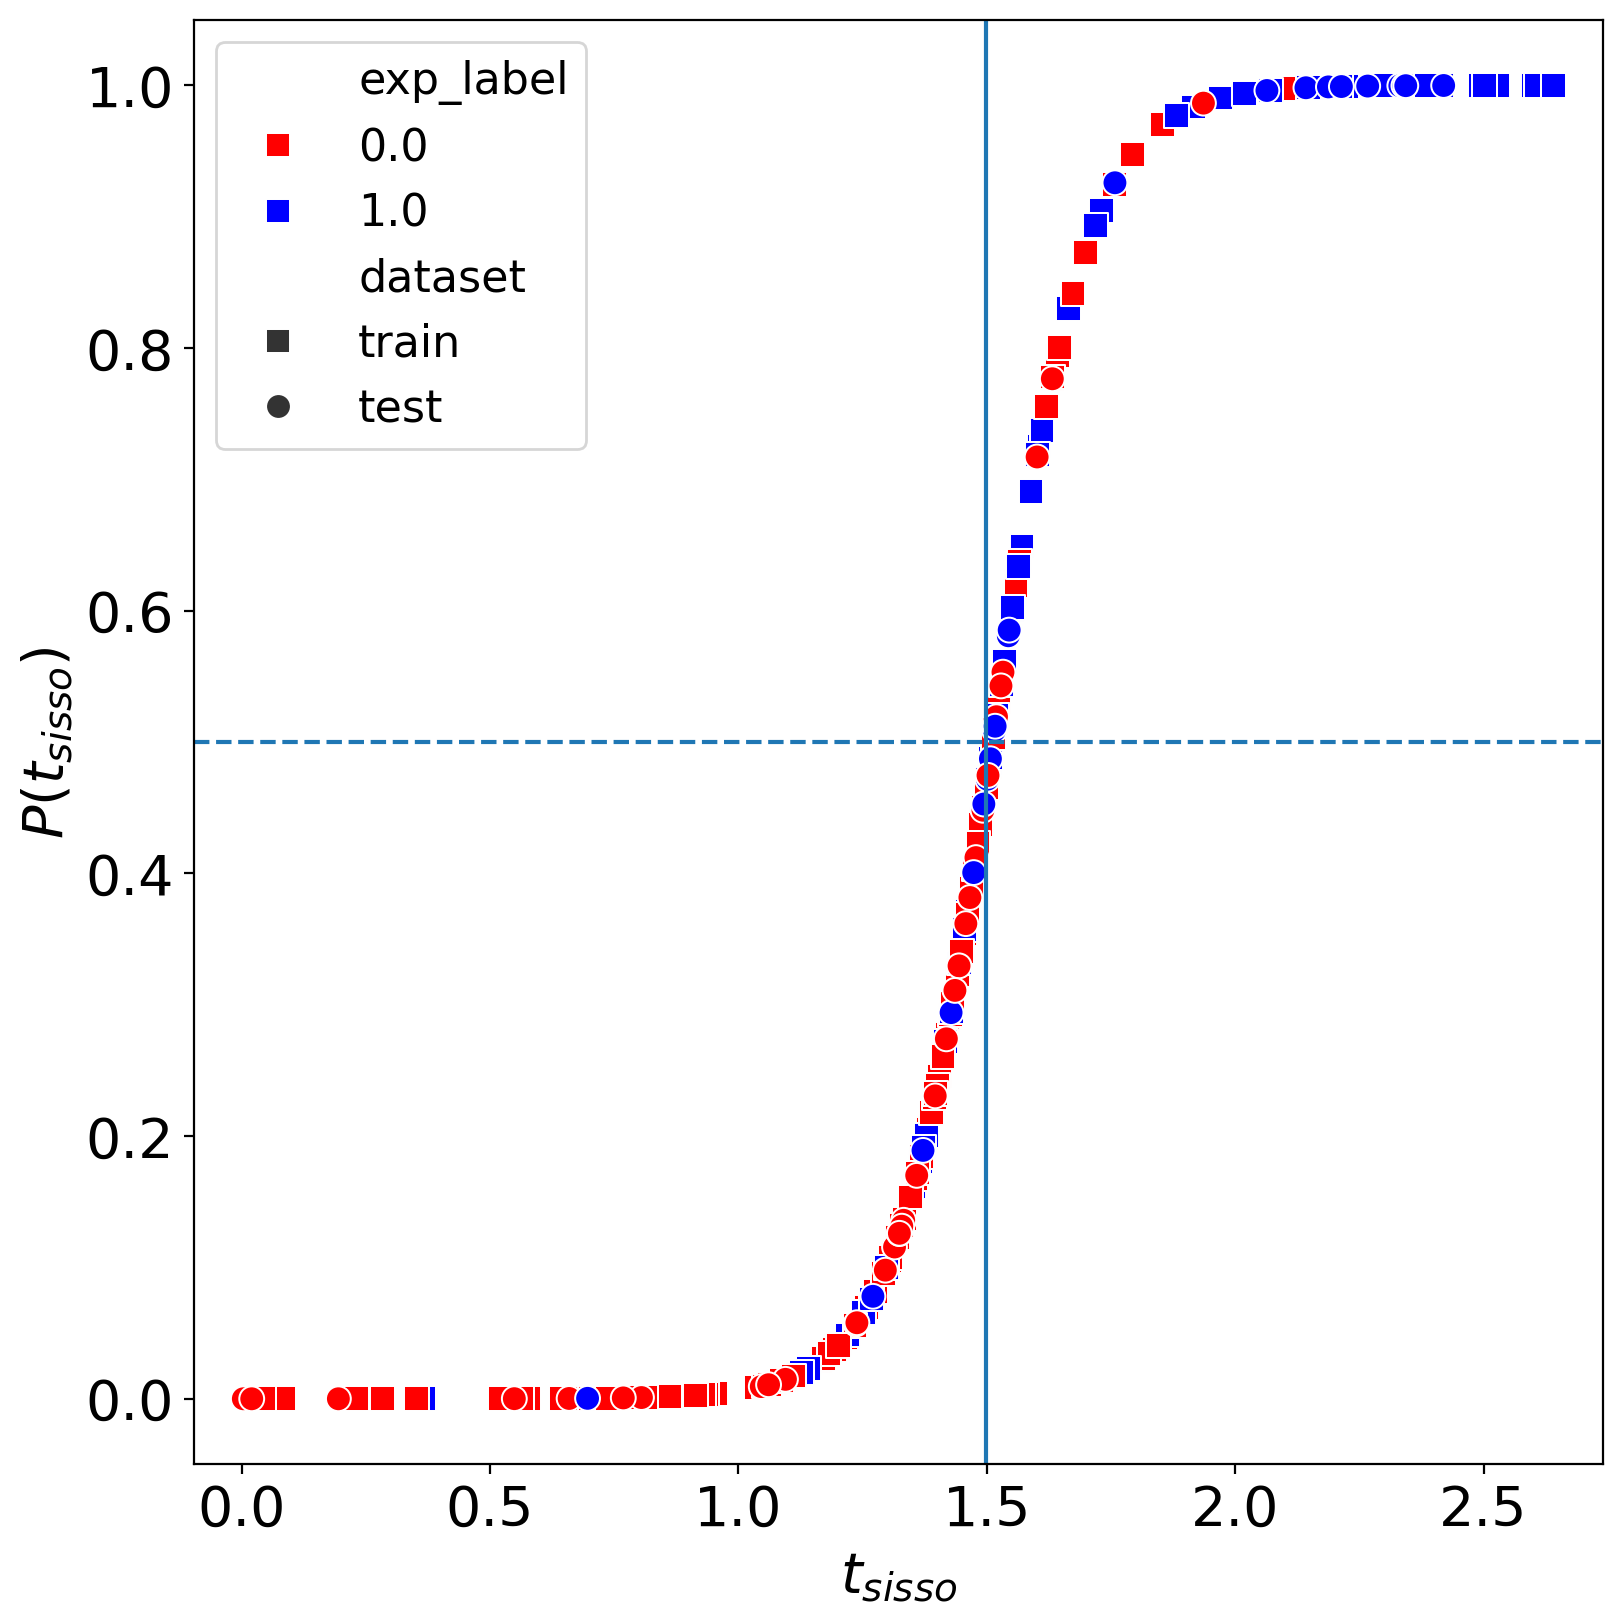

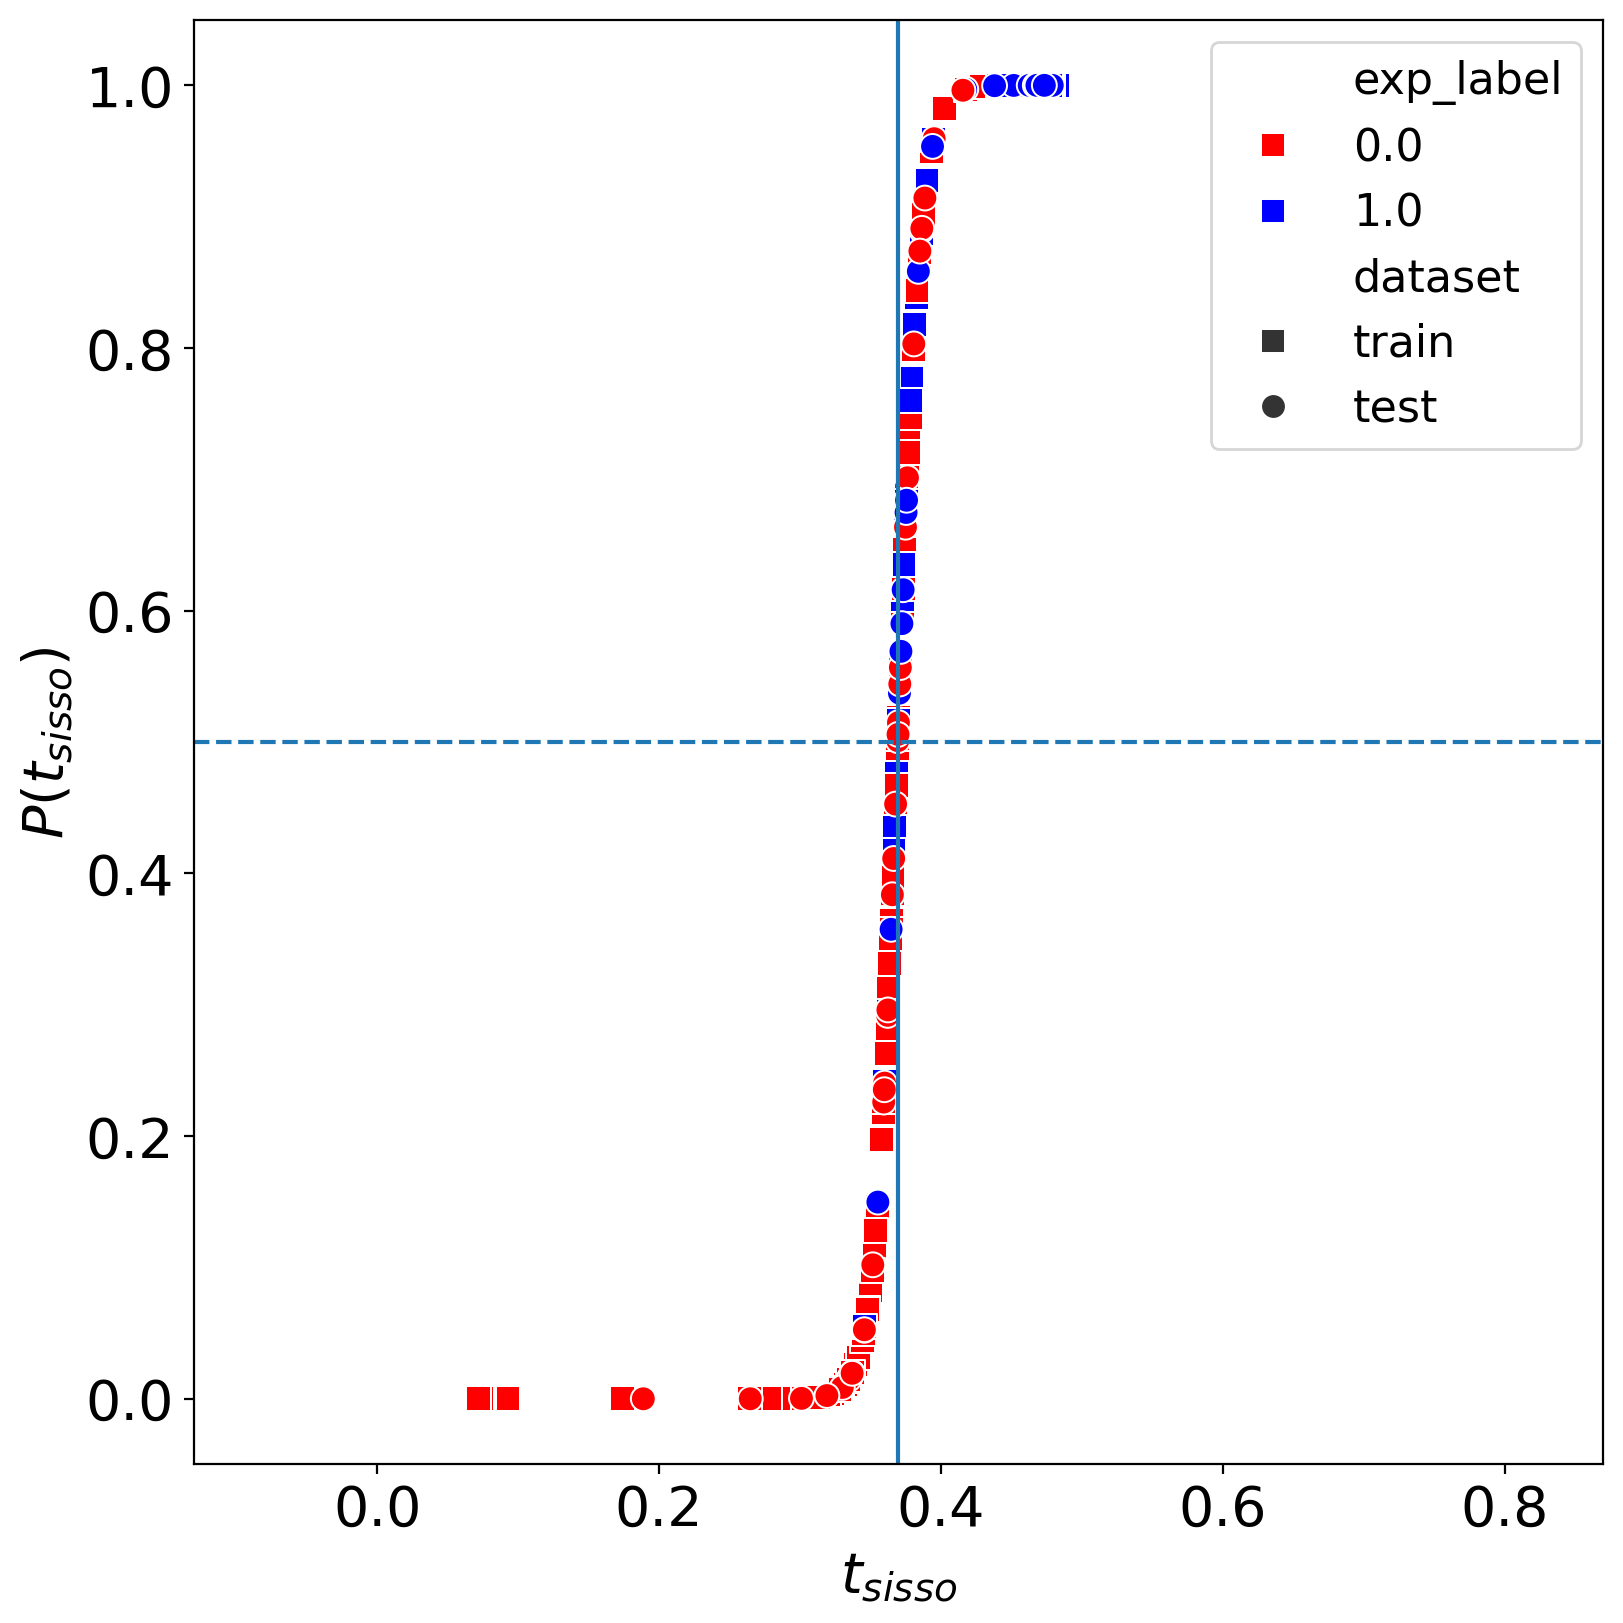

In [29]:
from tf_chpvk_pv.plots import platt_scaling_plot
from tf_chpvk_pv.config import RESULTS_DIR, INTERIM_DATA_DIR, FIGURES_DIR
import os

from tf_chpvk_pv.modeling.train import train_platt_scaling

clf2_platt_path = INTERIM_DATA_DIR / 'Ch_clf2_platt3-turnley.pkl'

clf2_platt = {}

for t in tolerance_factor_dict_global.keys():
    if 'sisso' in t:
        idx = int(t.split('_')[-1])
        print(t)
        try:
            train_df, test_df, clf2_sisso = train_platt_scaling(train_df, test_df, clf_t=clfs[t], t=t,)
            clf2_platt[t] = clf2_sisso

            train_input_path = RESULTS_DIR / 'processed_chpvk_train_dataset.csv'
            test_input_path = RESULTS_DIR / 'processed_chpvk_test_dataset.csv'
            concat_input_path = RESULTS_DIR / 'processed_chpvk_concat_dataset.csv'
            if concat_input_path.exists():
                os.remove(concat_input_path)
            tolerance_dict_path = INTERIM_DATA_DIR / 'ch_tolerance_factors_ops3 - turnley.pkl'
            txt_output = 'ch_diff_ops3-turnley_platt_scaling_plot_t_sisso_' + str(idx) + '.png'
            output_path = FIGURES_DIR / txt_output

            platt_scaling_plot(t, train_input_path, test_input_path,concat_input_path, tolerance_dict_path, output_path)
        except Exception as e:
            print(f"Error occurred while processing {t}: {e}")
            continue

with open(clf2_platt_path, 'wb') as file:
    pickle.dump(clf2_platt, file)

In [22]:
test_idx = [x for x in df.index if 'test' in x]
tfs_ = ['t', 'tau', 't_jess'] + top_t_sisso.tolist() + top_S_t_sisso.tolist()
display(df.loc[test_idx, tfs_])

t       tau    t_jess  t_sisso_14  t_sisso_82  \
Unnamed: 0                                                           
test_data     0.596491  0.719298  0.701754    0.894737    0.912281   
test_data_S   0.583333  0.416667  0.666667    0.750000    0.583333   
test_data_I   0.555556  0.777778  0.888889    0.888889    1.000000   
test_data_Cl  0.642857  0.928571  0.571429    0.857143    1.000000   
test_data_Br  0.666667  0.500000  0.666667    1.000000    1.000000   
test_data_F   0.615385  1.000000  0.846154    1.000000    1.000000   
test_data_Se  0.333333  0.000000  0.333333    1.000000    1.000000   

              t_sisso_11  t_sisso_12  t_sisso_88  t_sisso_14  t_sisso_17  \
Unnamed: 0                                                                 
test_data       0.894737    0.894737    0.754386    0.894737    0.789474   
test_data_S     0.666667    0.583333    0.833333    0.750000    0.750000   
test_data_I     0.888889    1.000000    0.666667    0.888889    0.777778   
test_data_Cl    0.928571    1.000000    0.571429    0.857143    0.642857   
test_data_Br    1.000000    1.000000    0.666667    1.000000    0.833333   
test_data_F     1.000000    0.923077    0.923077    1.000000    0.923077   
test_data_Se    1.000000    1.000000    1.000000    1.000000    1.000000   

              t_sisso_11    t_jess  
Unnamed: 0                          
test_data       0.894737  0.701754  
test_data_S     0.666667  0.666667  
test_data_I     0.888889  0.888889  
test_data_Cl    0.928571  0.571429  
test_data_Br    1.000000  0.666667  
test_data_F     1.000000  0.846154  
test_data_Se    1.000000  0.333333

In [1]:
from tf_chpvk_pv.dataset import generate_compositions
from tf_chpvk_pv.modeling.predict import check_stable_compositions
from tf_chpvk_pv.config import INTERIM_DATA_DIR

new_tolerance_dict_path = INTERIM_DATA_DIR / 'ch_tolerance_factors_ops3 - turnley.pkl'

element_selection_A = ["Ba", "Eu", "Pb", "Sr", "Ca", "Sn", "Cd", "Cu", "Mg",
                      "Zn", "Ge", "La", "Pr", "Ce", "Nd", "Yb", "Gd", "Sm", "Y",
                      "Dy", "Ho", "Er", "Tm", "Lu", "Sc", "Tl", "Bi"]

elements_selection_B = ["Si", "Ge", "V", "Rh", "Ti", "Ru", "Mo", "Ta", "Nb", "Hf",
                        "Zr", "Tb", "Pt", "Ce", "U", "Pd", "Ni", "Co", "Ga", "Al",
                        "Fe", "Cr", "In", "Mn", "Sc", "Lu", "Tm", "Er", "Ho", "Y",
                        "Yb"]


elements_selection = element_selection_A + elements_selection_B

possible_oxidation_states = [2.0, 3.0, 4.0] #3, 4] #for A and B elements

df_generated_comp = generate_compositions(elements_selection, 
                                          possible_oxidation_states, 
                                          dict_tol_factors_path=new_tolerance_dict_path,
                                          use_turnley_radii=True).dropna()

2025-08-06 20:06:31.114 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


2025-08-06 20:06:31.917 | INFO     | tf_chpvk_pv.dataset:generate_compositions:298 - Generating valid compositions...
Invalid composition: CuBiS3
Invalid composition: CuBiSe3
Invalid composition: VCuS3
Invalid composition: VCuSe3
Invalid composition: CuRuS3
Invalid composition: CuRuSe3
Invalid composition: CuMoS3
Invalid composition: CuMoSe3
Invalid composition: TaCuS3
Invalid composition: TaCuSe3
Invalid composition: NbCuS3
Invalid composition: NbCuSe3
Invalid composition: CrCuS3
Invalid composition: CrCuSe3
Invalid composition: TlVS3
Invalid composition: TlVSe3
Invalid composition: TlRuS3
Invalid composition: TlRuSe3
Invalid composition: TlMoS3
Invalid composition: TlMoSe3
Invalid composition: TaTlS3
Invalid composition: TaTlSe3
Invalid composition: NbTlS3
Invalid composition: NbTlSe3
Invalid composition: UTlS3
Invalid composition: UTlSe3
Invalid composition: TlCrS3
Invalid composition: TlCrSe3
Invalid composition: TaNiS3
Invalid composition: TaNiSe3
Invalid composition: TaCoS3
Inval

According to t_sisso_55, 123 (10.585197934595525%) compositions are predicted to be stable as perovskites:
['BaCeS3', 'BaUS3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbPrS3', 'PbCeS3', 'PbUS3', 'SrPrS3', 'SrCeS3', 'SrUS3', 'SrUSe3', 'CaPrS3', 'CaPrSe3', 'CaCeSe3', 'SnTbS3', 'SnTbSe3', 'CdPrS3', 'CdPrSe3', 'CdCeSe3', 'CuScSe3', 'CuTbS3', 'CuTbSe3', 'CuFeS3', 'CuFeSe3', 'MgVS3', 'MgVSe3', 'MgRhS3', 'MgRhSe3', 'MgTiS3', 'MgTiSe3', 'MgRuS3', 'MgRuSe3', 'MgMoS3', 'MgMoSe3', 'MgTaS3', 'MgTaSe3', 'MgNbS3', 'MgNbSe3', 'MgPtS3', 'MgPtSe3', 'MgPdS3', 'MgPdSe3', 'MgCrSe3', 'ZnVS3', 'ZnVSe3', 'ZnRhS3', 'ZnRhSe3', 'ZnTiS3', 'ZnTiSe3', 'ZnRuS3', 'ZnRuSe3', 'ZnMoS3', 'ZnMoSe3', 'ZnTaS3', 'ZnTaSe3', 'ZnNbS3', 'ZnNbSe3', 'ZnHfSe3', 'ZnPtS3', 'ZnPtSe3', 'ZnPdS3', 'ZnPdSe3', 'LaYbS3', 'LaYbSe3', 'LaErSe3', 'LaTmSe3', 'LaLuS3', 'LaLuSe3', 'LaTlSe3', 'PrYbSe3', 'PrLuSe3', 'CeYbSe3', 'CeTmSe3', 'CeLuS3', 'CeLuSe3', 'NdLuSe3', 'NdInS3', 'BiYbS3', 'BiYbSe3', 'GdInS3', 'GdInSe3', 'SmInS3', 'SmInSe3', 'BiYSe3

/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/tf_chpvk_pv/plots.py:239: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


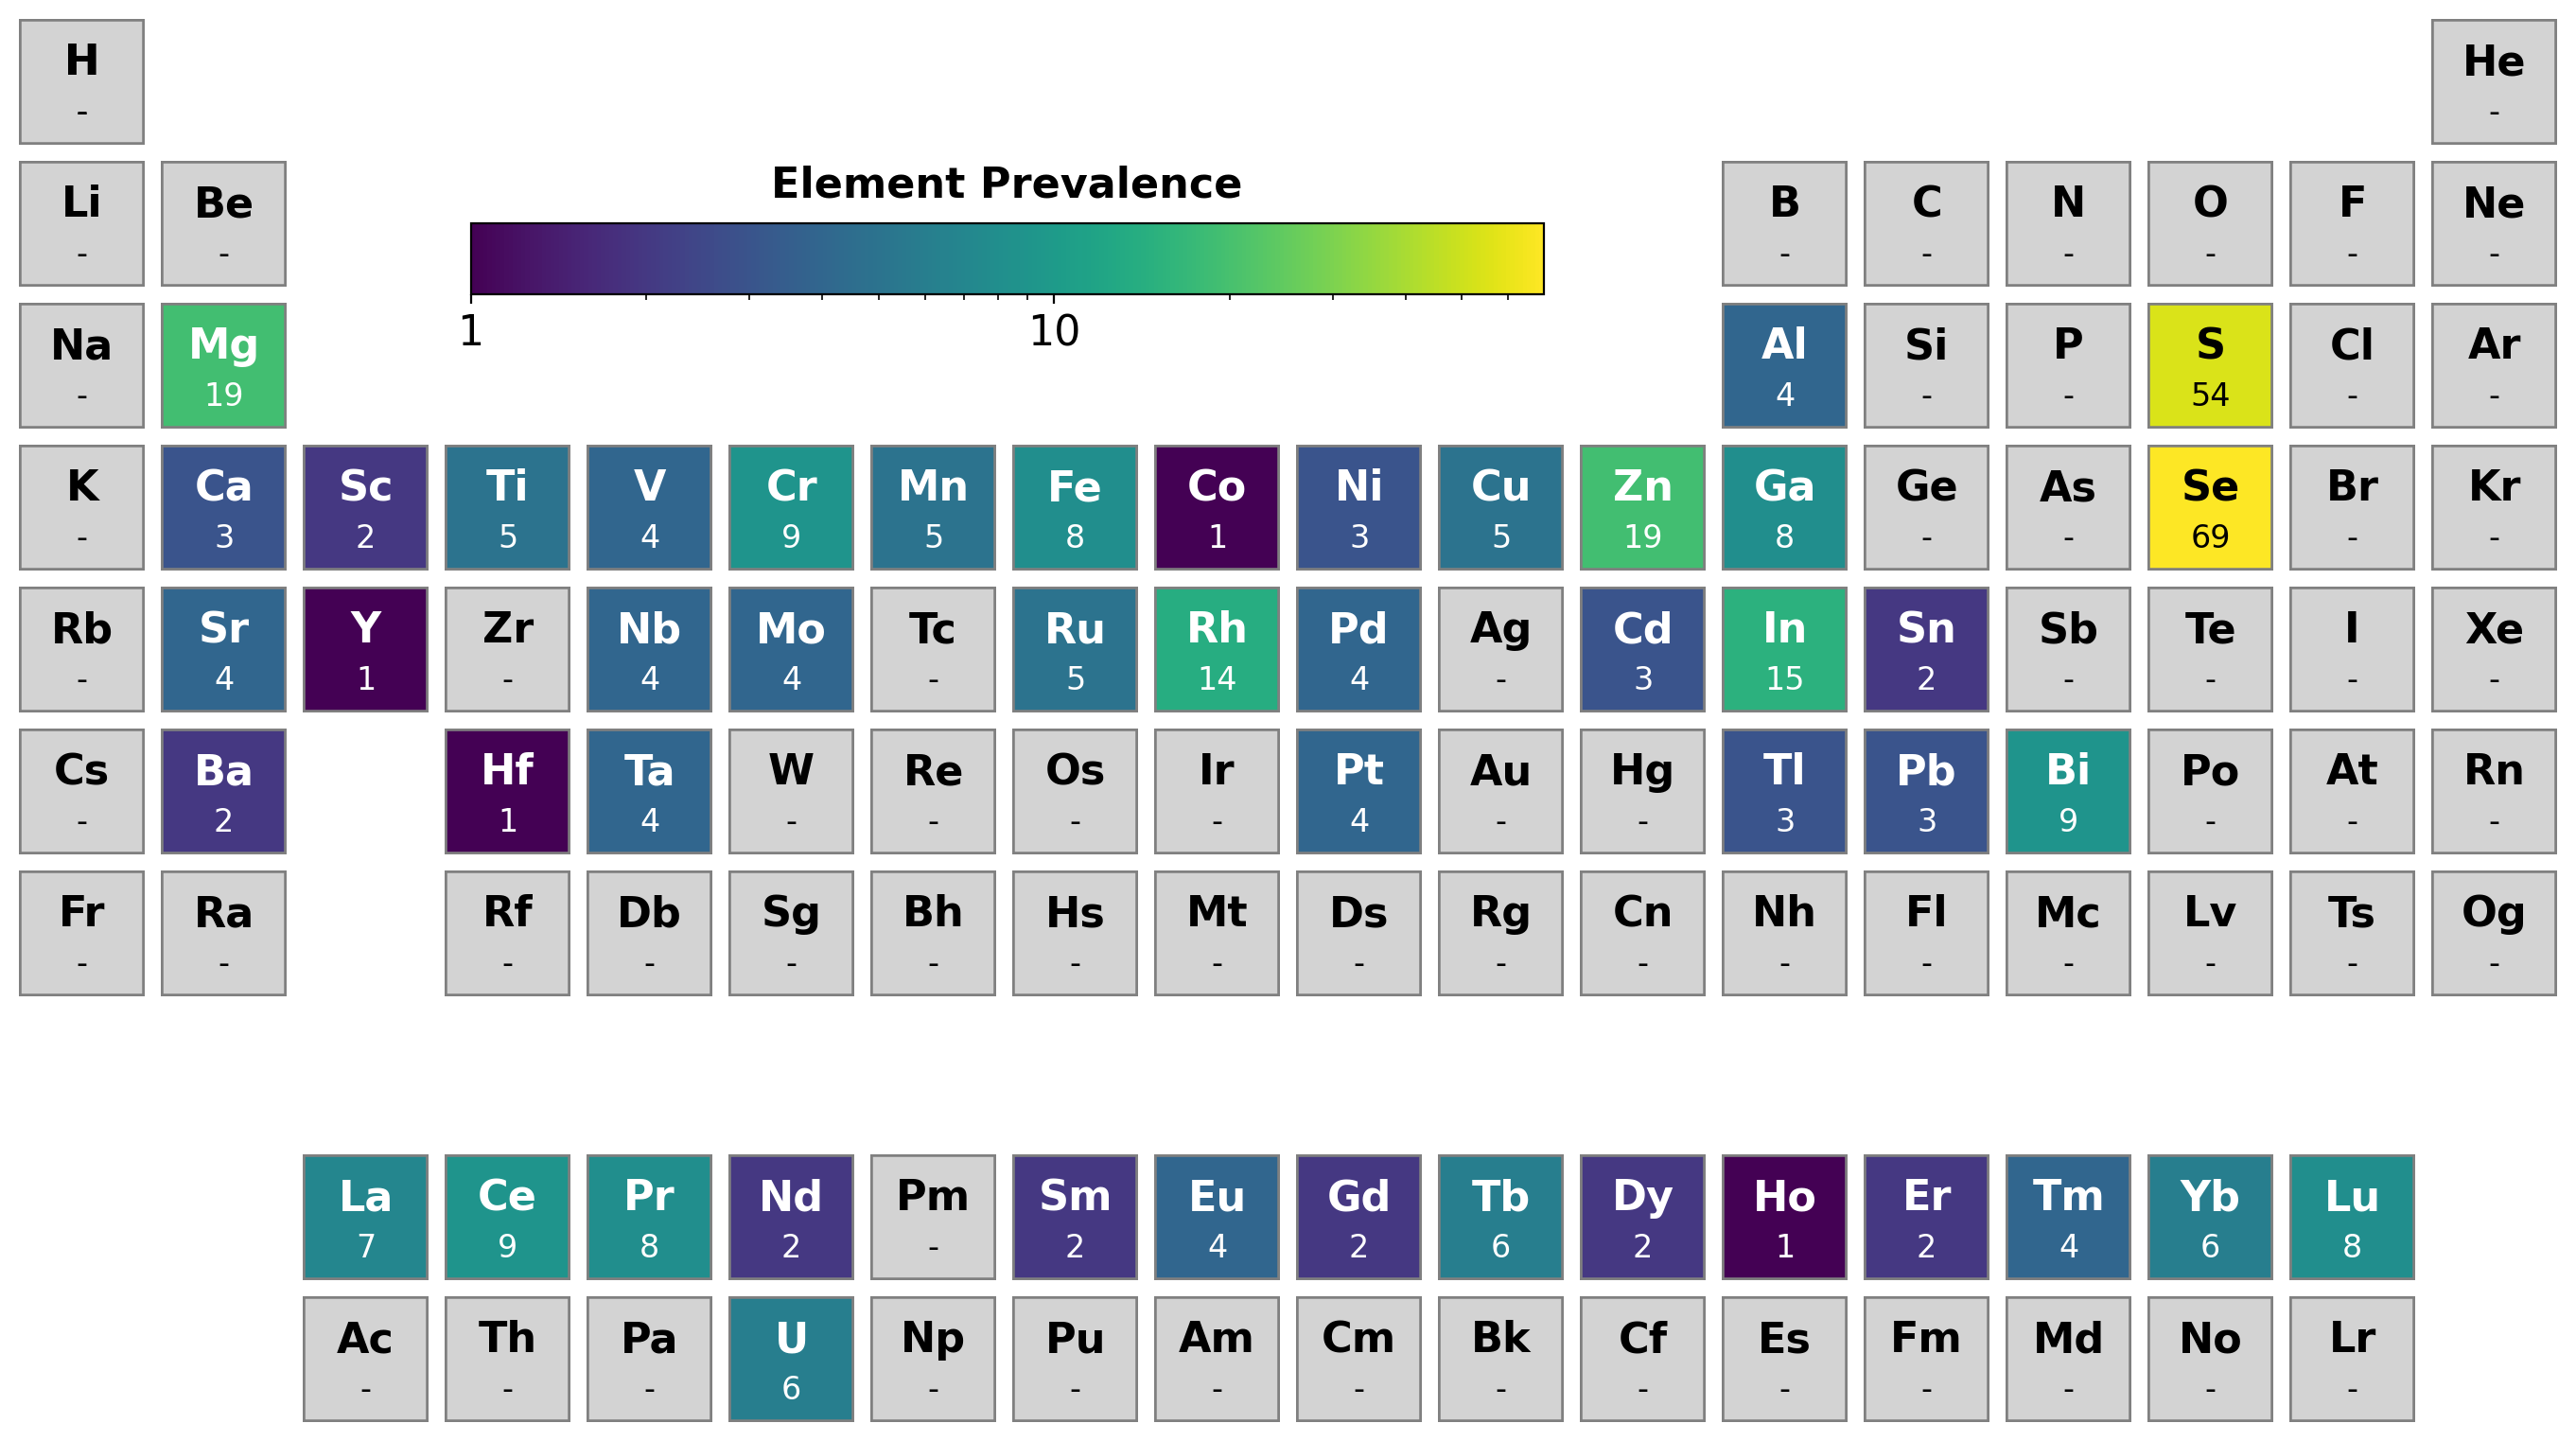

In [3]:
from tf_chpvk_pv.plots import graph_periodic_table

t = 't_sisso_55'

stable_candidates_t_sisso, df_out = check_stable_compositions(t, tolerance_factor_dict_path=new_tolerance_dict_path)
graph_periodic_table(stable_candidates_t_sisso, t=t)

According to tau, 780 (55.873925501432666%) compositions are predicted to be stable as perovskites:
['BaPbS3', 'BaPbSe3', 'BaSnS3', 'BaSnSe3', 'BaPrS3', 'BaPrSe3', 'BaCeS3', 'BaCeSe3', 'BaTiS3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfS3', 'BaHfSe3', 'BaZrS3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaUS3', 'EuPbS3', 'EuSnS3', 'EuCuS3', 'EuCuSe3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuGdS3', 'EuGdSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuScSe3', 'EuTlS3', 'EuTlSe3', 'EuRhS3', 'EuRhSe3', 'EuTiS3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuNbS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuNiS3', 'EuNiSe3', 'EuCoS3', 'EuCoSe3', 'EuGaS3', 'EuGaSe3', 'EuAlS3', 'EuAlSe3', 'EuFeS3', 'EuFeSe3', 'EuCrS3', 'EuCrSe3', 'EuInS3', 'EuInSe3', 'EuMnS3', 'EuMnSe3', 'SrSnS3', 'SrSnSe3', 'SrPrS3', 'SrPrSe3', 'SrCeS3', 'SrCeSe3', 'SrTiS3', 'SrTaS3', 'SrTaSe3', 'SrNbS3', 'SrNbSe3', 'SrH

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


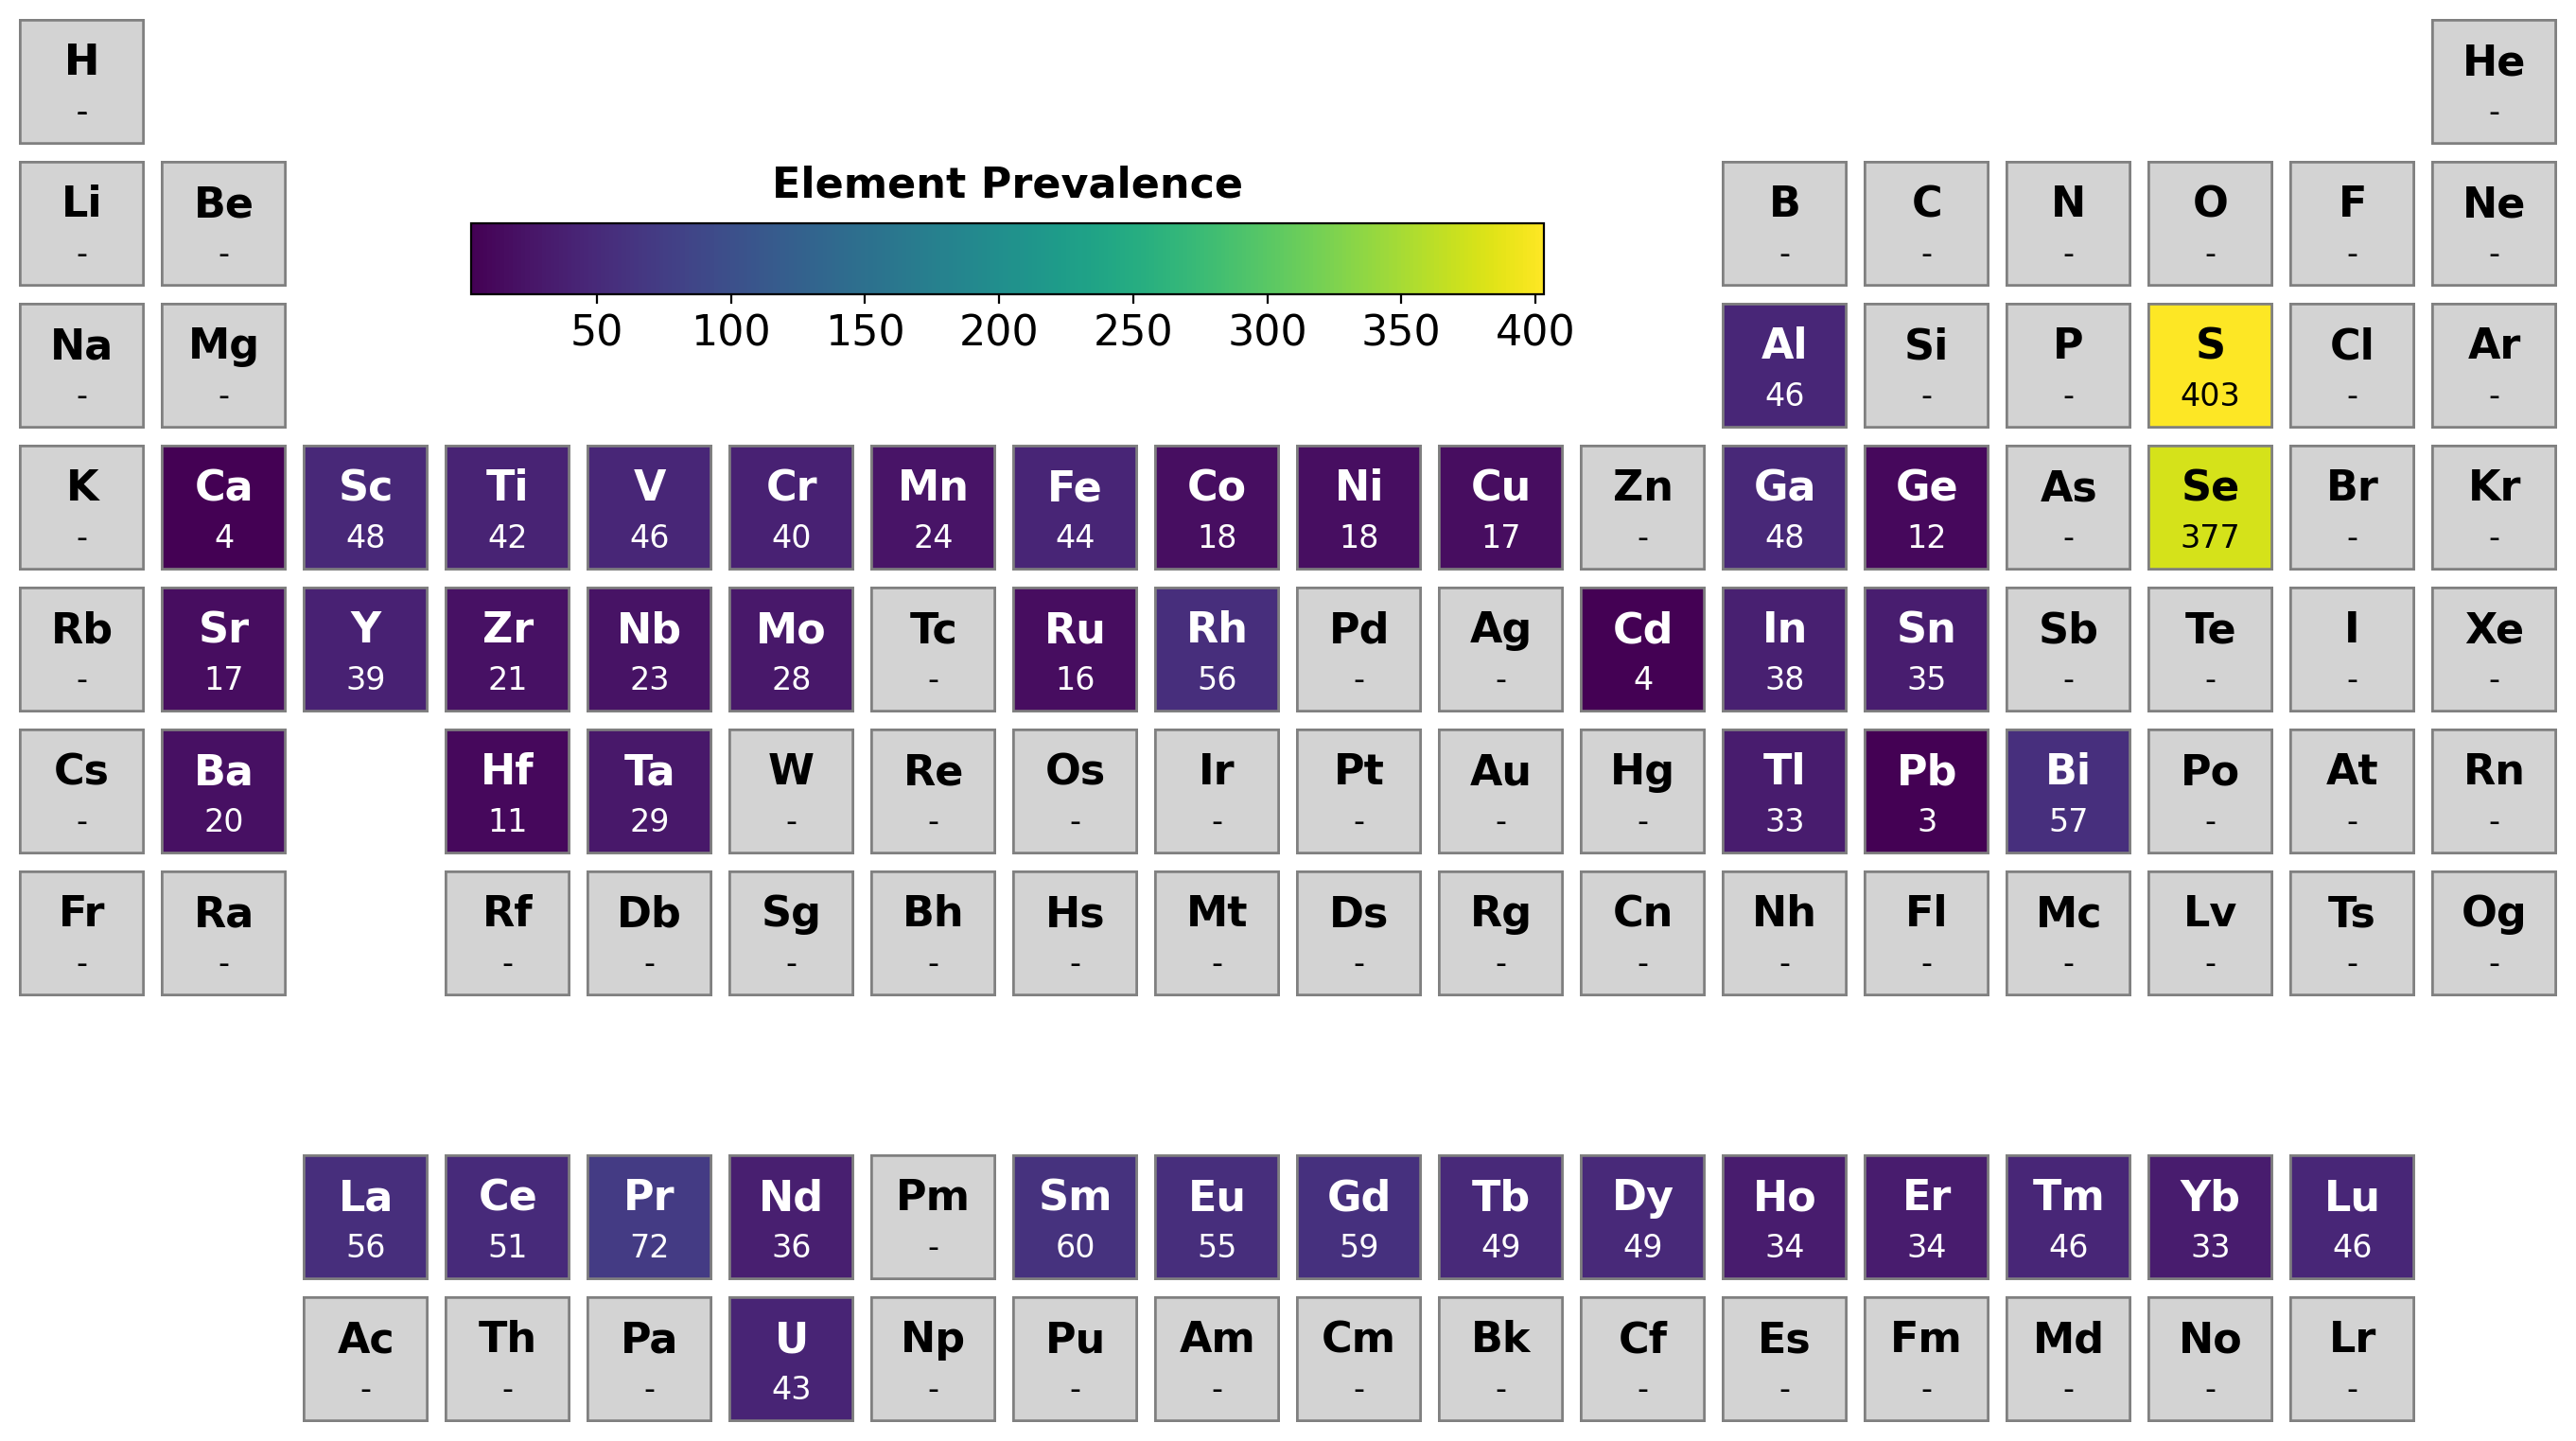

According to t_sisso_14, 181 (12.965616045845271%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbPrS3', 'PbCeS3', 'PbHfS3', 'PbZrS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaCeS3', 'CaUSe3', 'SnGeS3', 'SnGeSe3', 'SnVS3', 'SnVSe3', 'SnRhS3', 'SnRhSe3', 'SnAlSe3', 'CdCeS3', 'CdUSe3', 'CuPrS3', 'CuPrSe3', 'CuCeSe3', 'CuScSe3', 'CuTlSe3', 'CuHfS3', 'CuHfSe3', 'CuZrS3', 'CuZrSe3', 'MgPrS3', 'MgCeS3', 'MgHfS3', 'MgZrS3', 'ZnTaS3', 'ZnTaSe3', 'ZnNbS3', 'ZnNbSe3', 'ZnTbS3', 'ZnTbSe3', 'LaScS3', 'LaTlS3', 'LaHfS3', 'LaZrS3', 'LaTbS3', 'LaTbSe3', 'LaInS3', 'LaInSe3', 'PrLuSe3', 'PrScS3', 'PrTlS3', 'PrTbS3', 'PrT

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


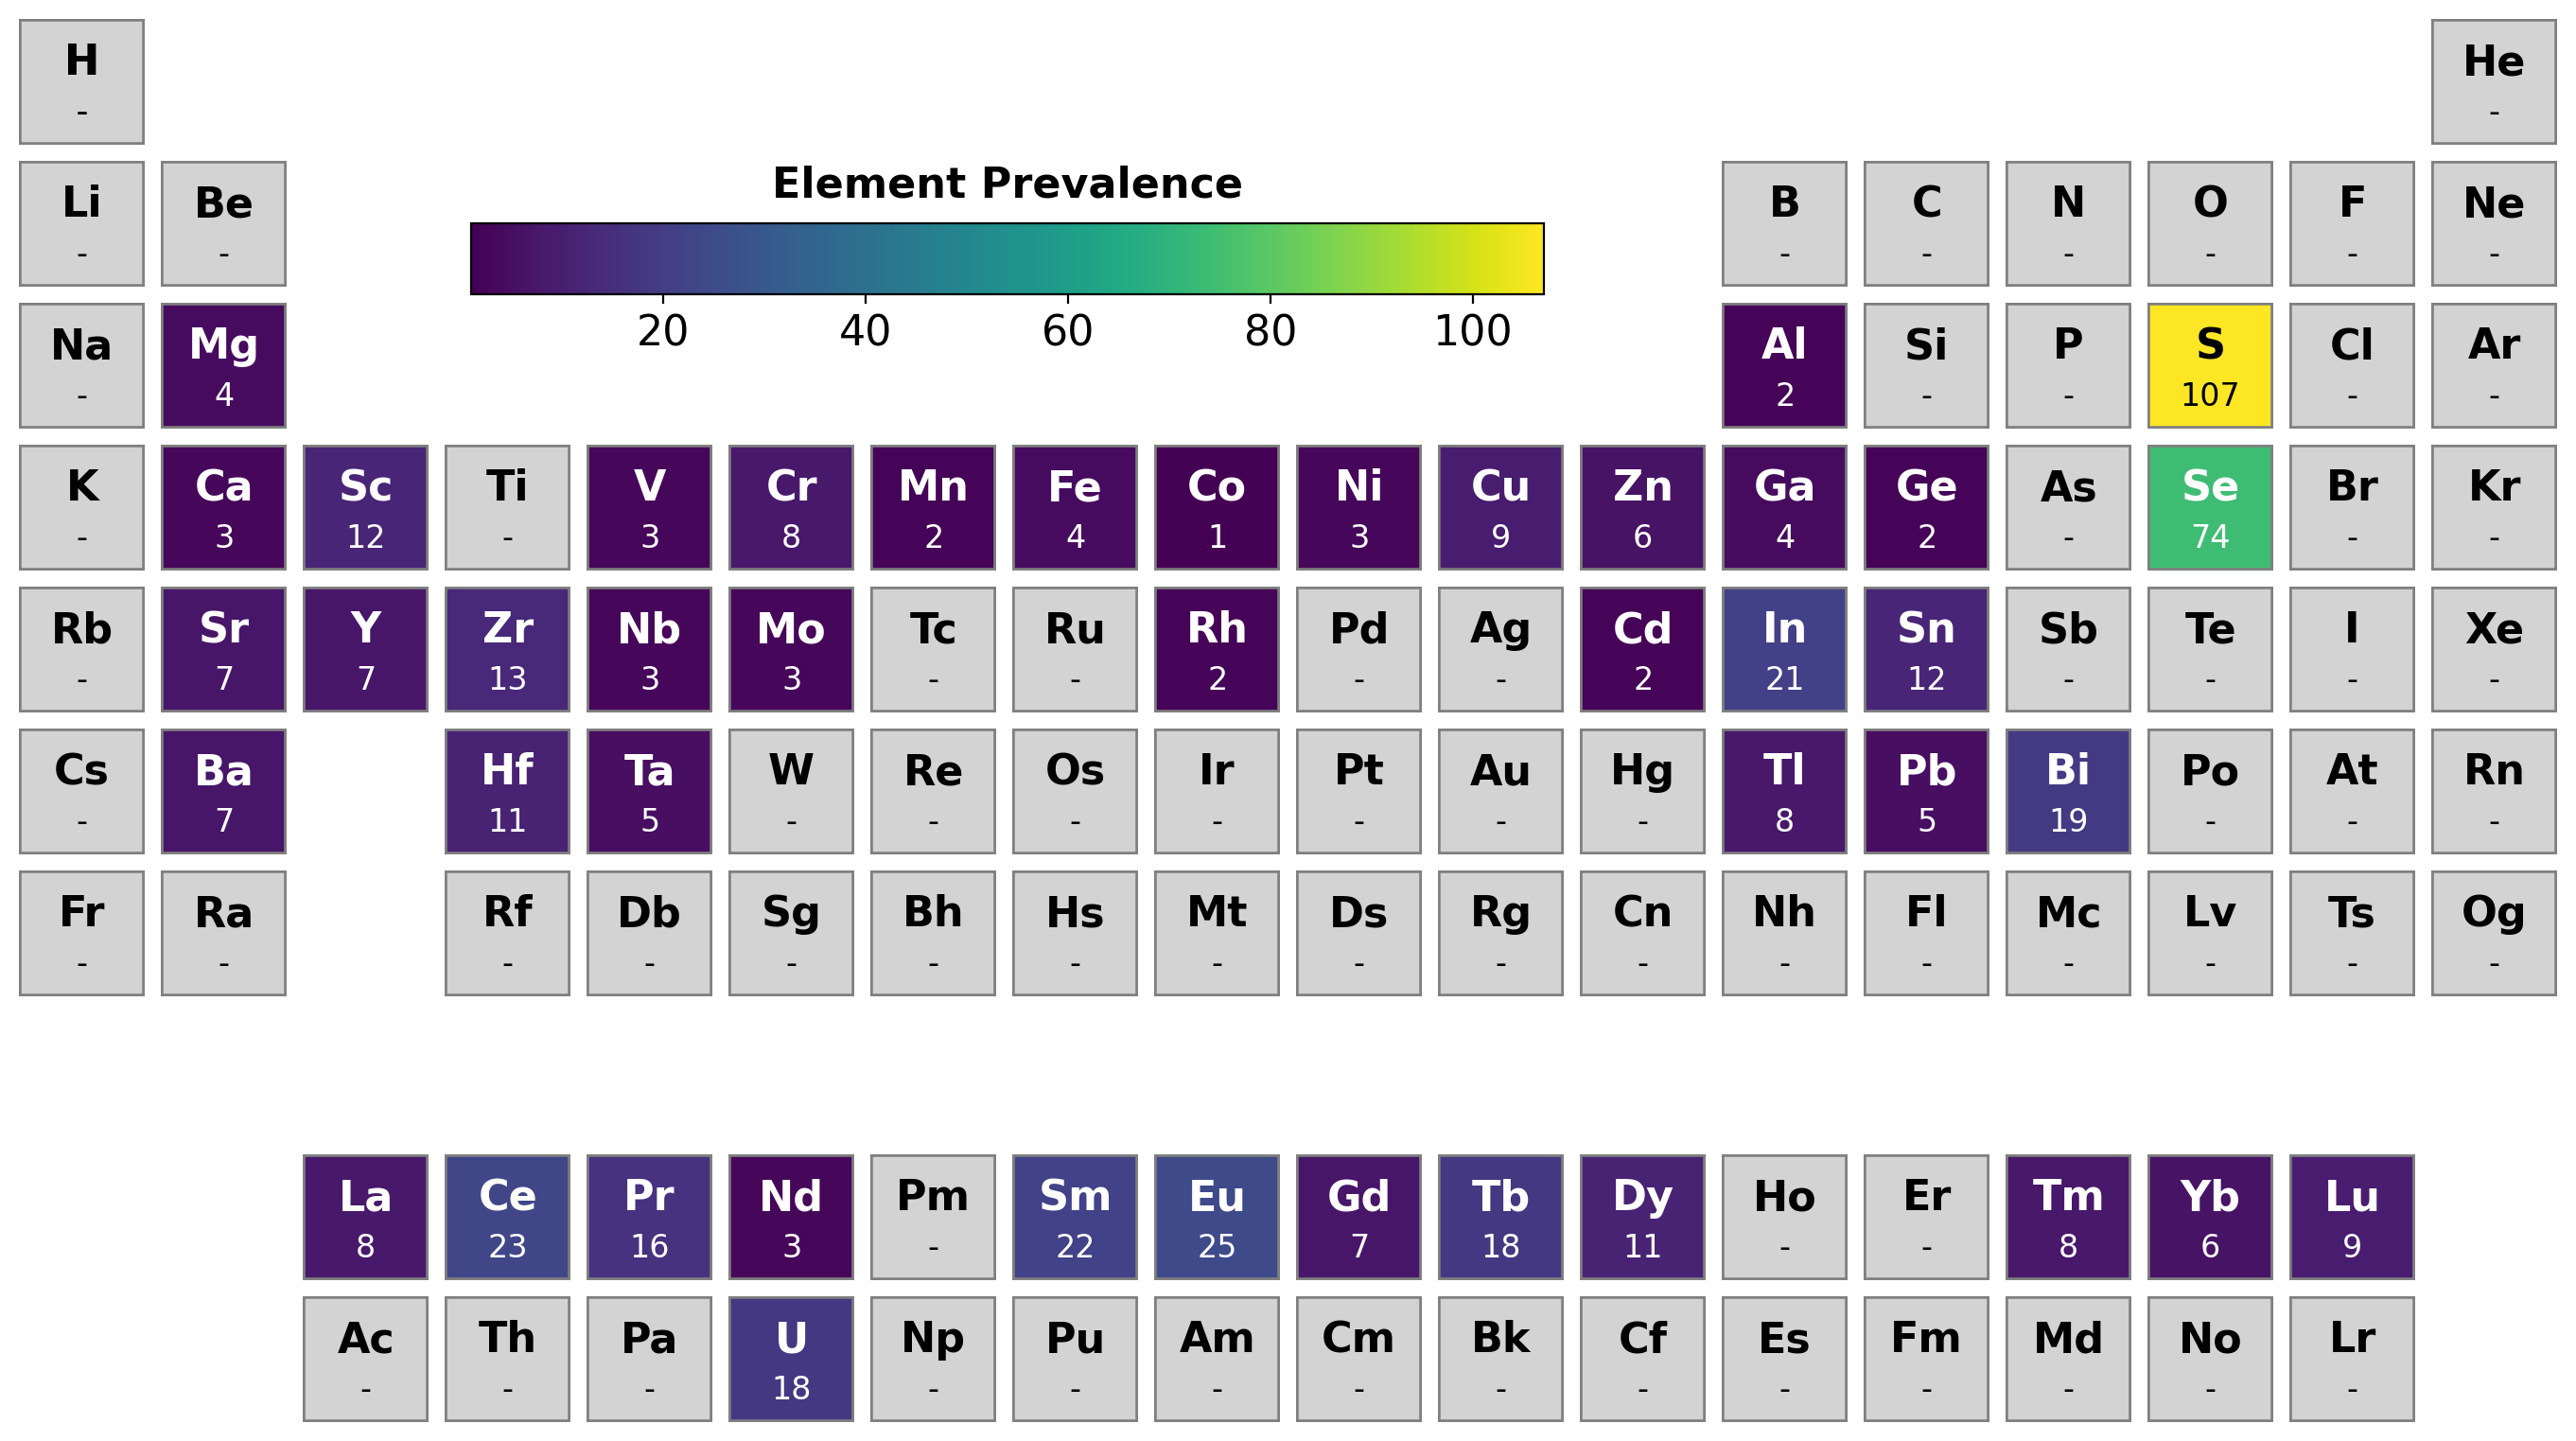

According to t_sisso_82, 131 (9.383954154727794%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuGdS3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuErS3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbCeS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaCeS3', 'CaHfS3', 'CaZrS3', 'CaUS3', 'CdCeS3', 'CdHfS3', 'CdZrS3', 'CdUS3', 'MgCeS3', 'LaScS3', 'LaTlS3', 'LaTbS3', 'LaInS3', 'PrLuS3', 'PrScS3', 'PrTlS3', 'PrZrS3', 'PrTbS3', 'PrUS3', 'PrInS3', 'CeYbS3', 'SmCeS3', 'SmCeSe3', 'CeYS3', 'CeYSe3', 'CeTmS3', 'CeTmSe3', 'CeLuS3', 'CeLuSe3', 'CeScS3', 'BiCeS3', 'BiCeSe3', 'CeUS3', 'CeUSe3', 'CeInS3', 'SmYbS3', 'SmYbSe3', 'BiYbS3', 'BiYbSe3', 'GdScS3', 'GdTlS3', 'GdTbS3', 'GdInS3', 'SmYS3',

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


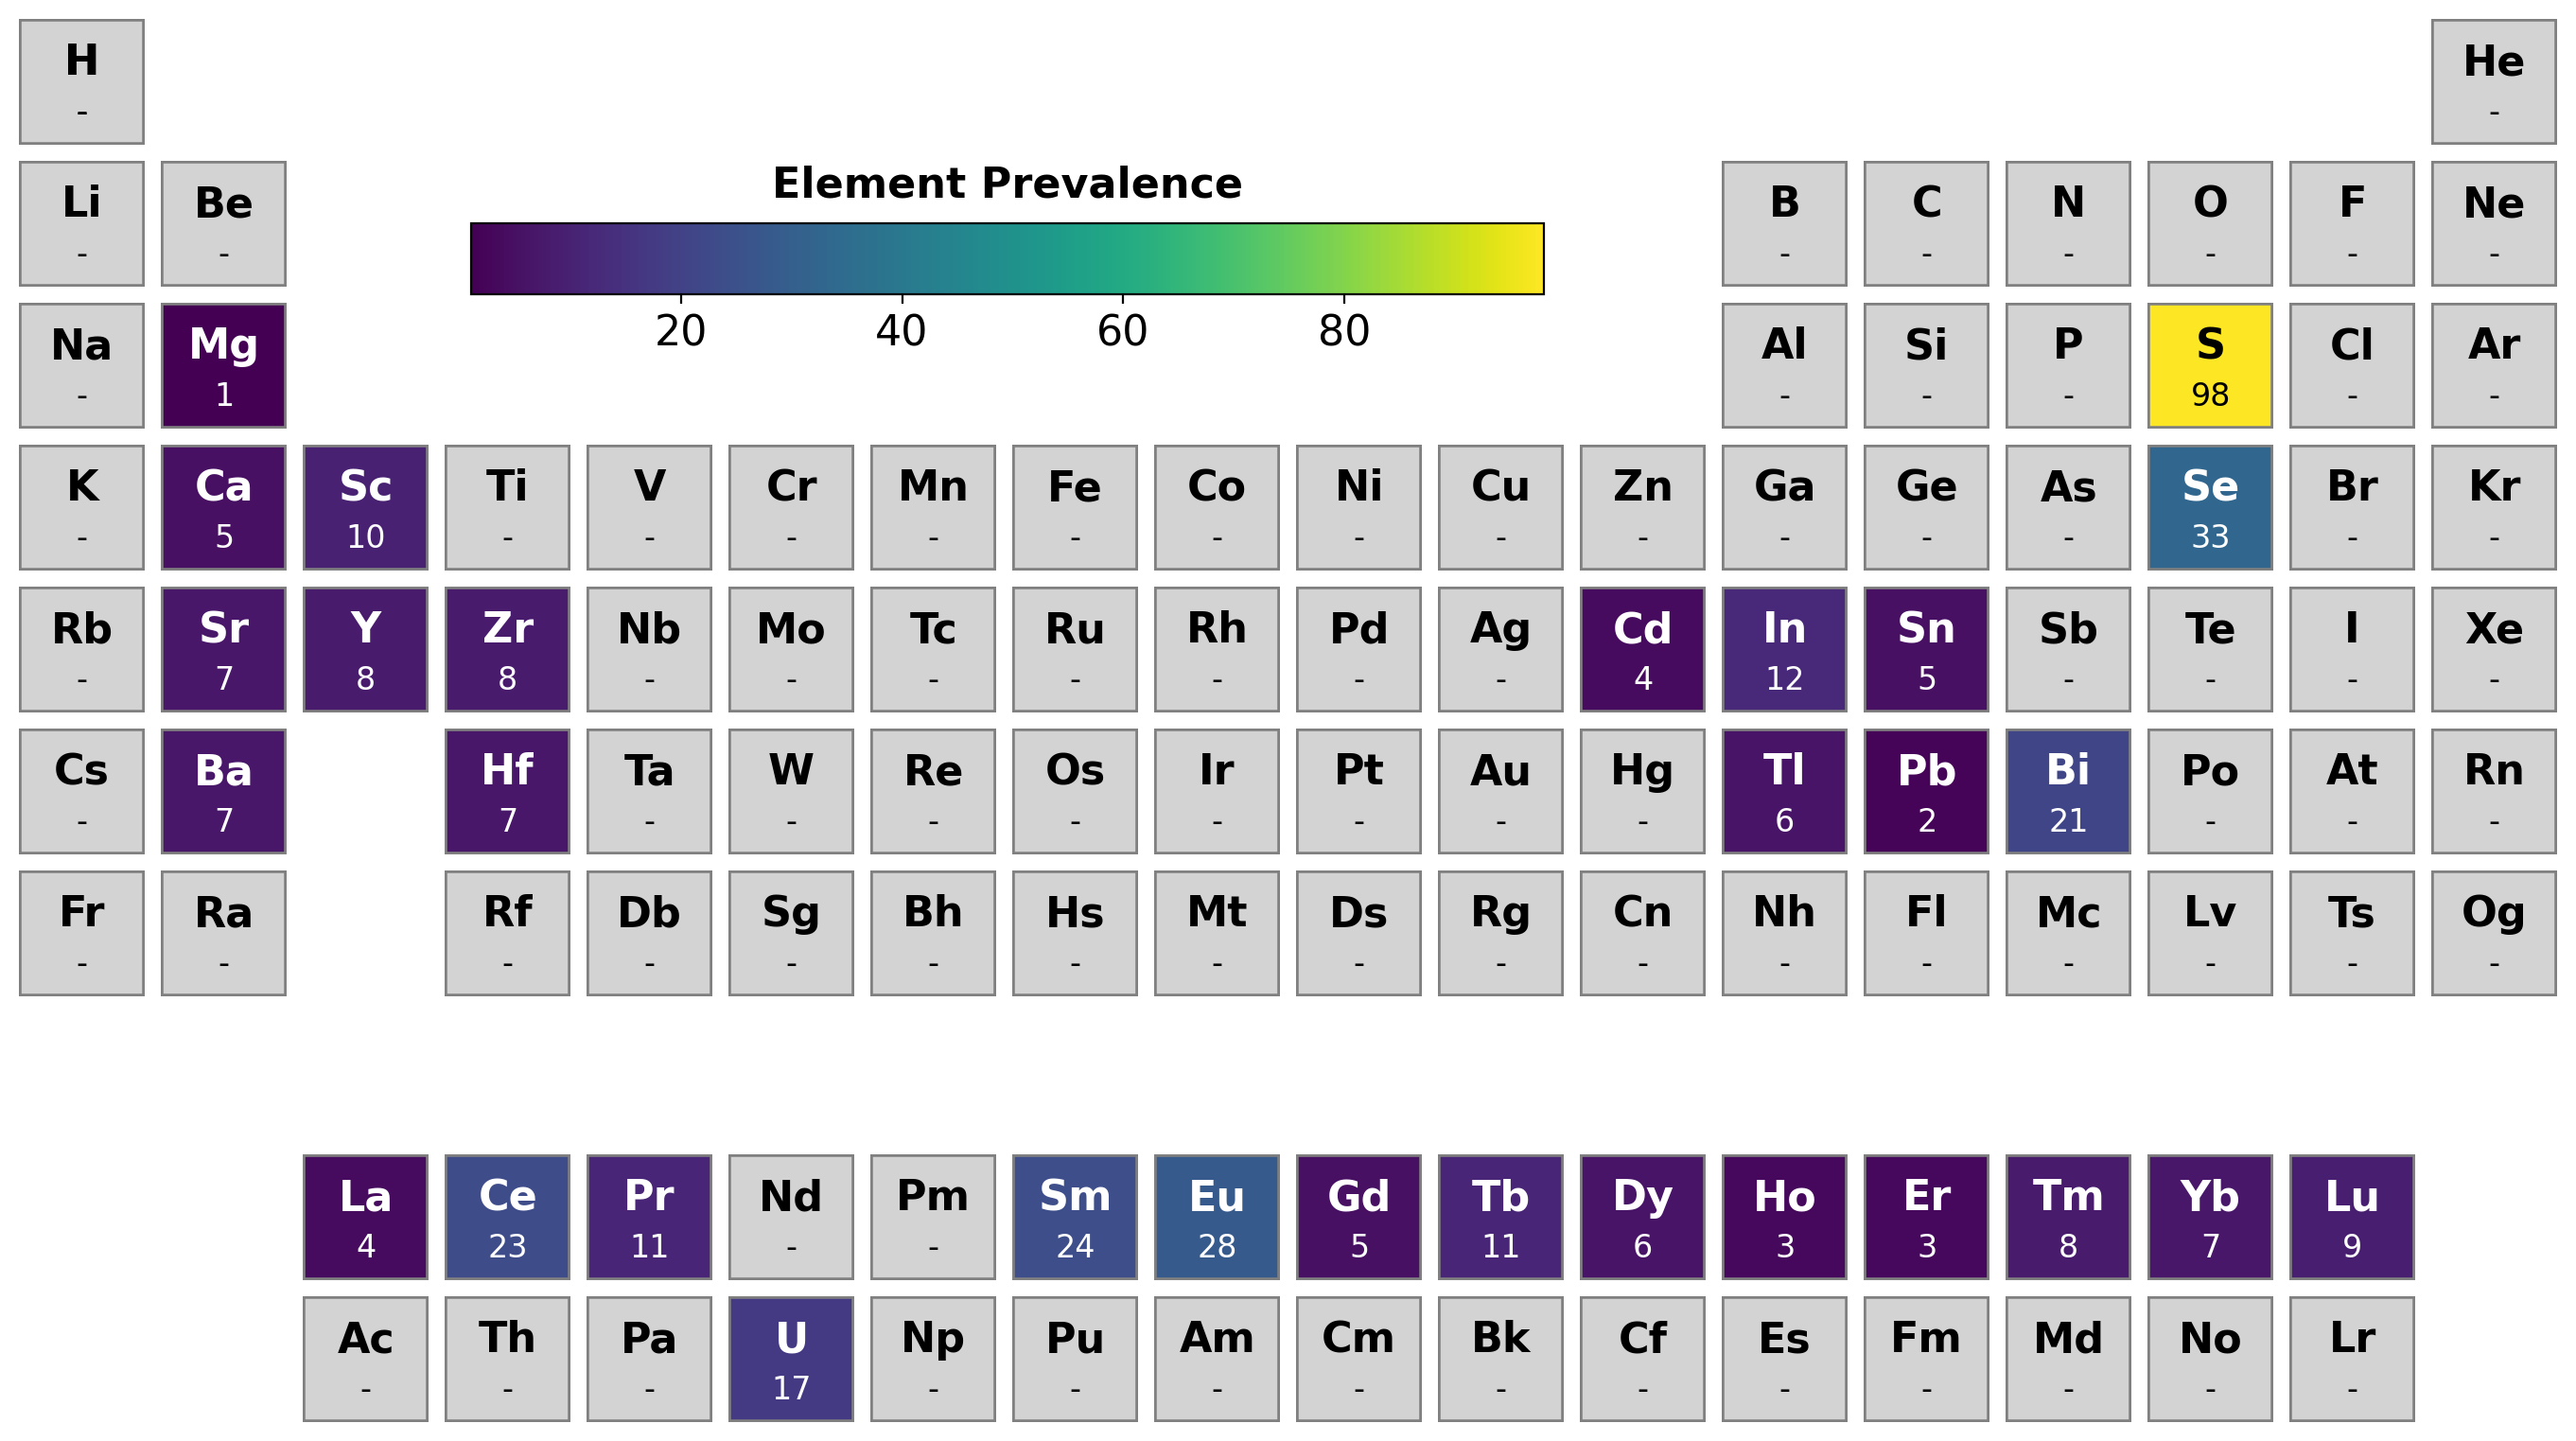

According to t_sisso_11, 1234 (88.39541547277938%) compositions are predicted to be stable as perovskites:
['BaPbS3', 'BaPbSe3', 'BaSnSe3', 'BaGeS3', 'BaGeSe3', 'BaPrSe3', 'BaCeSe3', 'BaSiS3', 'BaSiSe3', 'BaVS3', 'BaVSe3', 'BaRhS3', 'BaRhSe3', 'BaTiS3', 'BaTiSe3', 'BaRuS3', 'BaRuSe3', 'BaMoS3', 'BaMoSe3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfSe3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaPtS3', 'BaPtSe3', 'BaPdS3', 'BaPdSe3', 'BaNiS3', 'BaNiSe3', 'BaCoS3', 'BaCoSe3', 'BaCrS3', 'BaCrSe3', 'BaMnS3', 'BaMnSe3', 'EuPbS3', 'EuPbSe3', 'EuSnSe3', 'EuCuS3', 'EuCuSe3', 'EuGeS3', 'EuGeSe3', 'EuLaS3', 'EuLaSe3', 'EuNdS3', 'EuNdSe3', 'EuGdS3', 'EuGdSe3', 'EuSmS3', 'EuSmSe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuScSe3', 'EuBiS3', 'EuBiSe3', 'EuSiS3', 'EuSiSe3', 'EuVS3', 'EuVSe3', 'EuRhS3', 'EuRhSe3', 'EuTiS3', 'EuTiSe3', 'EuRuS3', 'EuRuSe3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuTaSe3', 'EuNbS3', 'EuNbSe3', 'EuHfSe3', 'EuZrSe3', 'EuPtS3', 'EuPtSe3', 'EuPdS3', 'EuPdSe3', 'EuNiS3', 'EuNiSe3',

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


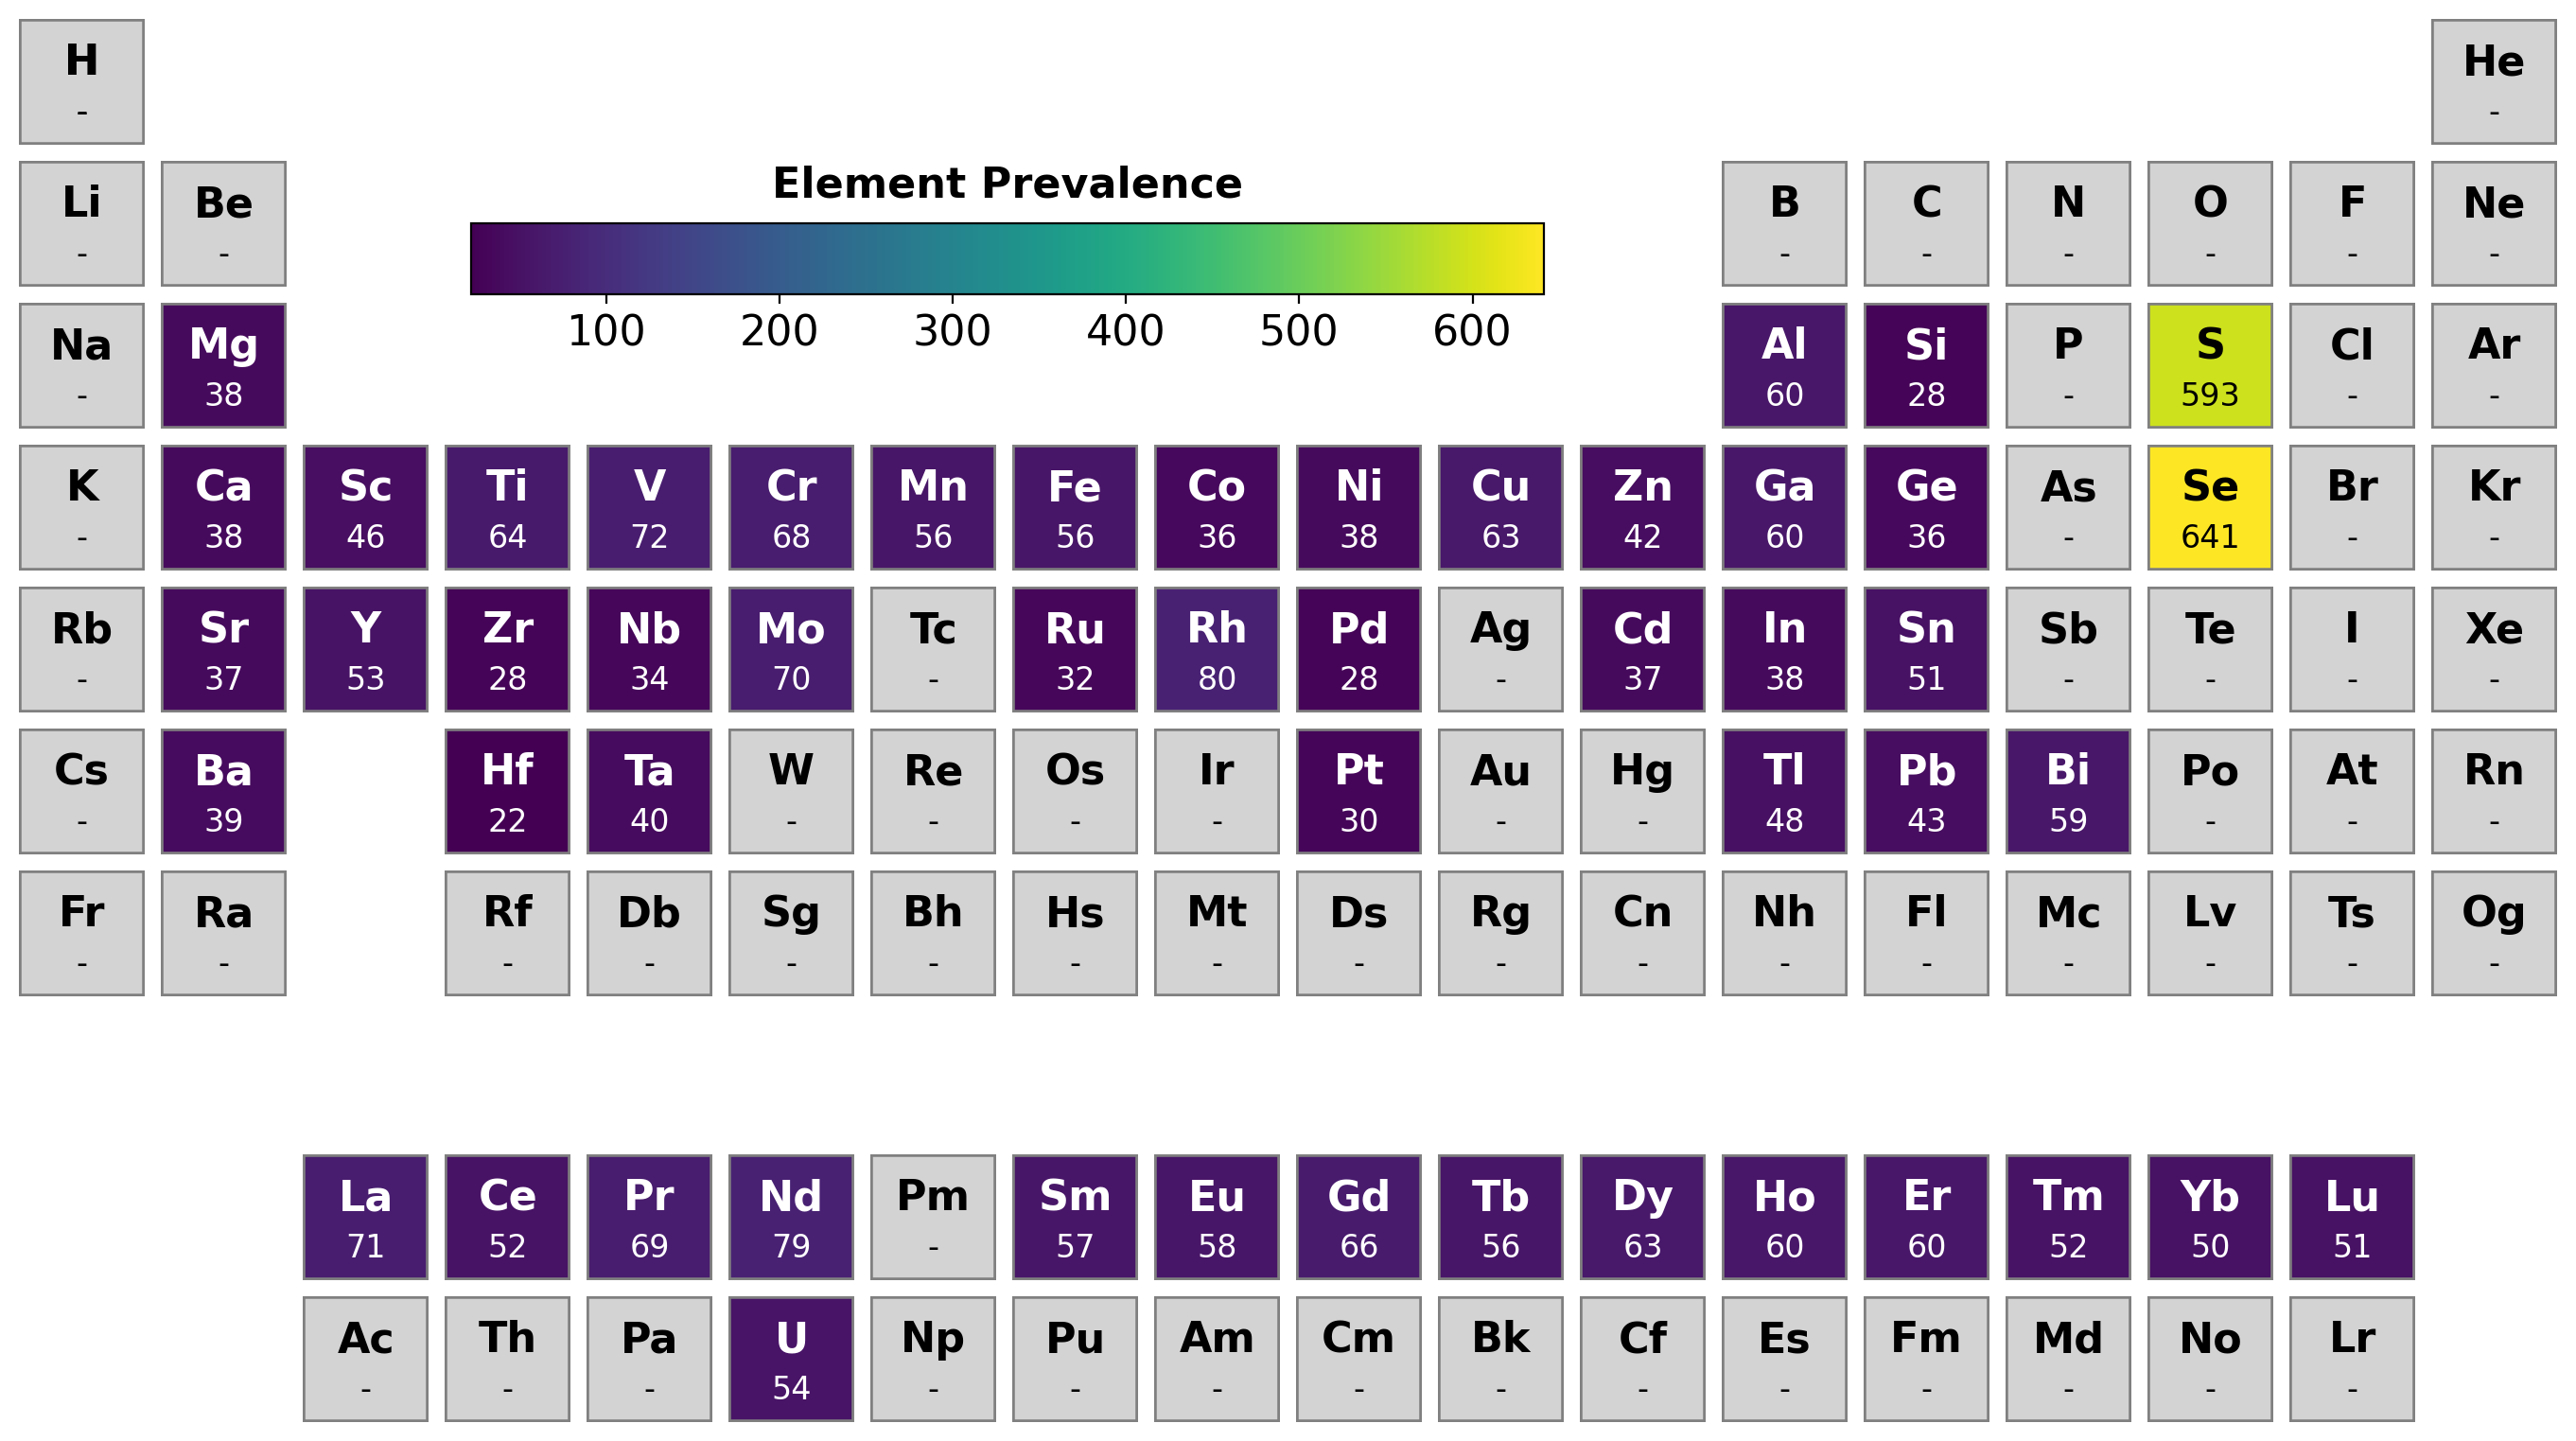

According to t_sisso_12, 152 (10.888252148997136%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaPrS3', 'BaCeS3', 'BaHfS3', 'BaZrS3', 'BaUS3', 'BaUSe3', 'EuSnS3', 'EuPrS3', 'EuPrSe3', 'EuCeS3', 'EuCeSe3', 'EuYbS3', 'EuYbSe3', 'EuGdS3', 'EuGdSe3', 'EuYS3', 'EuYSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuTmS3', 'EuTmSe3', 'EuLuS3', 'EuLuSe3', 'EuScS3', 'EuTlS3', 'EuHfS3', 'EuZrS3', 'EuTbS3', 'EuTbSe3', 'EuUS3', 'EuUSe3', 'EuInS3', 'EuInSe3', 'PbSnS3', 'PbCeS3', 'SrSnS3', 'SrPrS3', 'SrCeS3', 'SrHfS3', 'SrZrS3', 'SrUS3', 'SrUSe3', 'CaSnS3', 'CaPrS3', 'CaCeS3', 'CaHfS3', 'CaZrS3', 'CaUS3', 'CaUSe3', 'CdPrS3', 'CdCeS3', 'CdHfS3', 'CdZrS3', 'CdUS3', 'CdUSe3', 'MgCeS3', 'LaScS3', 'LaTlS3', 'LaTbS3', 'LaTbSe3', 'LaInS3', 'PrTmS3', 'PrLuS3', 'PrLuSe3', 'PrScS3', 'PrTlS3', 'PrZrS3', 'PrTbS3', 'PrTbSe3', 'PrUS3', 'PrUSe3', 'PrInS3', 'PrInSe3', 'CeYbS3', 'CeYbSe3', 'SmCeS3', 'SmCeSe3', 'CeYS3', 'CeYSe3', 'CeTmS3', 'CeTmSe3', 'CeLuS3', 'CeLuSe3', '

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


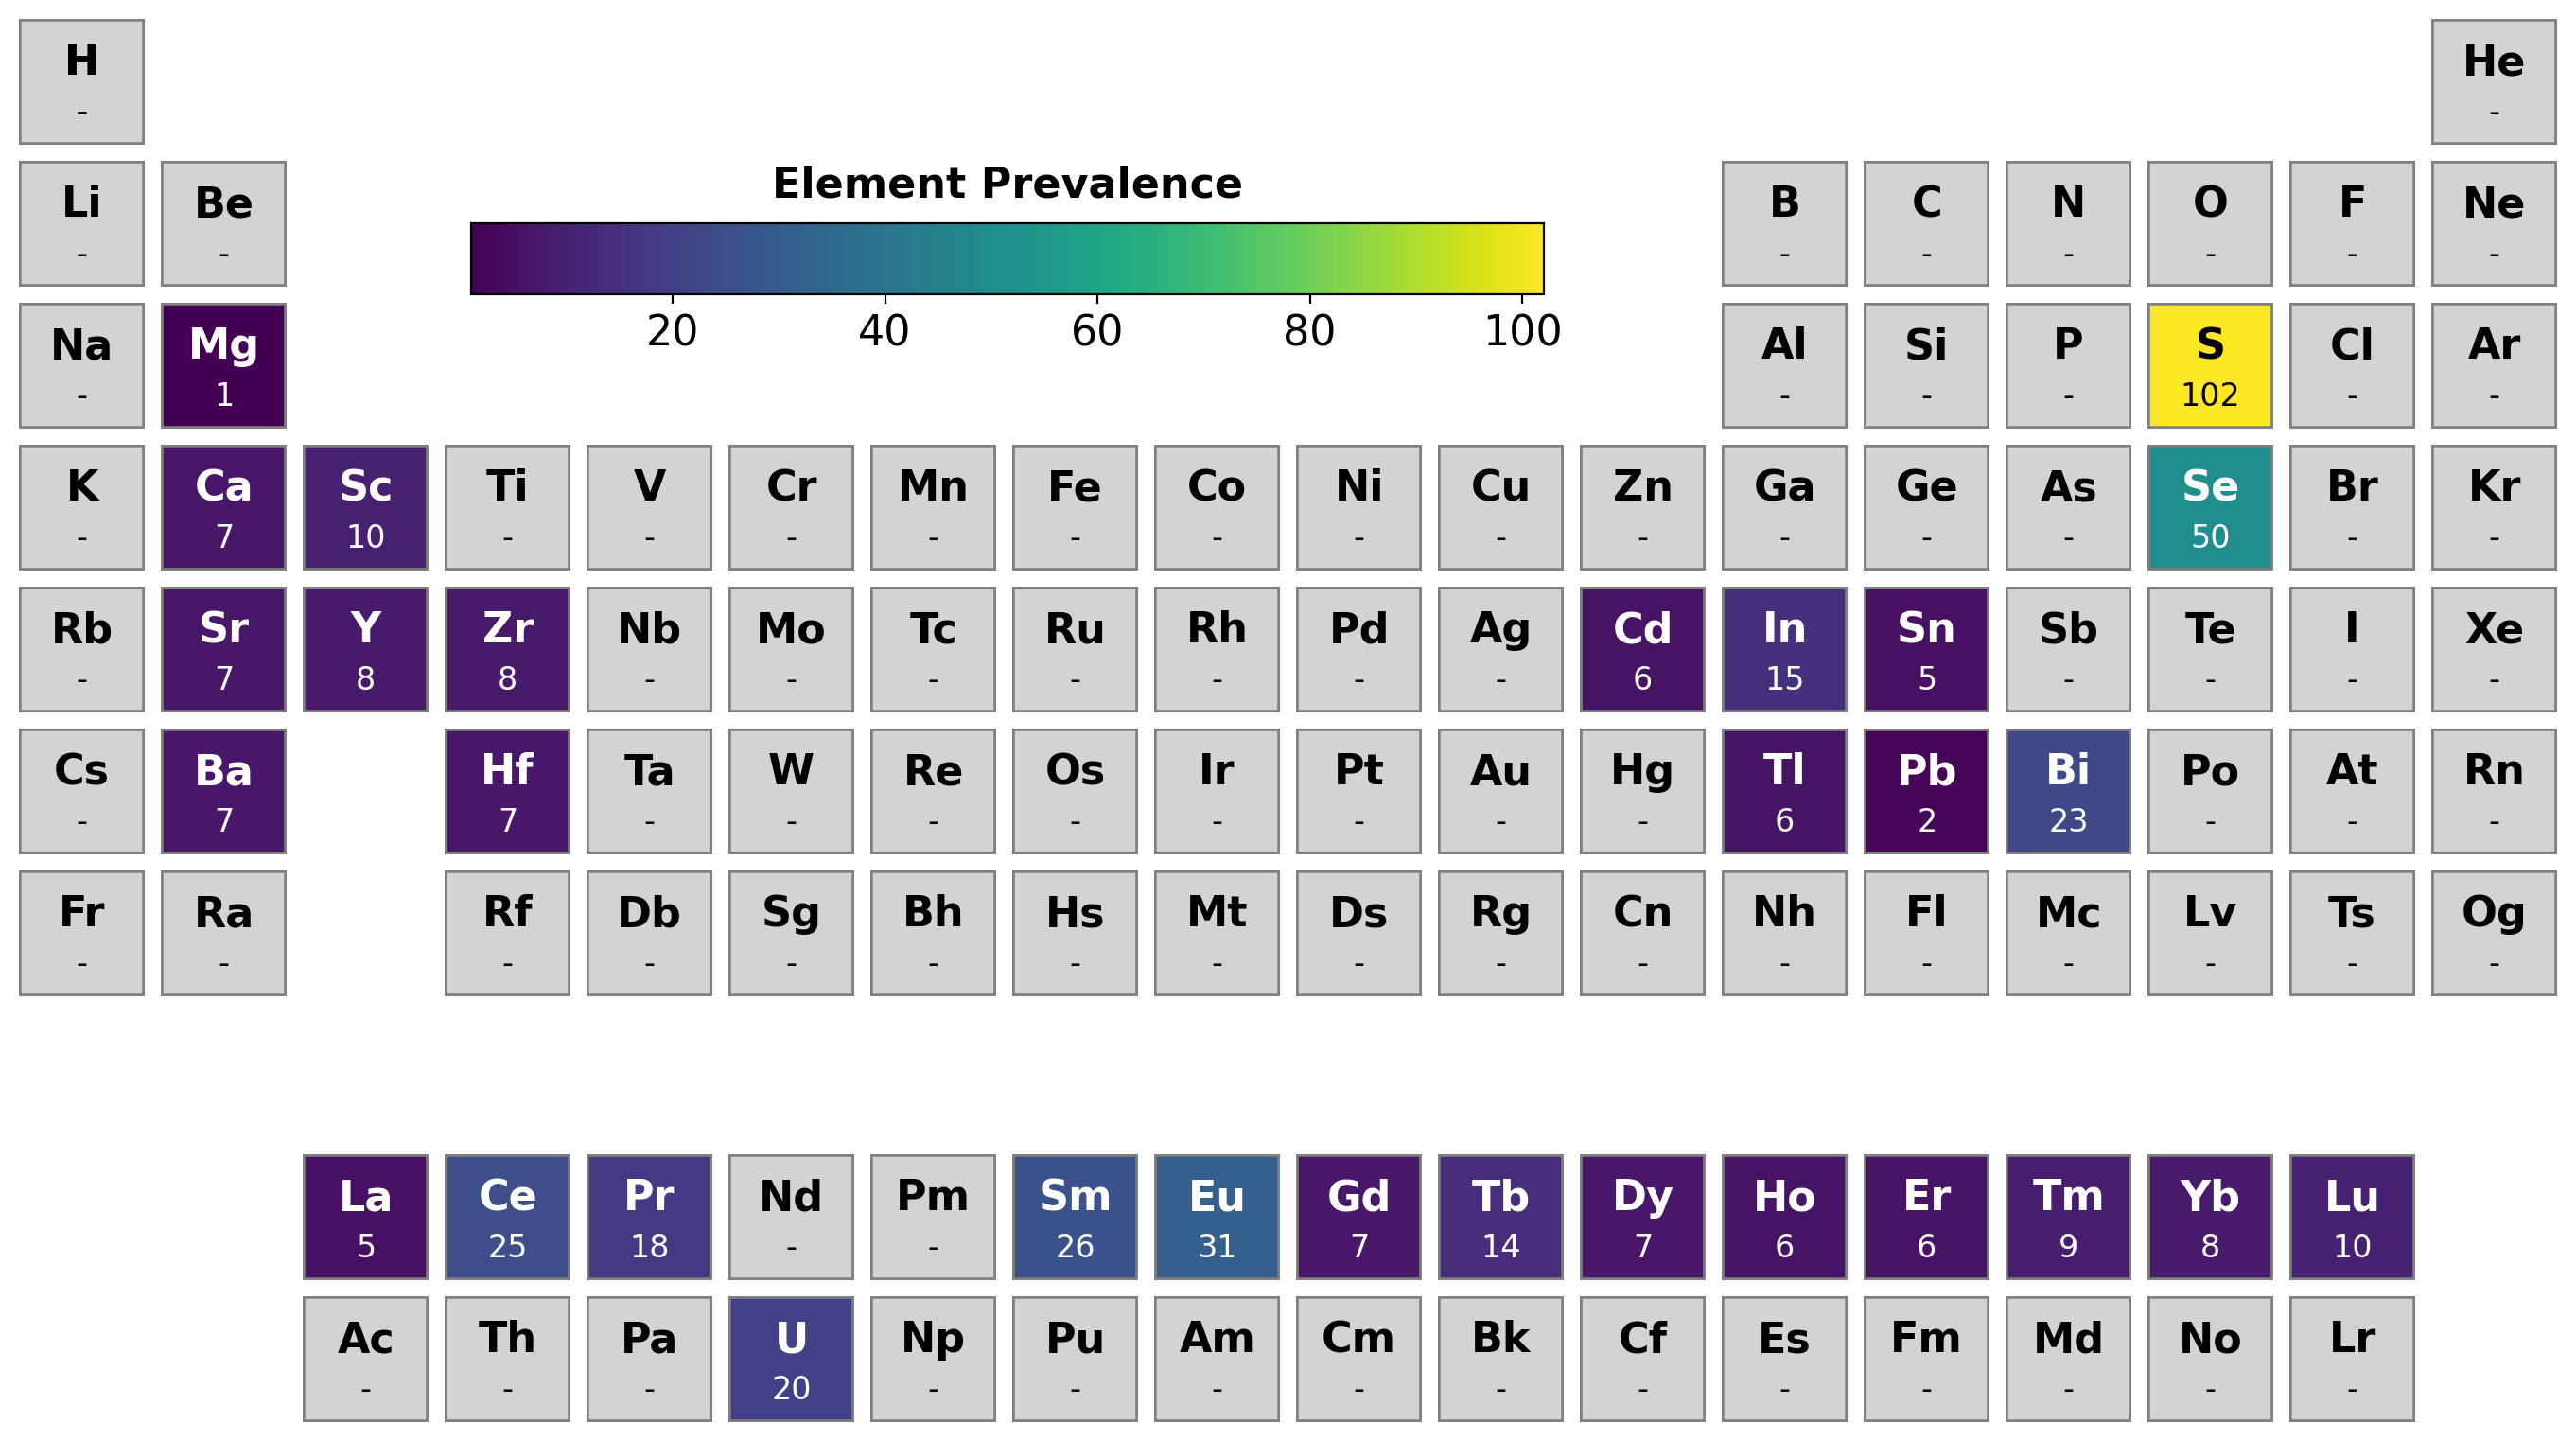

According to t_sisso_88, 1108 (79.36962750716332%) compositions are predicted to be stable as perovskites:
['BaSnS3', 'BaSnSe3', 'BaGeS3', 'BaGeSe3', 'BaVS3', 'BaVSe3', 'BaTiS3', 'BaTiSe3', 'BaMoS3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfS3', 'BaHfSe3', 'BaZrS3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaNiS3', 'BaNiSe3', 'BaCoS3', 'BaCoSe3', 'BaCrS3', 'BaCrSe3', 'BaMnS3', 'BaMnSe3', 'EuSnS3', 'EuSnSe3', 'EuCuS3', 'EuCuSe3', 'EuGeS3', 'EuGeSe3', 'EuLaS3', 'EuLaSe3', 'EuCeS3', 'EuNdS3', 'EuNdSe3', 'EuYbS3', 'EuGdS3', 'EuGdSe3', 'EuSmS3', 'EuSmSe3', 'EuDyS3', 'EuDySe3', 'EuHoS3', 'EuHoSe3', 'EuErS3', 'EuErSe3', 'EuScSe3', 'EuTlS3', 'EuTlSe3', 'EuBiS3', 'EuBiSe3', 'EuVS3', 'EuVSe3', 'EuTiS3', 'EuTiSe3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuTaSe3', 'EuNbS3', 'EuNbSe3', 'EuHfSe3', 'EuZrSe3', 'EuNiS3', 'EuNiSe3', 'EuCoS3', 'EuCoSe3', 'EuGaS3', 'EuGaSe3', 'EuAlS3', 'EuAlSe3', 'EuFeS3', 'EuFeSe3', 'EuCrS3', 'EuCrSe3', 'EuInS3', 'EuInSe3', 'EuMnS3', 'EuMnSe3', 'PbSnS3', 'PbSnSe3', 'PbGeS3', 'PbG

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


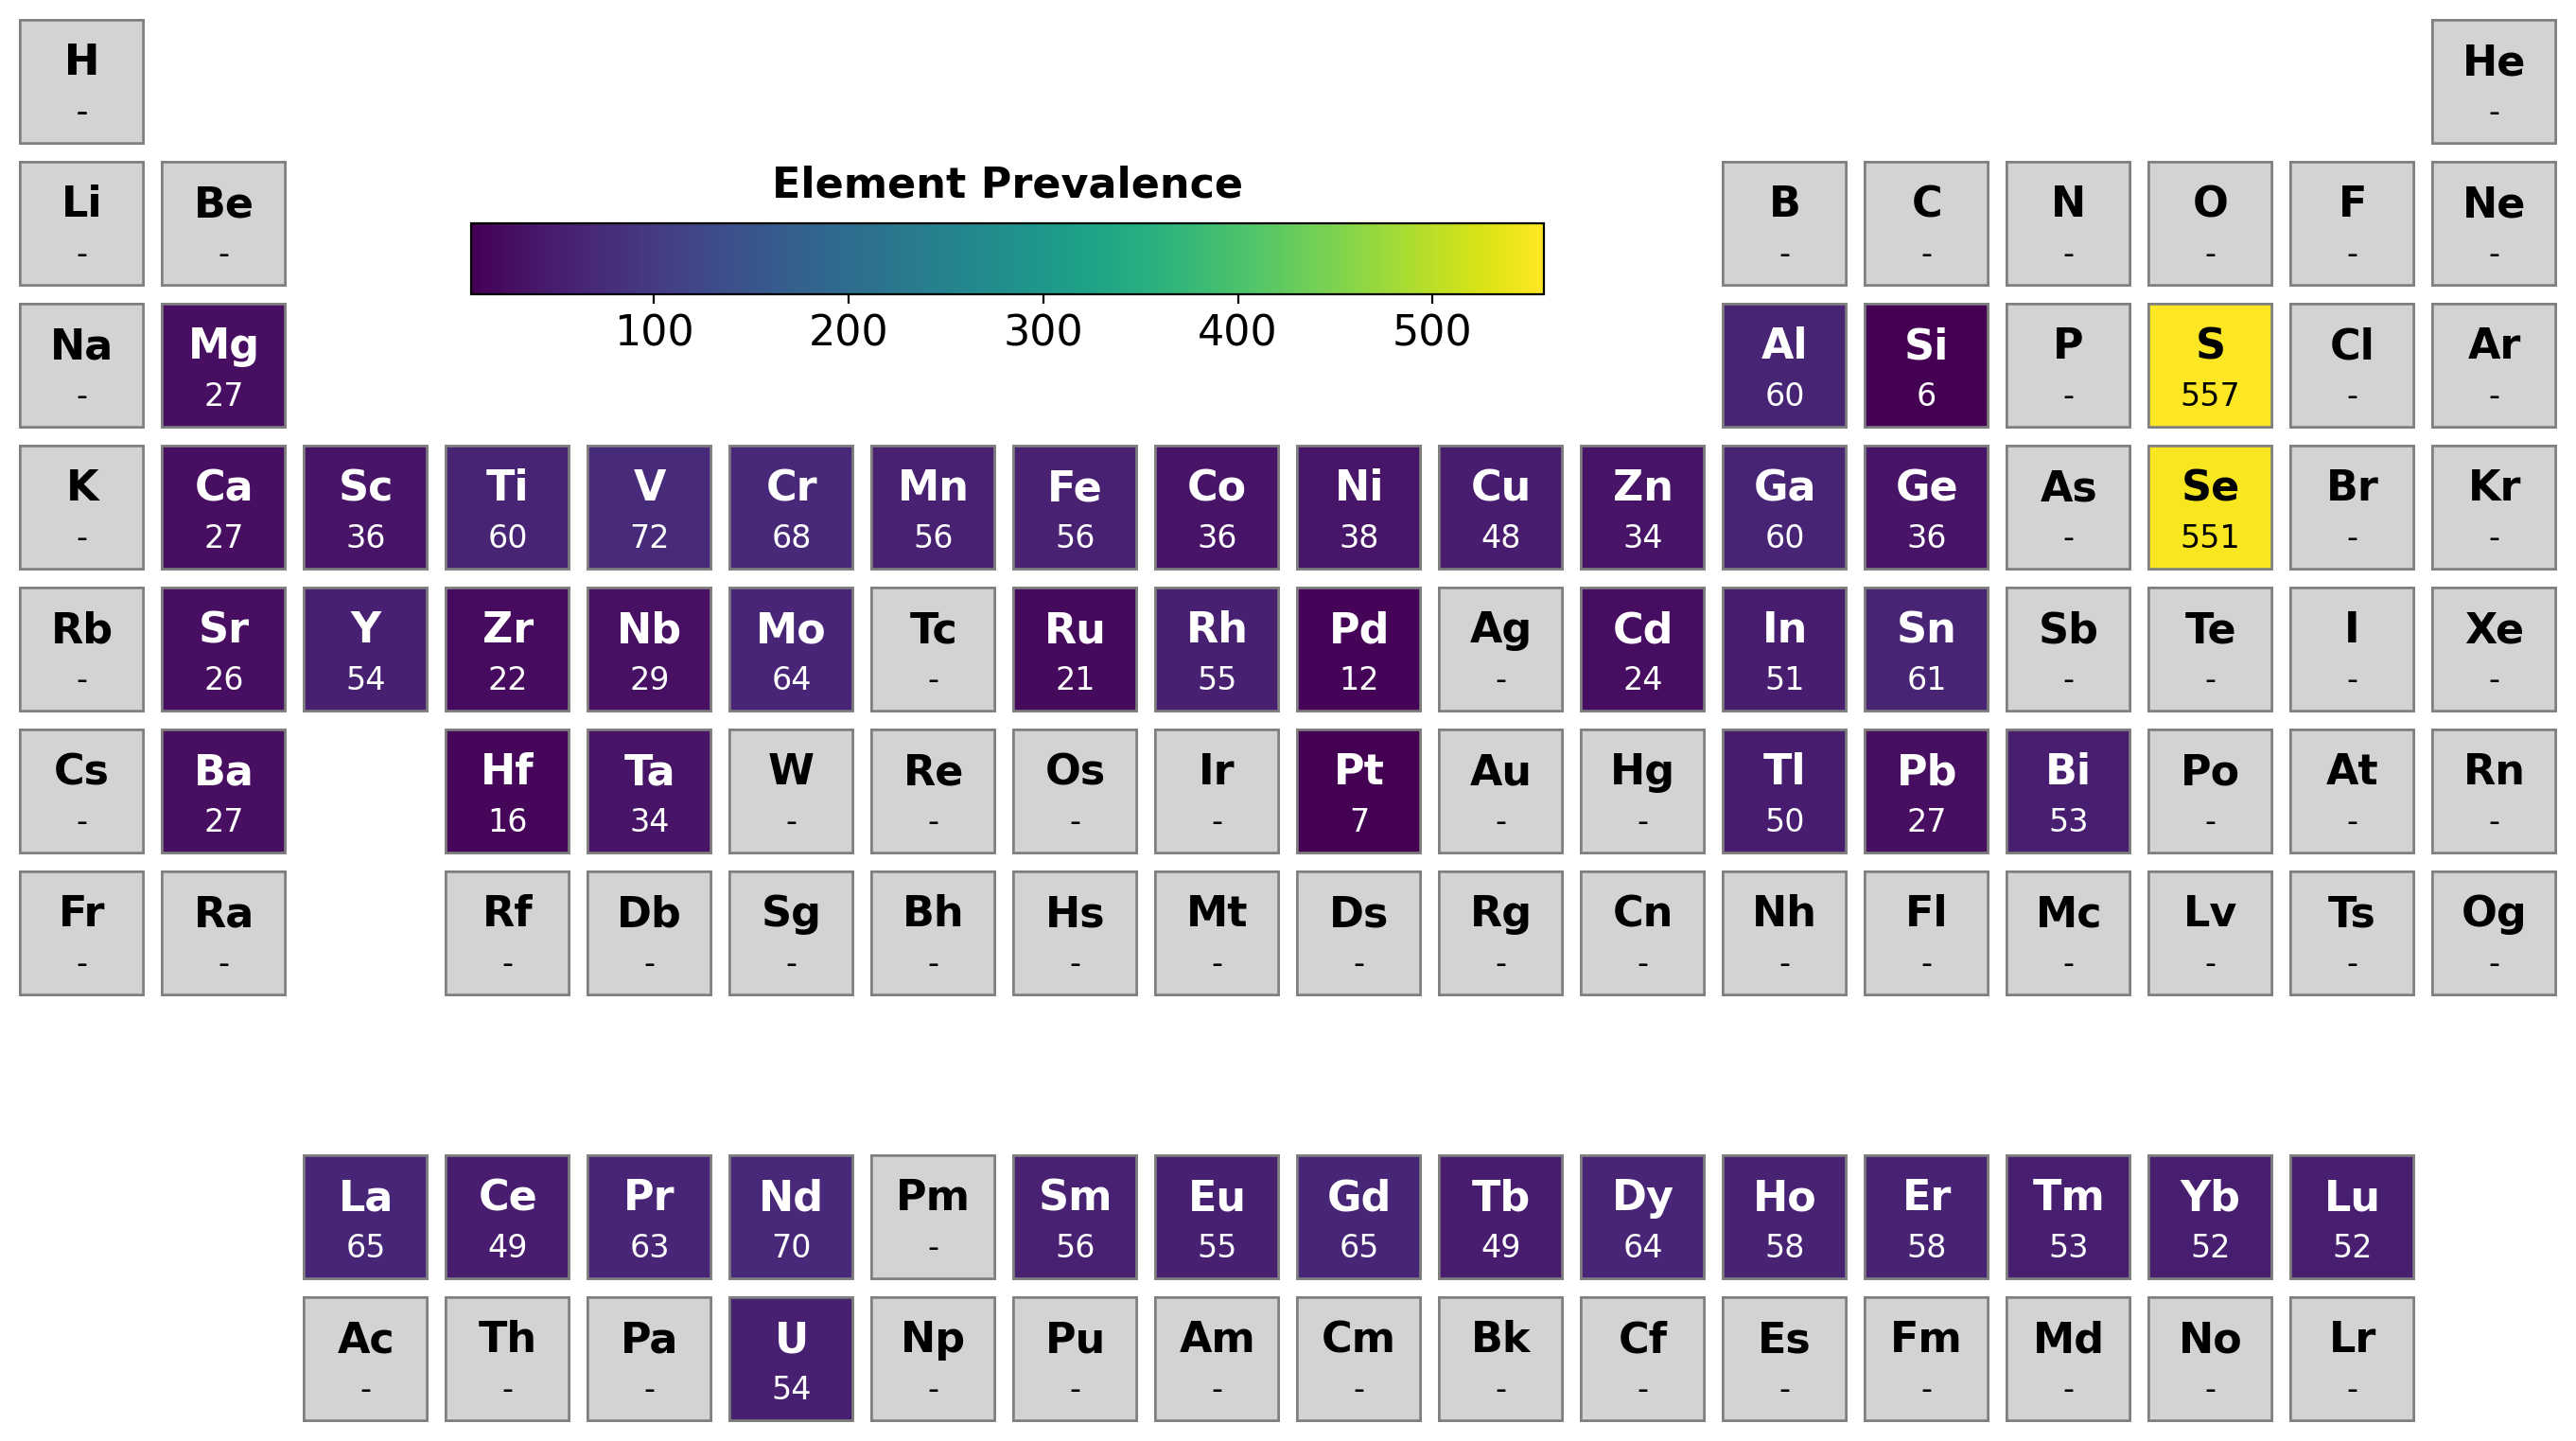

According to t_sisso_17, 1080 (77.36389684813754%) compositions are predicted to be stable as perovskites:
['BaPbS3', 'BaSnS3', 'BaSnSe3', 'BaGeS3', 'BaGeSe3', 'BaPrS3', 'BaPrSe3', 'BaCeS3', 'BaCeSe3', 'BaSiS3', 'BaSiSe3', 'BaVS3', 'BaVSe3', 'BaRhS3', 'BaRhSe3', 'BaTiS3', 'BaTiSe3', 'BaRuS3', 'BaRuSe3', 'BaMoS3', 'BaMoSe3', 'BaTaS3', 'BaTaSe3', 'BaNbS3', 'BaNbSe3', 'BaHfS3', 'BaHfSe3', 'BaZrS3', 'BaZrSe3', 'BaTbS3', 'BaTbSe3', 'BaPtS3', 'BaPtSe3', 'BaPdS3', 'BaPdSe3', 'BaNiS3', 'BaNiSe3', 'BaCoS3', 'BaCoSe3', 'BaCrS3', 'BaCrSe3', 'BaMnS3', 'BaMnSe3', 'EuCuS3', 'EuCuSe3', 'EuGeS3', 'EuGeSe3', 'EuLaS3', 'EuLaSe3', 'EuNdS3', 'EuNdSe3', 'EuSmS3', 'EuSmSe3', 'EuSiS3', 'EuSiSe3', 'EuVS3', 'EuVSe3', 'EuRhS3', 'EuRhSe3', 'EuTiS3', 'EuTiSe3', 'EuRuS3', 'EuRuSe3', 'EuMoS3', 'EuMoSe3', 'EuTaS3', 'EuTaSe3', 'EuNbS3', 'EuNbSe3', 'EuHfS3', 'EuHfSe3', 'EuZrS3', 'EuZrSe3', 'EuPtS3', 'EuPtSe3', 'EuPdS3', 'EuPdSe3', 'EuNiS3', 'EuNiSe3', 'EuCoS3', 'EuCoSe3', 'EuGaS3', 'EuGaSe3', 'EuAlS3', 'EuAlSe3', 'EuF

/home/dagar/TF-ChPVK-PV/tf_chpvk_pv/plots.py:246: UserWarning: default value of fill_value changed from zero to None.
  element_counts = count_elements([re.sub(r'\d+', '', x) for x in stable_candidates_t_sisso])
/home/dagar/anaconda3/envs/tf_chpvk_pv/lib/python3.13/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


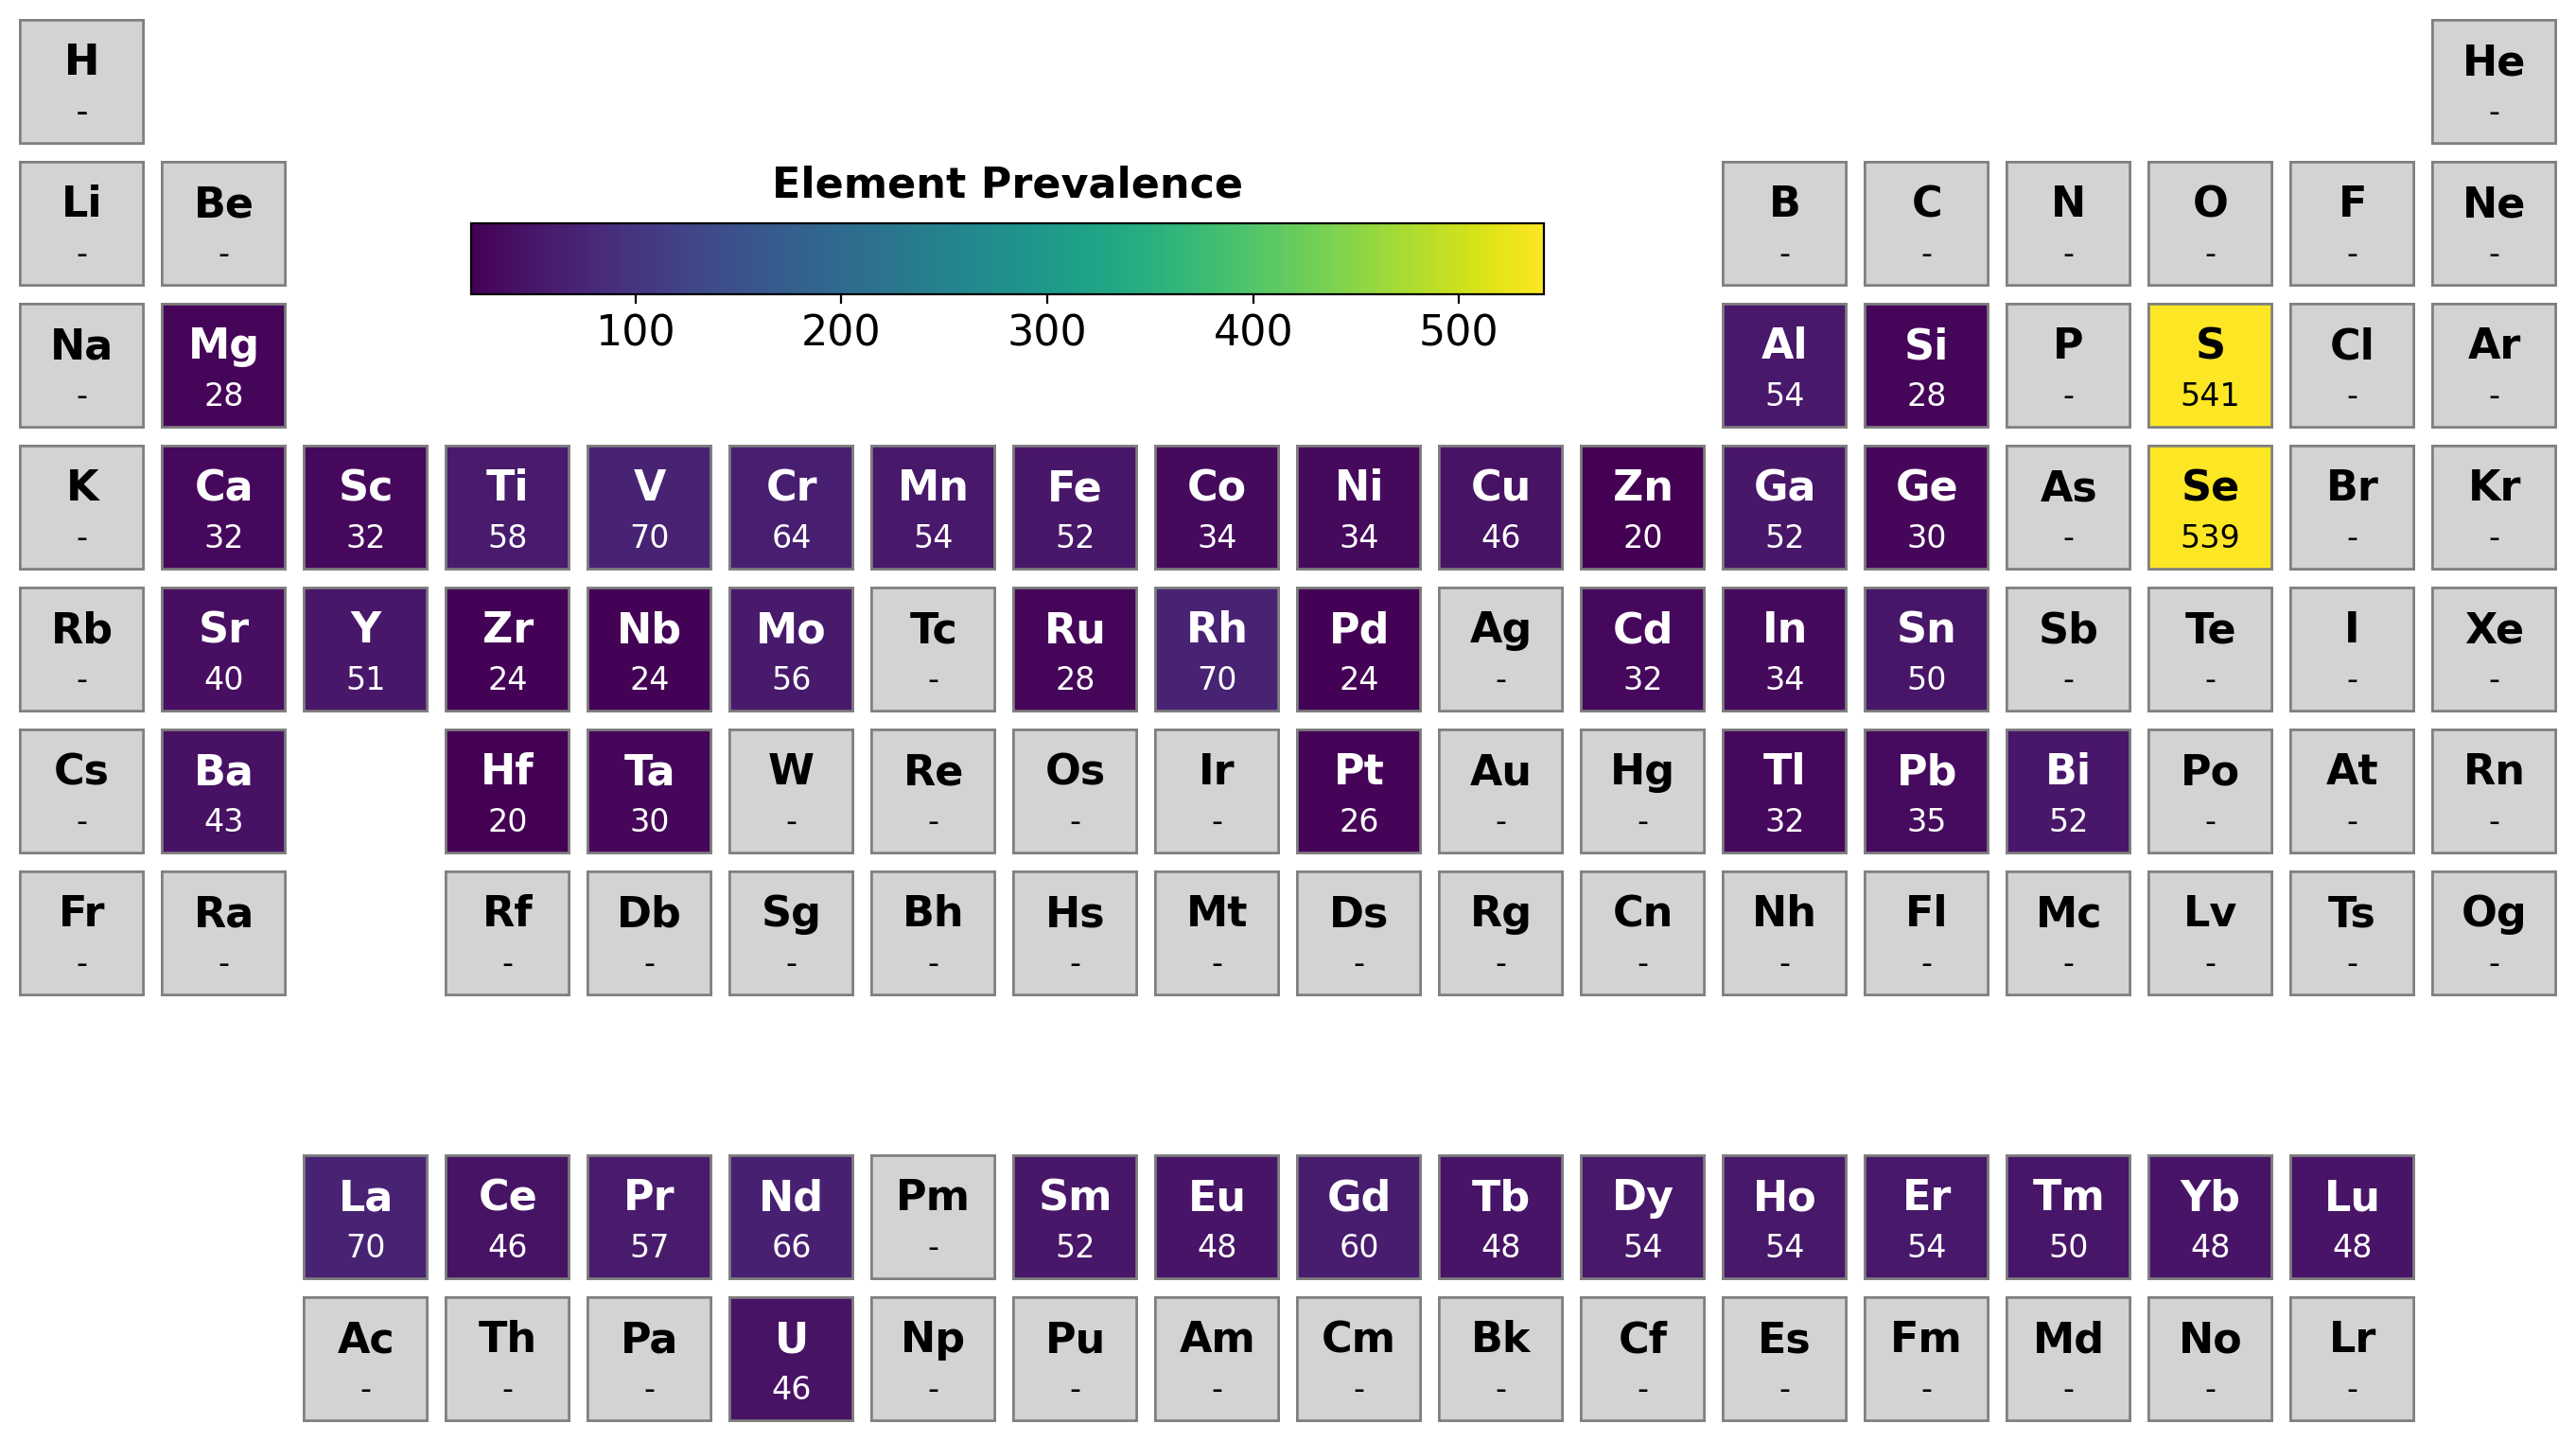

In [15]:
from tf_chpvk_pv.plots import graph_periodic_table

for t in tolerance_factor_dict_global.keys():
    if t not in ['t', 't_jess']:
        stable_candidates_t_sisso, df_out = check_stable_compositions(t, tolerance_factor_dict_path=new_tolerance_dict_path)
        graph_periodic_table(stable_candidates_t_sisso, t=t)

In [5]:
import re

d1 = train_df[train_df.exp_label == 1]
d2 = test_df[test_df.exp_label == 1]
exp_materials = pd.concat([d1, d2], axis=0)

sulfur_cations = exp_materials[exp_materials.rX == 184.4].index.to_list()
selenium_cations = exp_materials[exp_materials.rX == 198.14].index.to_list()

ch_stable_formulas = sulfur_cations + selenium_cations

# Regex pattern to match chemical symbols
pattern = r'[A-Z][a-z]?'

# Extract elements from each formula
extracted_elements = [re.findall(pattern, formula) for formula in ch_stable_formulas]

/tmp/ipykernel_917053/1458548113.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.sort_values(by=['Z_A', 'Z_B'], inplace=True, ascending=True)
/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1400 with 0 Axes>

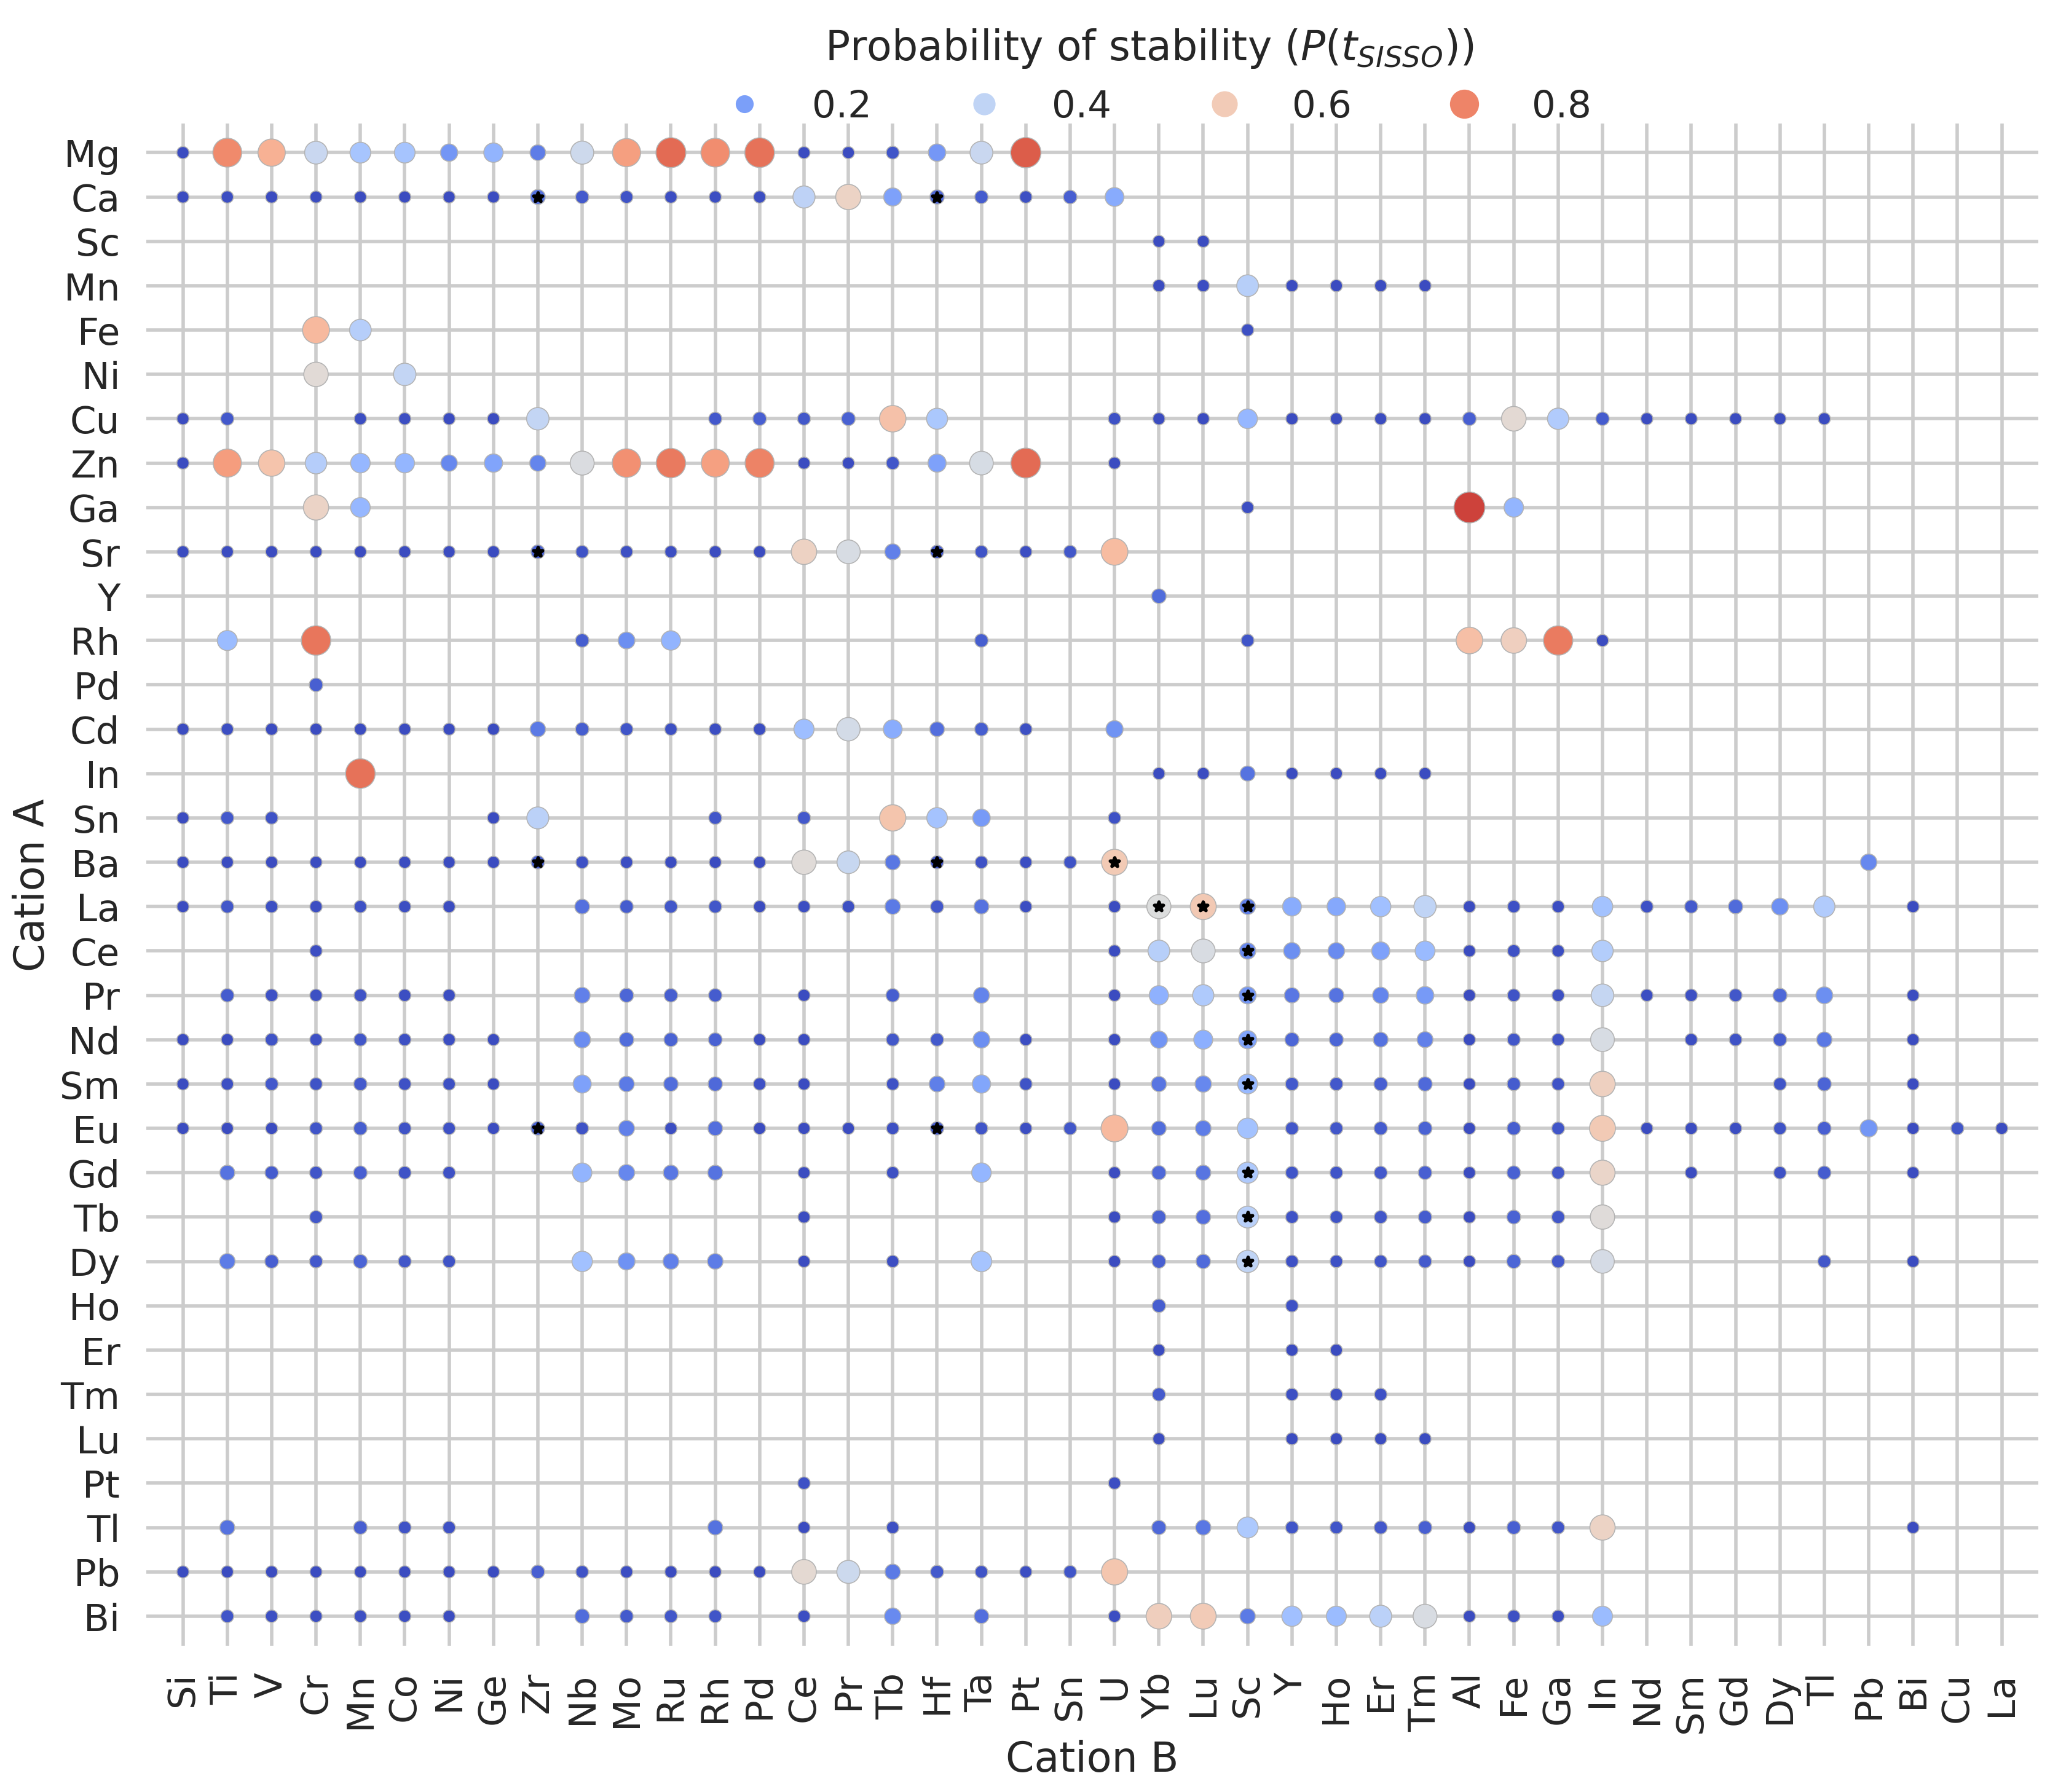

In [17]:
from tf_chpvk_pv.config import INTERIM_DATA_DIR

def plot_matrix(df_out, idx=None, anion='S', highlight_points=None,
                clf2_platt_path=INTERIM_DATA_DIR / 'Ch_clf2_platt.pkl',):


    import matplotlib.pyplot as plt
    from tf_chpvk_pv.config import FIGURES_DIR
    import pickle
    import numpy as np
    import seaborn as sns

    clf2_platt = pickle.load(open(clf2_platt_path, 'rb'))

    #check formulas
    new_extracted_elements = []
    hp = highlight_points.copy()
    for x in hp:
        if anion in x:
            new_extracted_elements.append(x[:2])

    t = 't_sisso_'

    column_p = 'p_t_sisso_'

    if idx is not None:
        column_p = 'p_t_sisso_' + str(idx)
        t = 't_sisso_' + str(idx)
    else:
        column_p = 'p_t_sisso'
        t = 't_sisso'

    x_t = df_out[t].to_numpy()

    if column_p not in df_out.columns:
        clf2 = clf2_platt[t]
        df_out[column_p] = clf2.predict_proba(x_t.reshape(-1, 1))[:, 1]
    
    element_to_number = {
    "H": 1, "He": 2, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, "F": 9, "Ne": 10,
    "Na": 11, "Mg": 12, "Al": 13, "Si": 14, "P": 15, "S": 16, "Cl": 17, "Ar": 18, "K": 19, "Ca": 20,
    "Sc": 21, "Ti": 22, "V": 23, "Cr": 24, "Mn": 25, "Fe": 26, "Co": 27, "Ni": 28, "Cu": 29, "Zn": 30,
    "Ga": 31, "Ge": 32, "As": 33, "Se": 34, "Br": 35, "Kr": 36, "Rb": 37, "Sr": 38, "Y": 39, "Zr": 40,
    "Nb": 41, "Mo": 42, "Tc": 43, "Ru": 44, "Rh": 45, "Pd": 46, "Ag": 47, "Cd": 48, "In": 49, "Sn": 50,
    "Sb": 51, "Te": 52, "I": 53, "Xe": 54, "Cs": 55, "Ba": 56, "La": 57, "Ce": 58, "Pr": 59, "Nd": 60,
    "Pm": 61, "Sm": 62, "Eu": 63, "Gd": 64, "Tb": 65, "Dy": 66, "Ho": 67, "Er": 68, "Tm": 69, "Yb": 70,
    "Lu": 71, "Hf": 72, "Ta": 73, "W": 74, "Re": 75, "Os": 76, "Ir": 77, "Pt": 78, "Au": 79, "Hg": 80,
    "Tl": 81, "Pb": 82, "Bi": 83, "Po": 84, "At": 85, "Rn": 86, "Fr": 87, "Ra": 88, "Ac": 89, "Th": 90,
    "Pa": 91, "U": 92, "Np": 93, "Pu": 94, "Am": 95, "Cm": 96, "Bk": 97, "Cf": 98, "Es": 99, "Fm": 100,
    "Md": 101, "No": 102, "Lr": 103, "Rf": 104, "Db": 105, "Sg": 106, "Bh": 107, "Hs": 108, "Mt": 109,
    "Ds": 110, "Rg": 111, "Cn": 112, "Nh": 113, "Fl": 114, "Mc": 115, "Lv": 116, "Ts": 117, "Og": 118
    }

    df_out['Z_A'] = df_out.A.map(element_to_number)
    df_out['Z_B'] = df_out.B.map(element_to_number)

    df_out = df_out[df_out['X'] == anion]

    df_out.sort_values(by=['Z_A', 'Z_B'], inplace=True, ascending=True)

    sns.set_theme(style="whitegrid")
    sns.set_context('poster')
    plt.figure(figsize=(7, 7))

    ax = sns.relplot(
    data=df_out, x='B', y='A', hue=column_p, size=column_p,
    palette="coolwarm", hue_norm=(0, 1), edgecolor=".7",
    height=14, sizes=(50, 350), size_norm=(0, 1), aspect=1.4
    )

    sns.move_legend(ax, "upper center", title='Probability of stability ($P(t_{SISSO})$)', frameon=False, ncols=4,
                bbox_to_anchor=(0.5, 1.05))

    plt.title('')

    if highlight_points:
        highlight_points = [(str(a), str(b)) for a, b in new_extracted_elements]  # Convert input list to strings
        highlight_df = df_out[df_out[['A', 'B']].apply(tuple, axis=1).isin(highlight_points)]

        if not highlight_df.empty:
            plt.scatter(highlight_df['B'], highlight_df['A'], 
                        color='black', marker='*', s=30, label='Highlighted')

    name_fig = 'matrix_cations_' + t + '_' + anion + '.png'
    # Tweak the figure to finalize
    ax.set(xlabel="Cation B", ylabel="Cation A", aspect="equal")
    plt.xticks(rotation=90)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    ax.despine(left=True, bottom=True)
    ax.ax.margins(.02)
    plt.savefig(FIGURES_DIR / name_fig, dpi=600)


plot_matrix(df_generated_comp, idx=55, anion='S', highlight_points=extracted_elements)

/tmp/ipykernel_917053/1458548113.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.sort_values(by=['Z_A', 'Z_B'], inplace=True, ascending=True)
/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1400 with 0 Axes>

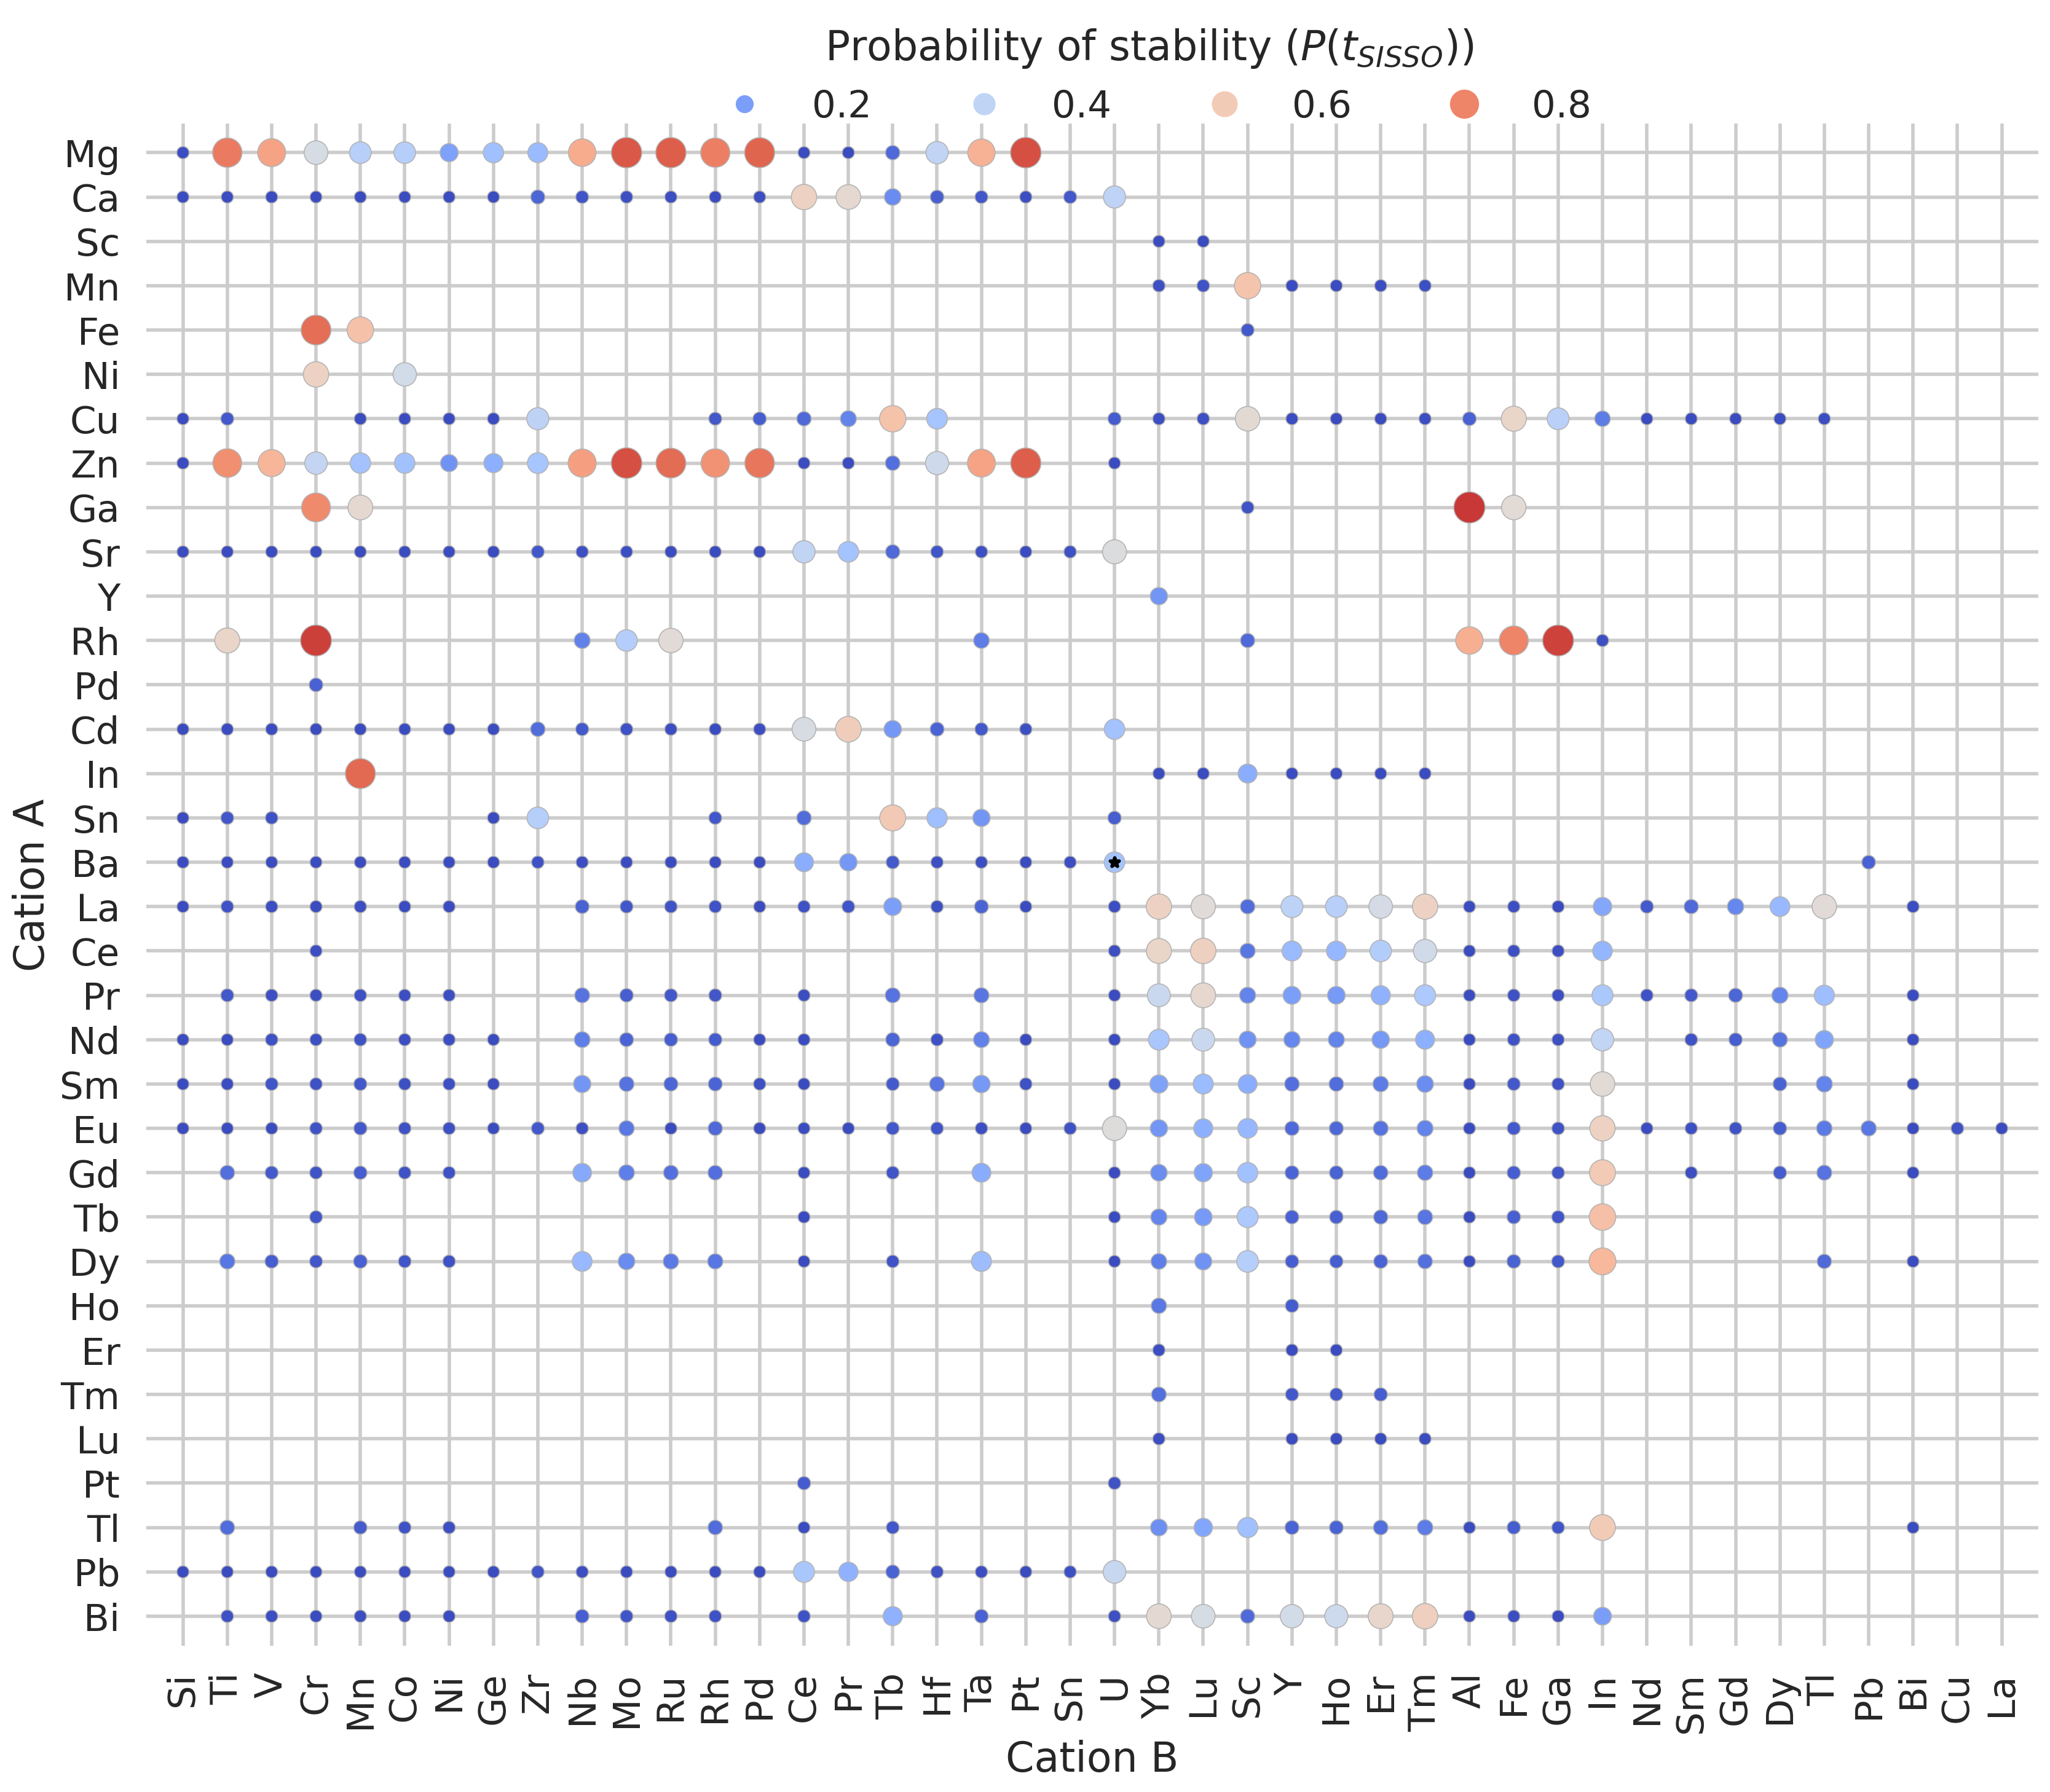

In [18]:
plot_matrix(df_generated_comp, idx=55, anion='Se', highlight_points=extracted_elements)

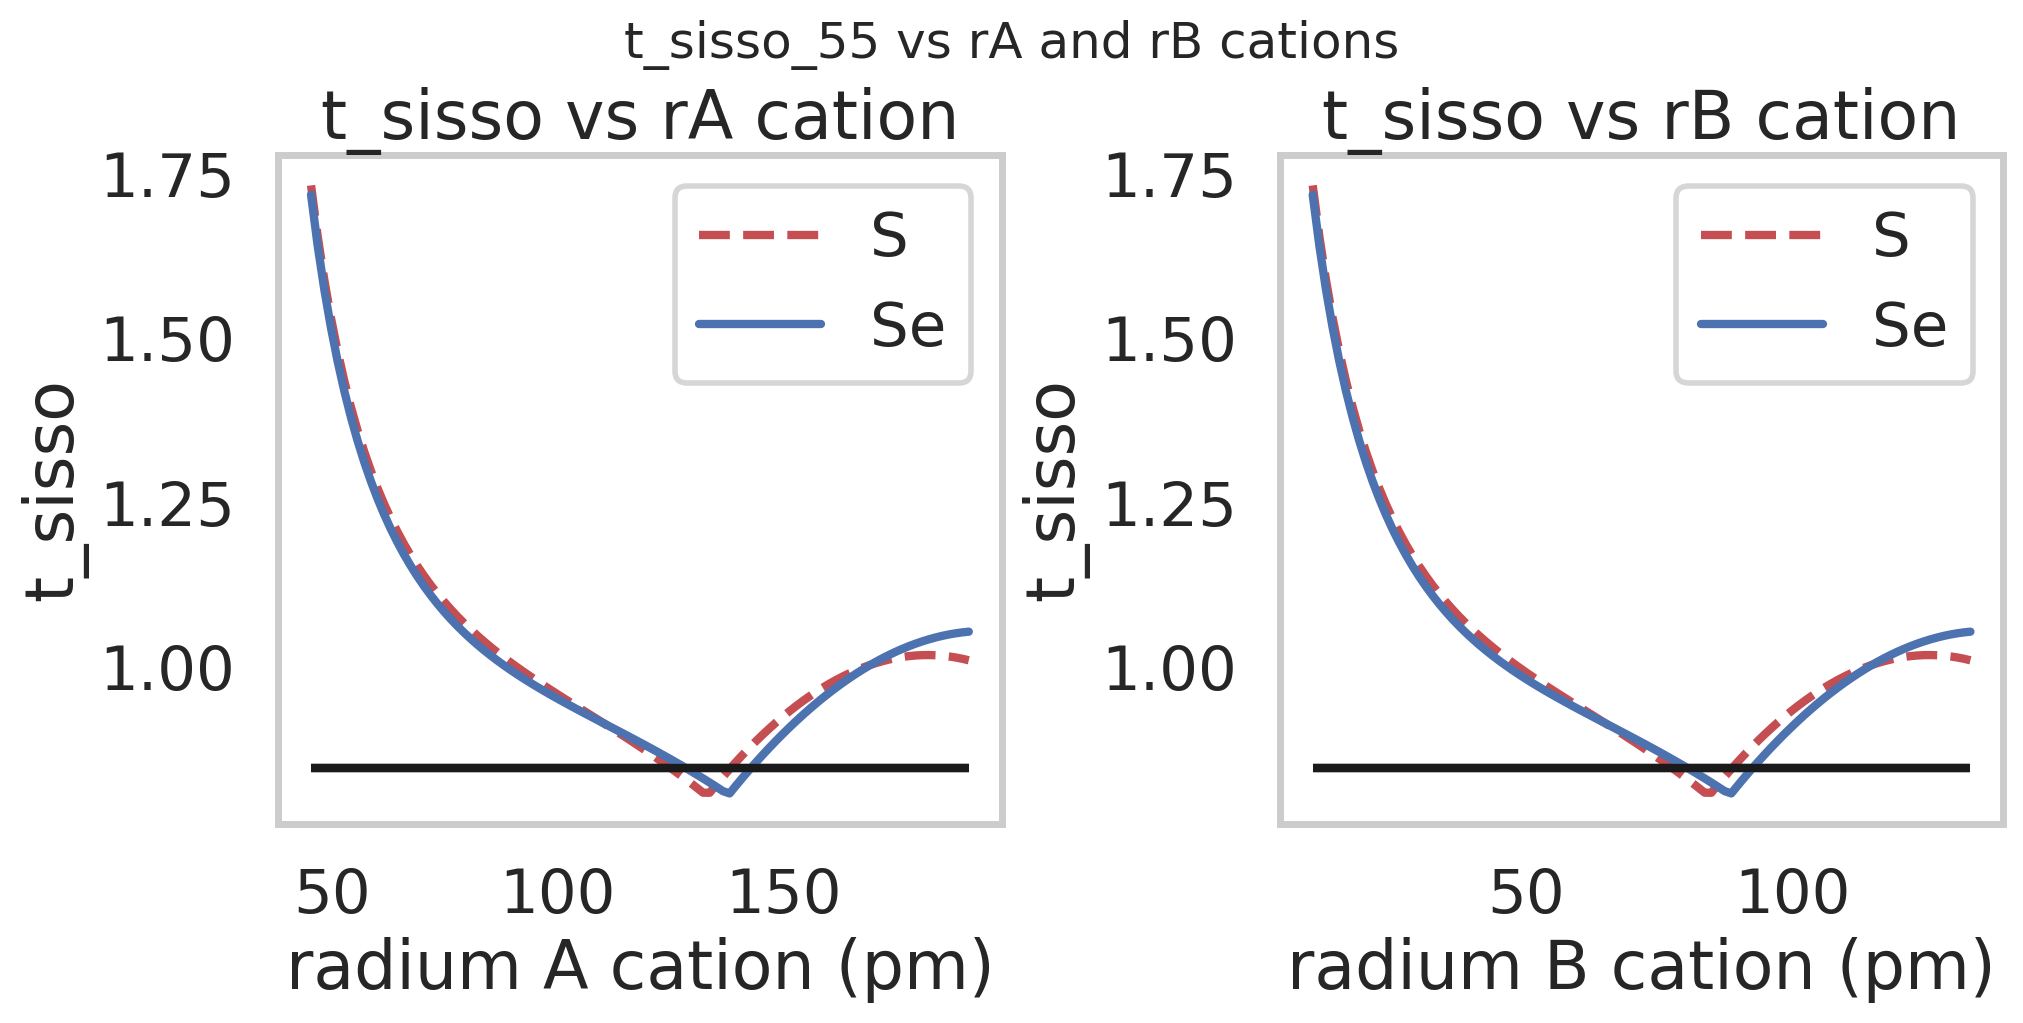

In [55]:
#TODO plot stuff vs r_A and r_B for different cations

def plot_vals(df, anion='S', axs=None, idx=5):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    if anion == 'S':
        rX = 184.4
        sty = 'r--'
    elif anion == 'Se':
        rX = 198.14
        sty = 'b'

    if idx == 33:
        #t_sisso 33
        t_sisso = 't_sisso = ((sqrt(rA_rX_ratio) + sqrt(rB_rX_ratio)) - ((rA_rX_ratio - log_rA_rB_ratio) + sqrt(log_rA_rB_ratio))) '
        th = 0.5850899517536163
    elif idx == 5:
        #t_sisso 5
        t_sisso = 't_sisso = abs(((rA_rX_ratio**3) - abs(rB_rX_ratio - log_rA_rB_ratio)) - (abs(rA_rX_ratio - log_rA_rB_ratio) + (rB_rX_ratio + log_rA_rB_ratio))) '
        th = 0.8455010652542114 
    elif idx == 55:
        t_sisso = 't_sisso = abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3))'
        th = 0.8455010652542114
        
    
    d_r = 30 #pm


    r_A_values = np.linspace(df.rA.min()- d_r, df.rA.max() + d_r, 100)
    r_B_values = np.linspace(df.rB.min()- d_r, df.rB.max() + d_r, 100)
    #chi_BX_values = np.linspace(df.chi_BX_ratio.min()-0.1, df.chi_BX_ratio.max()+0.1, 100)

    results_df = pd.DataFrame(columns=['rA_rX_ratio', 'rB_rX_ratio', 'chi_BX_ratio', 'log_rA_rB_ratio', 't_sisso'])
    results_df['rA_rX_ratio'] = r_A_values / rX
    results_df['rB_rX_ratio'] = r_B_values / rX
    results_df['rA'] = r_A_values
    results_df['rB'] = r_B_values
    #results_df['chi_BX_ratio'] = chi_BX_values
    results_df['log_rA_rB_ratio'] = np.log(r_A_values / r_B_values)
    results_df.eval(t_sisso, inplace=True)

    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    else:
        fig = axs[0].figure
    
    fig.suptitle('t_sisso_' + str(idx) + ' vs rA and rB cations')
    axs[0].set_title('t_sisso vs rA cation')
    axs[1].set_title('t_sisso vs rB cation')



    axs[0].plot(r_A_values, results_df['t_sisso'], sty, label=anion)
    axs[0].hlines(th, r_A_values.min(), r_A_values.max(), color='k')
    axs[0].set_xlabel('radium A cation (pm)')
    axs[0].set_ylabel('t_sisso')
    axs[0].legend()
    axs[0].grid(False)

    axs[1].plot(r_B_values, results_df['t_sisso'], sty, label=anion)
    axs[1].hlines(th, r_B_values.min(), r_B_values.max(), color='k')
    axs[1].set_xlabel('radium B cation (pm)')
    axs[1].set_ylabel('t_sisso')
    axs[1].legend()
    axs[1].grid(False)
    return axs

    """plt.plot(chi_BX_values, results_df['t_sisso'])
    plt.hlines(1.9971271753311157, chi_BX_values.min(), chi_BX_values.max(), color='r')
    plt.xlabel('chi_BX_values (arb. units)')
    plt.ylabel('t_sisso')
    plt.show()

    ax = plt.figure().add_subplot(projection='3d')
    
    ax.plot_surface(r_B_values, chi_BX_values, results_df['t_sisso'], edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
    
    plt.show()"""

axs = plot_vals(df_generated_comp, anion='S', idx=55)
axs = plot_vals(df_generated_comp, anion='Se', axs=axs, idx=55)
plt.show()

In [ ]:
def t_sisso_color_plot(df_generated_comp, anion, idx=55):
    import numpy as np
    import seaborn as sns
    import pandas as pd

    sns.set_context('poster')

    if idx == 55:
        t_sisso_exp = 'abs(((rA_rX_ratio + rB_rX_ratio) + abs(rB_rX_ratio - log_rA_rB_ratio)) - (rA_rX_ratio**3))'

    d_r = 30 #pm

    if anion == 'S':
        rX = 184.4
    elif anion == 'Se':
        rX = 198.14
    
    def f(x, y, t_sisso_exp, rX):

        var = {'rA_rX_ratio': x/rX,
               'rB_rX_ratio': y/rX,
               'log_rA_rB_ratio':np.log(x / y)}
        
        return eval(t_sisso_exp, var)

    def evaluate_z(x_range, y_range, step=1, t_sisso_exp='', rX='S'):
        x_values = np.arange(x_range[0], x_range[1] + step, step)
        y_values = np.arange(y_range[0], y_range[1] + step, step)
        
        xy_pairs = []
        z_list = []#np.zeros((len(x_values), len(y_values)))
        
        for i, x in enumerate(x_values):
            for j, y in enumerate(y_values):
                xy_pairs.append((x, y))
                z_list.append(f(x, y, t_sisso_exp, rX))
        
        return xy_pairs, z_list

    # Define range of x and y
    df = df_generated_comp.copy()
    x_range = (df.rA.min()- d_r, df.rA.max() + d_r,)  # Change as needed
    y_range = (df.rB.min()- d_r, df.rB.max()+ d_r)  # Change as needed
    step = 25/(df.rB.max()- df.rB.min())  # Step size

    xy_pairs, z_values = evaluate_z(x_range, y_range, step, t_sisso_exp, rX)

    # Convert to DataFrame for heatmap
    df = pd.DataFrame(xy_pairs, columns=["rA", "rB"])
    df["t_sisso"] = z_values

    sns.displot(data=df, x='rB', y='rA', hue='t_sisso')

t_sisso_color_plot(df_generated_comp, 'S', 55)

/home/nomad-lanasc/.pyenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

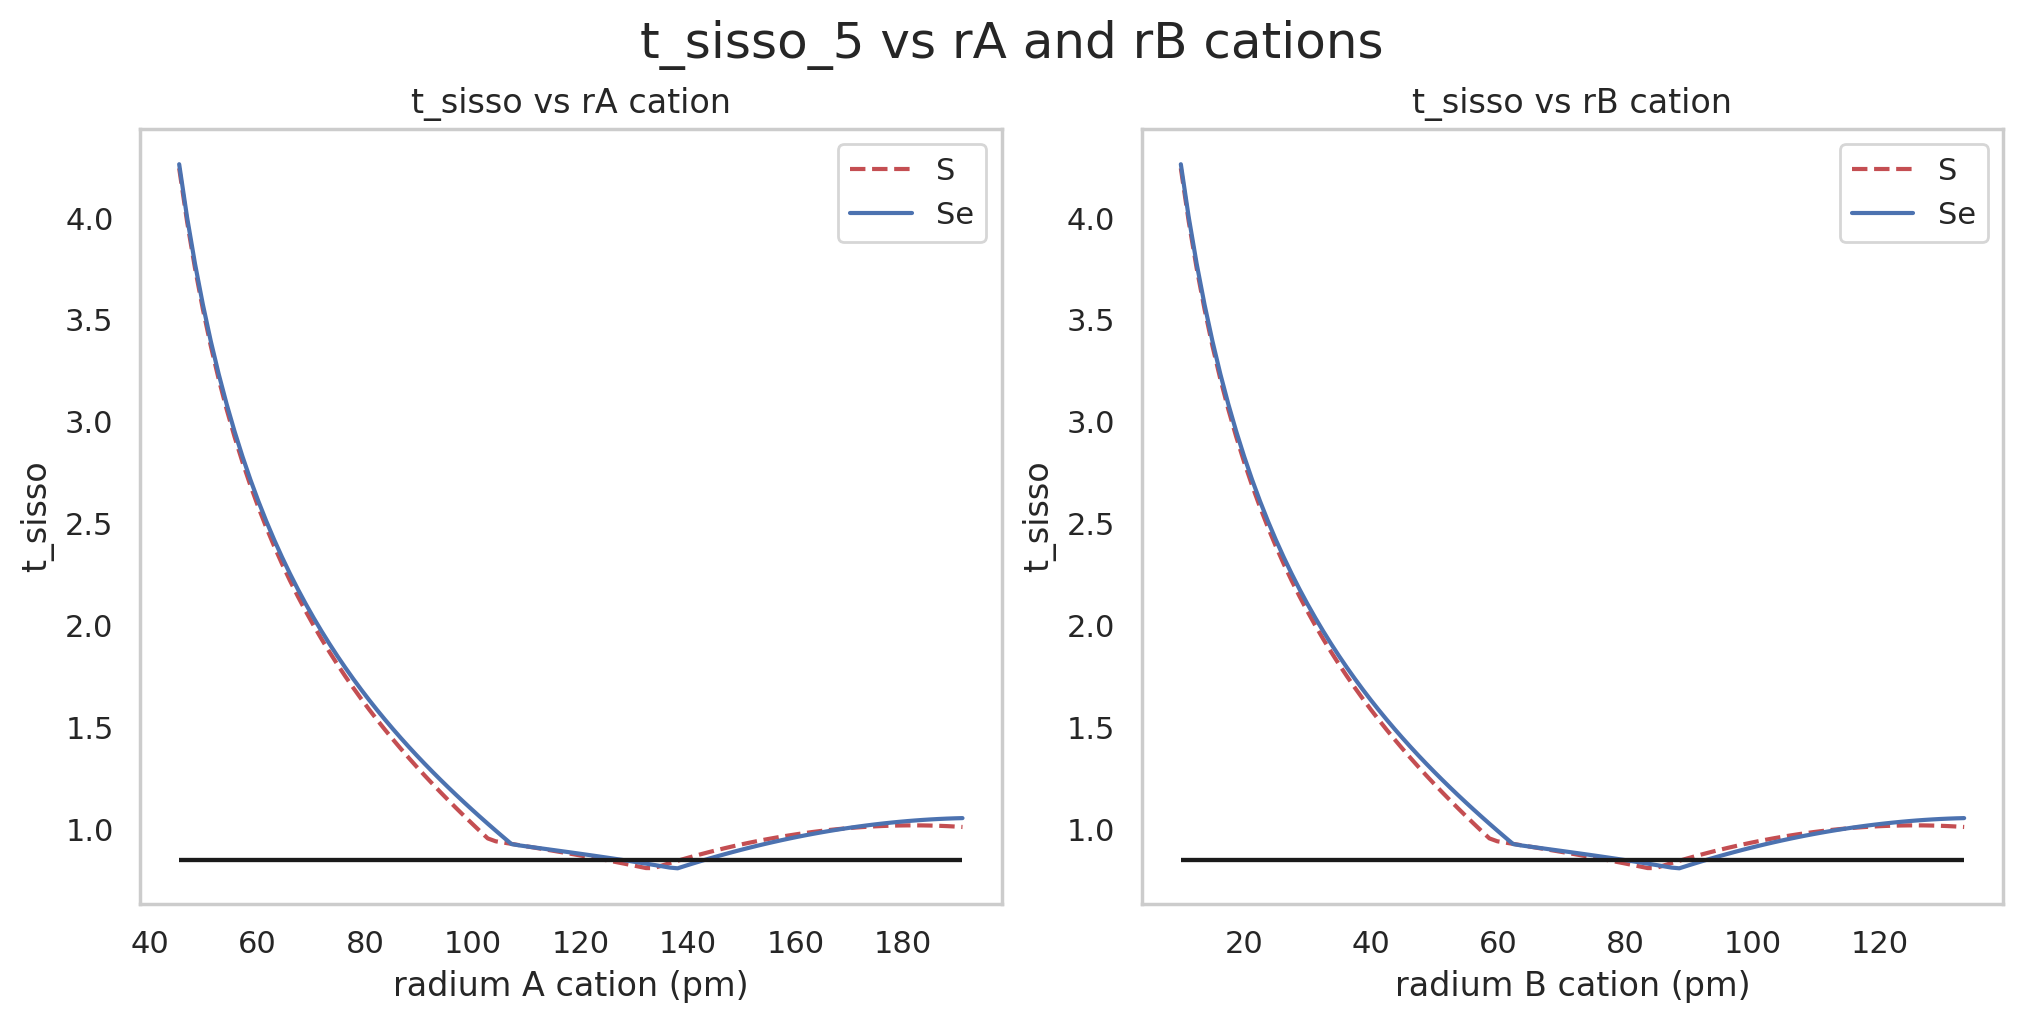

In [76]:
axs = plot_vals(df_generated_comp, anion='S', idx=5)
axs = plot_vals(df_generated_comp, anion='Se', axs=axs, idx=5)
plt.show()